# Prerequisites

## Importing Libraries and settings

In [21]:
# For data cleaning and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 
import datetime

# To print multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plot settings
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

# Set default font sizes
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 20 # Title
mpl.rcParams['axes.titleweight'] = 'bold' # Make title bold 
mpl.rcParams['axes.labelsize'] = 16 # X-Axis & Y-Axis
mpl.rcParams['axes.labelweight'] = 'bold' # Make labels bold
mpl.rcParams['xtick.labelsize'] = 14 # X-ticks
mpl.rcParams['ytick.labelsize'] = 14 # Y-ticks

# Use Plotly color palette
plotly_color_scale = px.colors.qualitative.Plotly
custom_colors = plotly_color_scale

# Machine learning
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
import pickle
from sklearn.model_selection import GridSearchCV

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
results = pd.DataFrame(columns=["MAPE", "MAE", "MSE", "r2_score"])

# 1. Reading the dataset & basic data cleaning

In [4]:
df = pd.read_csv('../../data/cleaned_data/MachineLearning_AQI_calculator/df_imputed_AQI_FINAL.csv')

In [5]:
df

Unnamed: 0             Datetime      Station  PM2.5  PM2.5_24_avg  \
0               23  2020-03-04 23:00:00         NISE  28.89     73.831667   
1               24  2020-03-05 00:00:00         NISE  21.17     71.019167   
2               25  2020-03-05 01:00:00         NISE  21.47     68.479583   
3               26  2020-03-05 02:00:00         NISE  31.70     66.369167   
4               27  2020-03-05 03:00:00         NISE  25.81     63.180417   
...            ...                  ...          ...    ...           ...   
147411      147526  2023-03-26 03:00:00  Vikas Sadan  83.22     49.372083   
147412      147527  2023-03-26 04:00:00  Vikas Sadan  71.96     50.378750   
147413      147528  2023-03-26 05:00:00  Vikas Sadan  75.47     51.747083   
147414      147529  2023-03-26 06:00:00  Vikas Sadan  69.07     52.885000   
147415      147530  2023-03-26 07:00:00  Vikas Sadan  66.35     53.818750   

           NO    NO2    NOx  NOx_SubIndex        SO2  ...    AQI_Bucket  Day  \
0        7.25  21.37  28.63       35.7875   7.690000  ...      Moderate    4   
1        7.41  20.99  28.41       35.5125   7.440000  ...      Moderate    5   
2        7.48  20.49  27.97       34.9625   6.823333  ...      Moderate    5   
3        7.28  14.93  22.22       27.7750   6.633333  ...      Moderate    5   
4        7.85  17.92  25.77       32.2125   6.583333  ...      Moderate    5   
...       ...    ...    ...           ...        ...  ...           ...  ...   
147411  23.90  49.59  70.03       87.5375  41.300000  ...  Satisfactory   26   
147412  24.25  53.15  71.91       89.8875  40.560000  ...  Satisfactory   26   
147413  24.55  54.38  64.34       80.4250  40.820000  ...  Satisfactory   26   
147414  23.09  54.48  72.73       90.9125  39.290000  ...  Satisfactory   26   
147415  23.02  56.28  66.13       82.6625  39.290000  ...  Satisfactory   26   

        Month  Year Week  Hour  AQI_calculated  PM2.5_24_avg_Sub_Index  \
0           3  2020   10    23           145.0              144.804655   
1           3  2020   10     0           135.0              135.203362   
2           3  2020   10     1           127.0              126.533750   
3           3  2020   10     2           119.0              119.329224   
4           3  2020   10     3           108.0              108.443491   
...       ...   ...  ...   ...             ...                     ...   
147411      3  2023   12     3            88.0               82.042486   
147412      3  2023   12     4            90.0               83.743405   
147413      3  2023   12     5            86.0               86.055417   
147414      3  2023   12     6            91.0               87.978103   
147415      3  2023   12     7            90.0               89.555819   

        CO_8_avg_Sub_Index  NO2_Sub_Index  
0                86.388889      26.712500  
1                85.163889      26.237500  
2                84.823611      25.612500  
3                84.347222      18.662500  
4                84.279167      22.400000  
...                    ...            ...  
147411           84.211111      61.792564  
147412           73.390278      66.265385  
147413           47.125000      67.810769  
147414           37.875000      67.936410  
147415           28.937500      70.197949  

[147416 rows x 24 columns]

In [6]:
df.drop(['Unnamed: 0','AQI'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147416 entries, 0 to 147415
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Datetime                147416 non-null  object 
 1   Station                 147416 non-null  object 
 2   PM2.5                   147416 non-null  float64
 3   PM2.5_24_avg            147416 non-null  float64
 4   NO                      147416 non-null  float64
 5   NO2                     147416 non-null  float64
 6   NOx                     147416 non-null  float64
 7   NOx_SubIndex            147416 non-null  float64
 8   SO2                     147416 non-null  float64
 9   SO2_SubIndex            147416 non-null  float64
 10  CO                      147416 non-null  float64
 11  CO_8_avg                147416 non-null  float64
 12  AQI_Bucket              147416 non-null  object 
 13  Day                     147416 non-null  int64  
 14  Month               

### Converting Categorical columns into Numeric - One Hot Encoding

In [8]:
df = pd.get_dummies(df, columns = ['Station', 'AQI_Bucket'])
df

Datetime  PM2.5  PM2.5_24_avg     NO    NO2    NOx  \
0       2020-03-04 23:00:00  28.89     73.831667   7.25  21.37  28.63   
1       2020-03-05 00:00:00  21.17     71.019167   7.41  20.99  28.41   
2       2020-03-05 01:00:00  21.47     68.479583   7.48  20.49  27.97   
3       2020-03-05 02:00:00  31.70     66.369167   7.28  14.93  22.22   
4       2020-03-05 03:00:00  25.81     63.180417   7.85  17.92  25.77   
...                     ...    ...           ...    ...    ...    ...   
147411  2023-03-26 03:00:00  83.22     49.372083  23.90  49.59  70.03   
147412  2023-03-26 04:00:00  71.96     50.378750  24.25  53.15  71.91   
147413  2023-03-26 05:00:00  75.47     51.747083  24.55  54.38  64.34   
147414  2023-03-26 06:00:00  69.07     52.885000  23.09  54.48  72.73   
147415  2023-03-26 07:00:00  66.35     53.818750  23.02  56.28  66.13   

        NOx_SubIndex        SO2  SO2_SubIndex    CO  ...  Station_No Station  \
0            35.7875   7.690000      9.612500  1.76  ...                   0   
1            35.5125   7.440000      9.300000  1.71  ...                   0   
2            34.9625   6.823333      8.529167  1.74  ...                   0   
3            27.7750   6.633333      8.291667  1.60  ...                   0   
4            32.2125   6.583333      8.229167  1.56  ...                   0   
...              ...        ...           ...   ...  ...                 ...   
147411       87.5375  41.300000     51.376923  0.87  ...                   0   
147412       89.8875  40.560000     50.447179  0.66  ...                   0   
147413       80.4250  40.820000     50.773846  0.28  ...                   0   
147414       90.9125  39.290000     49.112500  0.43  ...                   0   
147415       82.6625  39.290000     49.112500  0.50  ...                   0   

        Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
...                   ...                ...                  ...   
147411                  0                  0                    1   
147412                  0                  0                    1   
147413                  0                  0                    1   
147414                  0                  0                    1   
147415                  0                  0                    1   

        AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
0                     0                    1                0   
1                     0                    1                0   
2                     0                    1                0   
3                     0                    1                0   
4                     0                    1                0   
...                 ...                  ...              ...   
147411                0                    0                0   
147412                0                    0                0   
147413                0                    0                0   
147414                0                    0                0   
147415                0                    0                0   

        AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
0                             0                  0                     0  
1                             0                  0                     0  
2                             0                  0                     0  
3                             0                  0                     0  
4                             0                  0                     0  
...                         ...                ...                   ...  
147411                        1               

In [9]:
# Checking NaNs 

df.isna().sum()
df.shape

Datetime                   0
PM2.5                      0
PM2.5_24_avg               0
NO                         0
NO2                        0
NOx                        0
NOx_SubIndex               0
SO2                        0
SO2_SubIndex               0
CO                         0
CO_8_avg                   0
Day                        0
Month                      0
Year                       0
Week                       0
Hour                       0
AQI_calculated             0
PM2.5_24_avg_Sub_Index     0
CO_8_avg_Sub_Index         0
NO2_Sub_Index              9
Station_NISE               0
Station_No Station         0
Station_Sector 51          0
Station_Teri Gram          0
Station_Vikas Sadan        0
AQI_Bucket_Good            0
AQI_Bucket_Moderate        0
AQI_Bucket_Poor            0
AQI_Bucket_Satisfactory    0
AQI_Bucket_Severe          0
AQI_Bucket_Very Poor       0
dtype: int64

(147416, 31)

- We see 9 NaNs in NO2_Sub_Index.

- Let's fix it.

In [10]:
# Seeing the NaN records

df[df['NO2_Sub_Index'].isna()]

Datetime   PM2.5  PM2.5_24_avg      NO     NO2     NOx  \
21067   2022-07-30 18:00:00   17.29     15.032917    5.96  400.05   26.81   
22336   2022-09-21 15:00:00   42.35     39.991250    7.50  403.17   23.77   
34630   2016-10-20 03:00:00   64.32     60.990000  479.65  423.16  232.95   
34631   2016-10-20 04:00:00   64.57     61.052500  479.65  485.16  232.95   
34647   2016-10-20 20:00:00   64.25     69.726250  254.56  495.56  273.45   
37194   2017-02-03 23:00:00  354.82    289.357500  482.51  411.88   17.90   
39800   2017-05-23 13:00:00   69.45    267.099583  446.33  454.46   17.90   
55049   2019-02-17 22:00:00   74.18     57.266667  372.05  405.80  451.28   
136987  2022-01-15 19:00:00  122.85    114.531667  124.57  452.13   40.15   

        NOx_SubIndex        SO2  SO2_SubIndex    CO  ...  Station_No Station  \
21067      33.512500   4.396667      5.495833  1.04  ...                   0   
22336      29.712500   4.540000      5.675000  0.57  ...                   0   
34630     252.950000   4.480000      5.600000  0.34  ...                   1   
34631     252.950000   7.180000      8.975000  0.25  ...                   1   
34647     293.450000   4.450000      5.562500  0.62  ...                   1   
37194      22.375000  11.600000     14.500000  2.06  ...                   1   
39800      22.375000   0.260000      0.325000  0.78  ...                   1   
55049     442.733333   8.370000     10.462500  2.42  ...                   1   
136987     50.187500   7.390000      9.237500  0.65  ...                   0   

        Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
21067                   0                  0                    0   
22336                   0                  0                    0   
34630                   0                  0                    0   
34631                   0                  0                    0   
34647                   0                  0                    0   
37194                   0                  0                    0   
39800                   0                  0                    0   
55049                   0                  0                    0   
136987                  0                  0                    1   

        AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
21067                 1                    0                0   
22336                 0                    0                0   
34630                 0                    0                1   
34631                 0                    0                1   
34647                 0                    0                1   
37194                 0                    0                0   
39800                 0                    0                0   
55049                 0                    0                0   
136987                0                    0                1   

        AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
21067                         0                  0                     0  
22336                         1                  0                     0  
34630                         0                  0                     0  
34631                         0                  0                     0  
34647                         0                  0                     0  
37194                         0                  1                     0  
39800                         0                  1                     0  
55049                         0                  1                     0  
136987                        0                  0                     0  

[9 rows x 31 columns]

In [11]:
# Remove NaNs

df = df[~df['NO2_Sub_Index'].isna()]
df

Datetime  PM2.5  PM2.5_24_avg     NO    NO2    NOx  \
0       2020-03-04 23:00:00  28.89     73.831667   7.25  21.37  28.63   
1       2020-03-05 00:00:00  21.17     71.019167   7.41  20.99  28.41   
2       2020-03-05 01:00:00  21.47     68.479583   7.48  20.49  27.97   
3       2020-03-05 02:00:00  31.70     66.369167   7.28  14.93  22.22   
4       2020-03-05 03:00:00  25.81     63.180417   7.85  17.92  25.77   
...                     ...    ...           ...    ...    ...    ...   
147411  2023-03-26 03:00:00  83.22     49.372083  23.90  49.59  70.03   
147412  2023-03-26 04:00:00  71.96     50.378750  24.25  53.15  71.91   
147413  2023-03-26 05:00:00  75.47     51.747083  24.55  54.38  64.34   
147414  2023-03-26 06:00:00  69.07     52.885000  23.09  54.48  72.73   
147415  2023-03-26 07:00:00  66.35     53.818750  23.02  56.28  66.13   

        NOx_SubIndex        SO2  SO2_SubIndex    CO  ...  Station_No Station  \
0            35.7875   7.690000      9.612500  1.76  ...                   0   
1            35.5125   7.440000      9.300000  1.71  ...                   0   
2            34.9625   6.823333      8.529167  1.74  ...                   0   
3            27.7750   6.633333      8.291667  1.60  ...                   0   
4            32.2125   6.583333      8.229167  1.56  ...                   0   
...              ...        ...           ...   ...  ...                 ...   
147411       87.5375  41.300000     51.376923  0.87  ...                   0   
147412       89.8875  40.560000     50.447179  0.66  ...                   0   
147413       80.4250  40.820000     50.773846  0.28  ...                   0   
147414       90.9125  39.290000     49.112500  0.43  ...                   0   
147415       82.6625  39.290000     49.112500  0.50  ...                   0   

        Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
...                   ...                ...                  ...   
147411                  0                  0                    1   
147412                  0                  0                    1   
147413                  0                  0                    1   
147414                  0                  0                    1   
147415                  0                  0                    1   

        AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
0                     0                    1                0   
1                     0                    1                0   
2                     0                    1                0   
3                     0                    1                0   
4                     0                    1                0   
...                 ...                  ...              ...   
147411                0                    0                0   
147412                0                    0                0   
147413                0                    0                0   
147414                0                    0                0   
147415                0                    0                0   

        AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
0                             0                  0                     0  
1                             0                  0                     0  
2                             0                  0                     0  
3                             0                  0                     0  
4                             0                  0                     0  
...                         ...                ...                   ...  
147411                        1               

### Visualizing AQI data

<Figure size 3000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='AQI_calculated'>

Text(0.5, 1.0, 'AQI data 2016 to 2023 March')

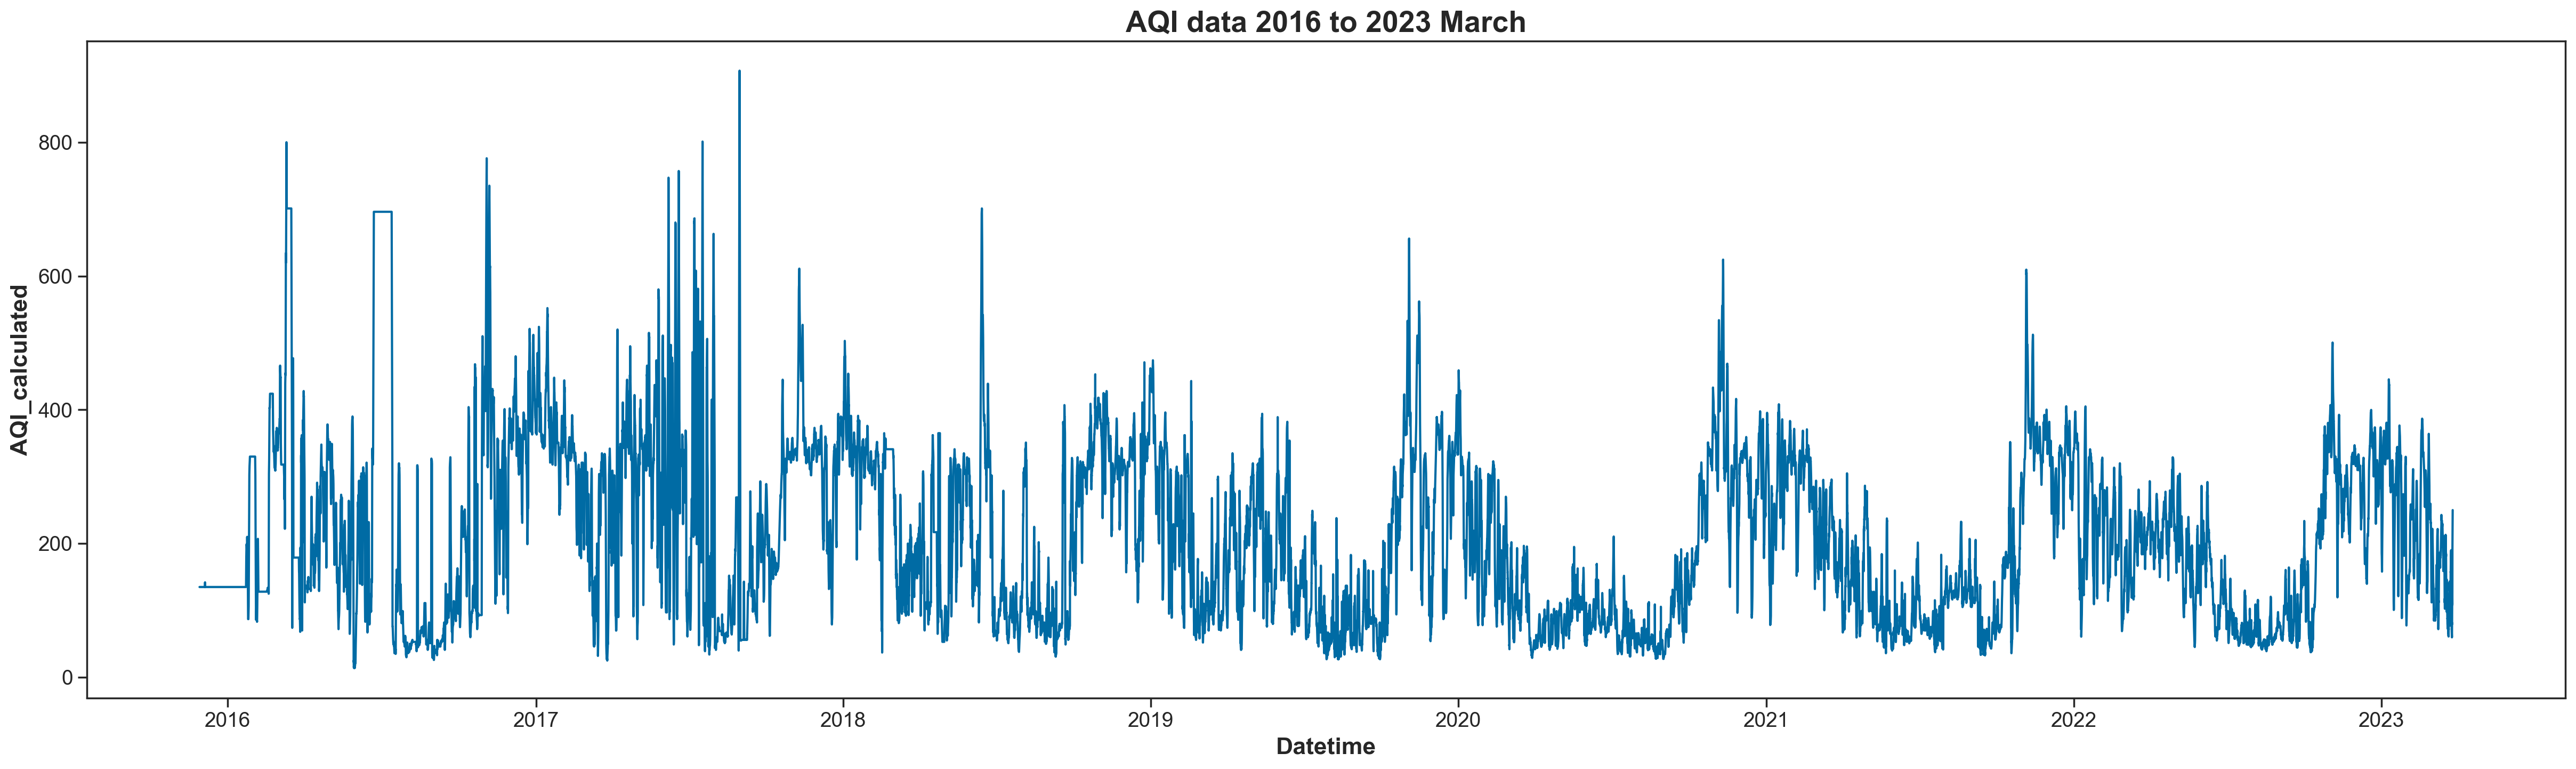

In [87]:
plt.figure(figsize=(30,8))
sns.lineplot(data = df_time_index, x = df_time_index.index, y = 'AQI_calculated', errorbar = None)
plt.title("AQI data 2016 to 2023 March")

In [12]:
# Taking from 2018 onwards

# Remove 2015
df = df[~(df.Datetime.str.contains('2015'))]

# Remove 2016
df = df[~(df.Datetime.str.contains('2016'))]

# Remove 2017
df = df[~(df.Datetime.str.contains('2017'))]

In [13]:
df

Datetime  PM2.5  PM2.5_24_avg     NO    NO2    NOx  \
0       2020-03-04 23:00:00  28.89     73.831667   7.25  21.37  28.63   
1       2020-03-05 00:00:00  21.17     71.019167   7.41  20.99  28.41   
2       2020-03-05 01:00:00  21.47     68.479583   7.48  20.49  27.97   
3       2020-03-05 02:00:00  31.70     66.369167   7.28  14.93  22.22   
4       2020-03-05 03:00:00  25.81     63.180417   7.85  17.92  25.77   
...                     ...    ...           ...    ...    ...    ...   
147411  2023-03-26 03:00:00  83.22     49.372083  23.90  49.59  70.03   
147412  2023-03-26 04:00:00  71.96     50.378750  24.25  53.15  71.91   
147413  2023-03-26 05:00:00  75.47     51.747083  24.55  54.38  64.34   
147414  2023-03-26 06:00:00  69.07     52.885000  23.09  54.48  72.73   
147415  2023-03-26 07:00:00  66.35     53.818750  23.02  56.28  66.13   

        NOx_SubIndex        SO2  SO2_SubIndex    CO  ...  Station_No Station  \
0            35.7875   7.690000      9.612500  1.76  ...                   0   
1            35.5125   7.440000      9.300000  1.71  ...                   0   
2            34.9625   6.823333      8.529167  1.74  ...                   0   
3            27.7750   6.633333      8.291667  1.60  ...                   0   
4            32.2125   6.583333      8.229167  1.56  ...                   0   
...              ...        ...           ...   ...  ...                 ...   
147411       87.5375  41.300000     51.376923  0.87  ...                   0   
147412       89.8875  40.560000     50.447179  0.66  ...                   0   
147413       80.4250  40.820000     50.773846  0.28  ...                   0   
147414       90.9125  39.290000     49.112500  0.43  ...                   0   
147415       82.6625  39.290000     49.112500  0.50  ...                   0   

        Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
...                   ...                ...                  ...   
147411                  0                  0                    1   
147412                  0                  0                    1   
147413                  0                  0                    1   
147414                  0                  0                    1   
147415                  0                  0                    1   

        AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
0                     0                    1                0   
1                     0                    1                0   
2                     0                    1                0   
3                     0                    1                0   
4                     0                    1                0   
...                 ...                  ...              ...   
147411                0                    0                0   
147412                0                    0                0   
147413                0                    0                0   
147414                0                    0                0   
147415                0                    0                0   

        AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
0                             0                  0                     0  
1                             0                  0                     0  
2                             0                  0                     0  
3                             0                  0                     0  
4                             0                  0                     0  
...                         ...                ...                   ...  
147411                        1               

In [15]:
# Creating a copy

df_time_index = df.copy()
df_time_index

Datetime  PM2.5  PM2.5_24_avg     NO    NO2    NOx  \
0       2020-03-04 23:00:00  28.89     73.831667   7.25  21.37  28.63   
1       2020-03-05 00:00:00  21.17     71.019167   7.41  20.99  28.41   
2       2020-03-05 01:00:00  21.47     68.479583   7.48  20.49  27.97   
3       2020-03-05 02:00:00  31.70     66.369167   7.28  14.93  22.22   
4       2020-03-05 03:00:00  25.81     63.180417   7.85  17.92  25.77   
...                     ...    ...           ...    ...    ...    ...   
147411  2023-03-26 03:00:00  83.22     49.372083  23.90  49.59  70.03   
147412  2023-03-26 04:00:00  71.96     50.378750  24.25  53.15  71.91   
147413  2023-03-26 05:00:00  75.47     51.747083  24.55  54.38  64.34   
147414  2023-03-26 06:00:00  69.07     52.885000  23.09  54.48  72.73   
147415  2023-03-26 07:00:00  66.35     53.818750  23.02  56.28  66.13   

        NOx_SubIndex        SO2  SO2_SubIndex    CO  ...  Station_No Station  \
0            35.7875   7.690000      9.612500  1.76  ...                   0   
1            35.5125   7.440000      9.300000  1.71  ...                   0   
2            34.9625   6.823333      8.529167  1.74  ...                   0   
3            27.7750   6.633333      8.291667  1.60  ...                   0   
4            32.2125   6.583333      8.229167  1.56  ...                   0   
...              ...        ...           ...   ...  ...                 ...   
147411       87.5375  41.300000     51.376923  0.87  ...                   0   
147412       89.8875  40.560000     50.447179  0.66  ...                   0   
147413       80.4250  40.820000     50.773846  0.28  ...                   0   
147414       90.9125  39.290000     49.112500  0.43  ...                   0   
147415       82.6625  39.290000     49.112500  0.50  ...                   0   

        Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
...                   ...                ...                  ...   
147411                  0                  0                    1   
147412                  0                  0                    1   
147413                  0                  0                    1   
147414                  0                  0                    1   
147415                  0                  0                    1   

        AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
0                     0                    1                0   
1                     0                    1                0   
2                     0                    1                0   
3                     0                    1                0   
4                     0                    1                0   
...                 ...                  ...              ...   
147411                0                    0                0   
147412                0                    0                0   
147413                0                    0                0   
147414                0                    0                0   
147415                0                    0                0   

        AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
0                             0                  0                     0  
1                             0                  0                     0  
2                             0                  0                     0  
3                             0                  0                     0  
4                             0                  0                     0  
...                         ...                ...                   ...  
147411                        1               

In [16]:
# Convert the dtype of Datetime column

df_time_index['Datetime'] = pd.to_datetime(df_time_index['Datetime'])
df_time_index

Datetime  PM2.5  PM2.5_24_avg     NO    NO2    NOx  \
0      2020-03-04 23:00:00  28.89     73.831667   7.25  21.37  28.63   
1      2020-03-05 00:00:00  21.17     71.019167   7.41  20.99  28.41   
2      2020-03-05 01:00:00  21.47     68.479583   7.48  20.49  27.97   
3      2020-03-05 02:00:00  31.70     66.369167   7.28  14.93  22.22   
4      2020-03-05 03:00:00  25.81     63.180417   7.85  17.92  25.77   
...                    ...    ...           ...    ...    ...    ...   
147411 2023-03-26 03:00:00  83.22     49.372083  23.90  49.59  70.03   
147412 2023-03-26 04:00:00  71.96     50.378750  24.25  53.15  71.91   
147413 2023-03-26 05:00:00  75.47     51.747083  24.55  54.38  64.34   
147414 2023-03-26 06:00:00  69.07     52.885000  23.09  54.48  72.73   
147415 2023-03-26 07:00:00  66.35     53.818750  23.02  56.28  66.13   

        NOx_SubIndex        SO2  SO2_SubIndex    CO  ...  Station_No Station  \
0            35.7875   7.690000      9.612500  1.76  ...                   0   
1            35.5125   7.440000      9.300000  1.71  ...                   0   
2            34.9625   6.823333      8.529167  1.74  ...                   0   
3            27.7750   6.633333      8.291667  1.60  ...                   0   
4            32.2125   6.583333      8.229167  1.56  ...                   0   
...              ...        ...           ...   ...  ...                 ...   
147411       87.5375  41.300000     51.376923  0.87  ...                   0   
147412       89.8875  40.560000     50.447179  0.66  ...                   0   
147413       80.4250  40.820000     50.773846  0.28  ...                   0   
147414       90.9125  39.290000     49.112500  0.43  ...                   0   
147415       82.6625  39.290000     49.112500  0.50  ...                   0   

        Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
...                   ...                ...                  ...   
147411                  0                  0                    1   
147412                  0                  0                    1   
147413                  0                  0                    1   
147414                  0                  0                    1   
147415                  0                  0                    1   

        AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
0                     0                    1                0   
1                     0                    1                0   
2                     0                    1                0   
3                     0                    1                0   
4                     0                    1                0   
...                 ...                  ...              ...   
147411                0                    0                0   
147412                0                    0                0   
147413                0                    0                0   
147414                0                    0                0   
147415                0                    0                0   

        AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
0                             0                  0                     0  
1                             0                  0                     0  
2                             0                  0                     0  
3                             0                  0                     0  
4                             0                  0                     0  
...                         ...                ...                   ...  
147411                        1                  0       

In [17]:
# Set the index

df_time_index.set_index('Datetime', drop=True, inplace=True)

In [18]:
df_time_index

PM2.5  PM2.5_24_avg     NO    NO2    NOx  NOx_SubIndex  \
Datetime                                                                      
2020-03-04 23:00:00  28.89     73.831667   7.25  21.37  28.63       35.7875   
2020-03-05 00:00:00  21.17     71.019167   7.41  20.99  28.41       35.5125   
2020-03-05 01:00:00  21.47     68.479583   7.48  20.49  27.97       34.9625   
2020-03-05 02:00:00  31.70     66.369167   7.28  14.93  22.22       27.7750   
2020-03-05 03:00:00  25.81     63.180417   7.85  17.92  25.77       32.2125   
...                    ...           ...    ...    ...    ...           ...   
2023-03-26 03:00:00  83.22     49.372083  23.90  49.59  70.03       87.5375   
2023-03-26 04:00:00  71.96     50.378750  24.25  53.15  71.91       89.8875   
2023-03-26 05:00:00  75.47     51.747083  24.55  54.38  64.34       80.4250   
2023-03-26 06:00:00  69.07     52.885000  23.09  54.48  72.73       90.9125   
2023-03-26 07:00:00  66.35     53.818750  23.02  56.28  66.13       82.6625   

                           SO2  SO2_SubIndex    CO  CO_8_avg  ...  \
Datetime                                                      ...   
2020-03-04 23:00:00   7.690000      9.612500  1.76   1.75000  ...   
2020-03-05 00:00:00   7.440000      9.300000  1.71   1.72750  ...   
2020-03-05 01:00:00   6.823333      8.529167  1.74   1.72125  ...   
2020-03-05 02:00:00   6.633333      8.291667  1.60   1.71250  ...   
2020-03-05 03:00:00   6.583333      8.229167  1.56   1.71125  ...   
...                        ...           ...   ...       ...  ...   
2023-03-26 03:00:00  41.300000     51.376923  0.87   1.71000  ...   
2023-03-26 04:00:00  40.560000     50.447179  0.66   1.51125  ...   
2023-03-26 05:00:00  40.820000     50.773846  0.28   0.94250  ...   
2023-03-26 06:00:00  39.290000     49.112500  0.43   0.75750  ...   
2023-03-26 07:00:00  39.290000     49.112500  0.50   0.57875  ...   

                     Station_No Station  Station_Sector 51  Station_Teri Gram  \
Datetime                                                                        
2020-03-04 23:00:00                   0                  0                  0   
2020-03-05 00:00:00                   0                  0                  0   
2020-03-05 01:00:00                   0                  0                  0   
2020-03-05 02:00:00                   0                  0                  0   
2020-03-05 03:00:00                   0                  0                  0   
...                                 ...                ...                ...   
2023-03-26 03:00:00                   0                  0                  0   
2023-03-26 04:00:00                   0                  0                  0   
2023-03-26 05:00:00                   0                  0                  0   
2023-03-26 06:00:00                   0                  0                  0   
2023-03-26 07:00:00                   0                  0                  0   

                     Station_Vikas Sadan  AQI_Bucket_Good  \
Datetime                                                    
2020-03-04 23:00:00                    0                0   
2020-03-05 00:00:00                    0                0   
2020-03-05 01:00:00                    0                0   
2020-03-05 02:00:00                    0                0   
2020-03-05 03:00:00                    0                0   
...                                  ...              ...   
2023-03-26 03:00:00                    1                0   
2023-03-26 04:00:00                    1                0   
2023-03-26 05:00:00                    1                0   
2023-03-26 06:00:00                    1                0   
2023-03-26 07:00:00                    1                0   

                     AQI_Bucket_Moderate  AQI_Bucket_Poor  \
Datetime                                                    
2020-03-04 23:00:00                    1                0   
2020-03-05 00:00:00                    1                0   
202

<Figure size 3000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='AQI_calculated'>

Text(0.5, 1.0, 'AQI data 2018 to 2023 March')

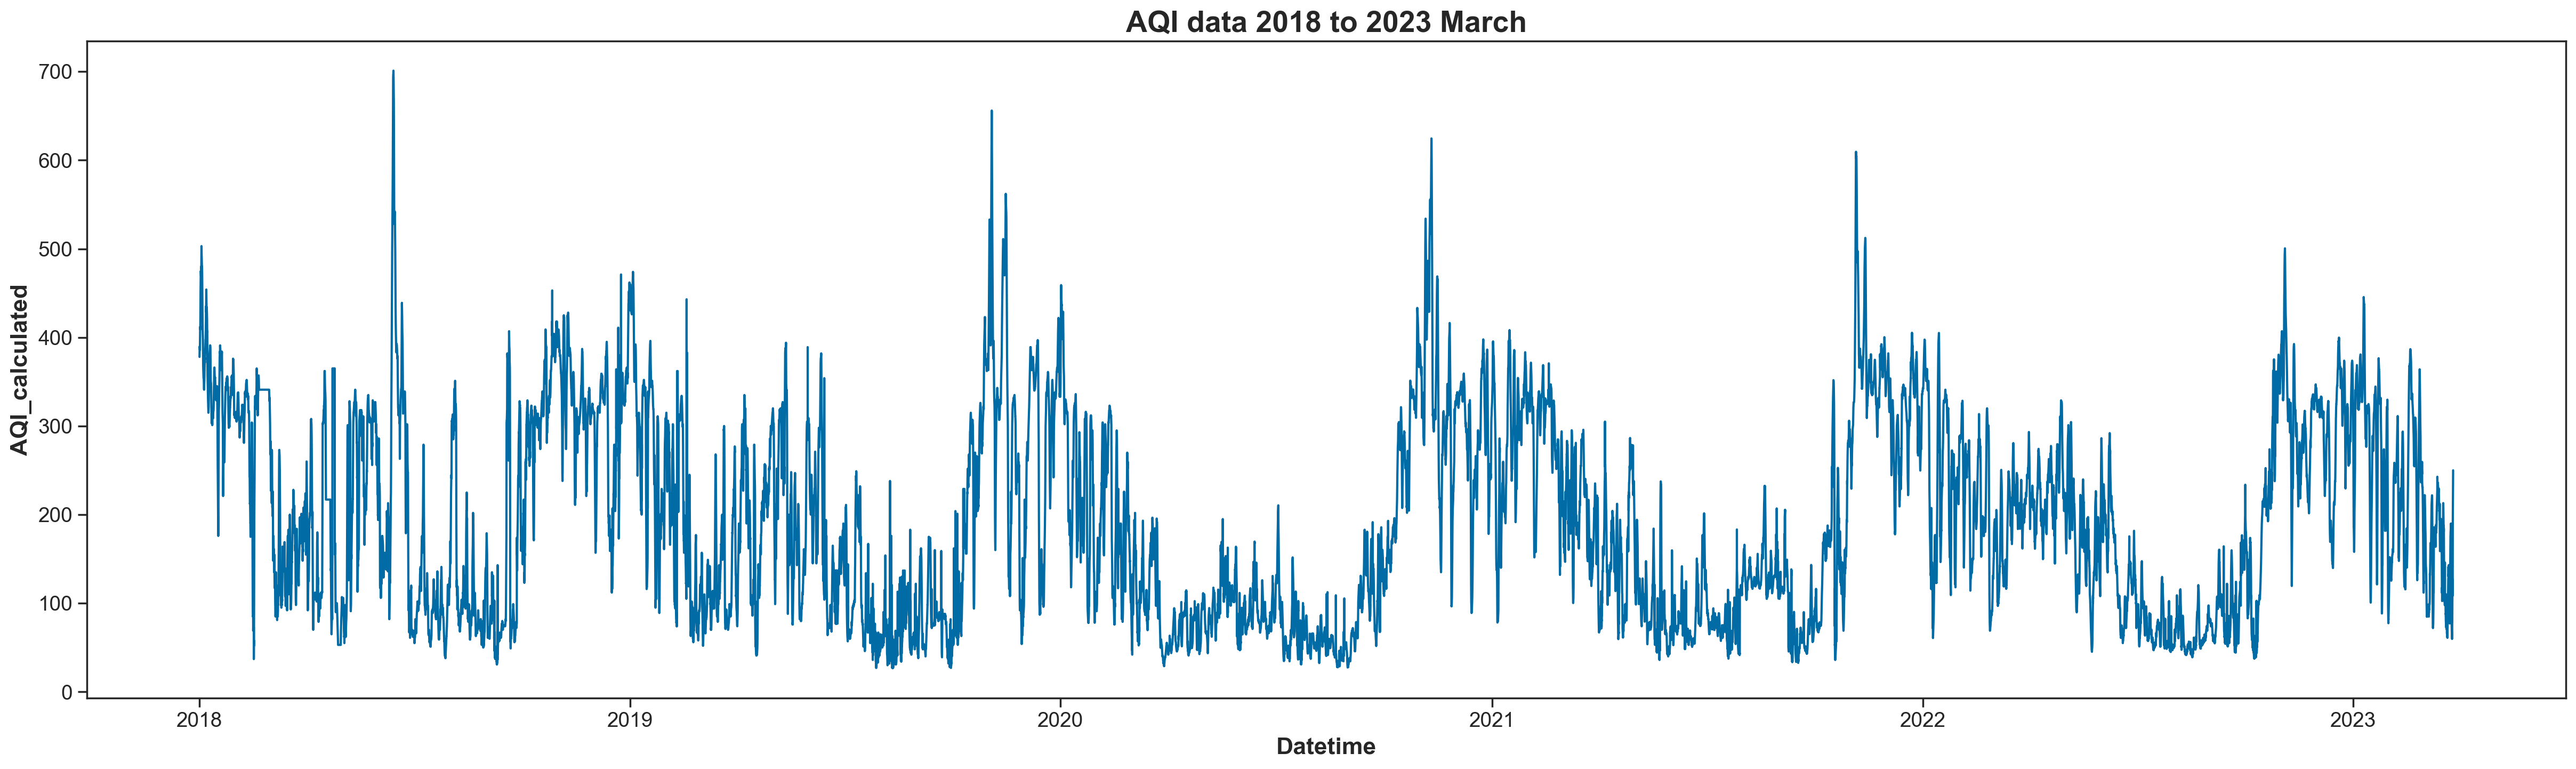

In [103]:
plt.figure(figsize=(30,8))
sns.lineplot(data = df_time_index, x = df_time_index.index, y = 'AQI_calculated', errorbar = None)
plt.title("AQI data 2018 to 2023 March")

# Training our first model

## Without feature scaling like normalizaton & standardization
#### - Note: Generally kNN, linear regression kind of algorithms need normalizaton or standardization, but, we are first checking the scores without doing it. Later in this notebook, we do normalization & then check the scores again.

### Random splitting into train 70% & test 30%

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df[['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]] ,
                                                    df['AQI_calculated'],
                                                    train_size=0.8)

In [105]:
X_train
X_test
y_train
y_test

PM2.5      NO    NO2     NOx        SO2    CO
64340    64.03    4.83  18.87   20.63  20.700000  0.95
128307  303.63  285.04  49.38  253.88   5.220000  3.79
78906    34.93    8.20   2.52    6.49   2.130000  0.35
4495     20.56    6.91  12.45   19.36   4.230000  0.59
94596    43.17    0.34   3.01    0.00  23.470000  0.65
...        ...     ...    ...     ...        ...   ...
20581    31.94    7.35  18.67   26.01   2.986667  0.87
14079    31.07    5.12   9.29   14.40  11.096667  0.66
69286    53.89    0.12  13.98    6.31   6.690000  0.56
58263    94.56   16.66  26.49   28.24   2.760000  0.40
107182   21.62    5.21  11.20   17.32   1.790000  0.42

[103252 rows x 6 columns]

PM2.5      NO     NO2     NOx        SO2    CO
125859  116.20    7.79    8.59   10.73   4.020000  0.47
119913   40.85    3.67   14.15   10.33   0.530000  0.52
146092   39.09   15.23   32.63   46.23  32.840000  0.55
99354   113.23   97.60    0.07   18.00   0.560000  1.39
101303   76.89    4.88   14.91   11.70   2.820000  0.65
...        ...     ...     ...     ...        ...   ...
66135    41.79    2.03   30.76   10.49   9.360000  0.56
145128  194.96   17.58   25.38   63.56   3.690000  0.98
12804     1.71  448.38  184.34  265.93   3.376667  1.29
127579  157.00    1.30    3.71    0.03   8.740000  1.10
86679    52.07    3.69   26.14   16.87   2.380000  0.55

[25814 rows x 6 columns]

64340     136.0
128307    368.0
78906      98.0
4495       57.0
94596      77.0
          ...  
20581      46.0
14079     103.0
69286      82.0
58263     122.0
107182     44.0
Name: AQI_calculated, Length: 103252, dtype: float64

125859    237.0
119913    190.0
146092    233.0
99354     177.0
101303    234.0
          ...  
66135      96.0
145128    380.0
12804     286.0
127579    311.0
86679     260.0
Name: AQI_calculated, Length: 25814, dtype: float64

#### kNN

In [106]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [108]:
knn.score(X_test, y_test)

0.7330138082374681

In [109]:
pred_knn = knn.predict(X_test)
pred_knn

array([224. ,  99.4, 100.8, ..., 286. , 330.4, 198. ])

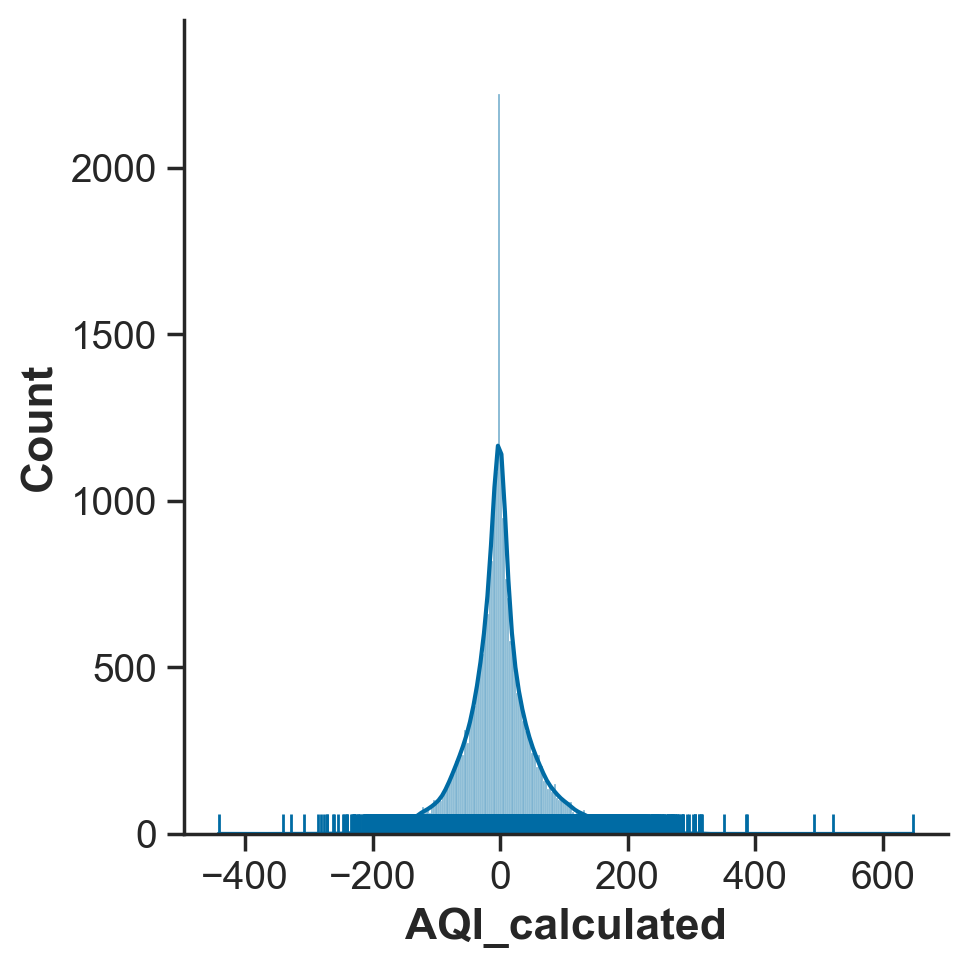

In [110]:
sns.displot(y_test - pred_knn, kde=True, rug=True)

In [111]:
print(f"MAPE is {round(mean_absolute_percentage_error(y_test , pred_knn) * 100, 2)}")
print(f"MAE is {round(mean_absolute_error(y_test , pred_knn), 2)}")
print(f"MSE is {round(mean_squared_error(y_test , pred_knn), 2)}")

MAPE is 30.08
MAE is 41.31
MSE is 3753.85


#### Neural Networks

In [112]:
import keras
from keras.models import Sequential # For creating NN
from keras.layers import Dense # for creating hidden layers
from keras.layers import LeakyReLU,PReLU,ELU # activation functions
from keras.layers import Dropout # dropout regularization
from keras.losses import MeanSquaredError, MeanAbsolutePercentageError

In [113]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(
    Dense(units=X_train.shape[1],
          kernel_initializer='he_uniform',
          activation='relu',
          input_dim=X_train.shape[1]))

# ReLU works best for he_uniform weight initialization

# Adding the second hidden layer
classifier.add(
    Dense(units=10, kernel_initializer='he_uniform', activation='relu'))

# Adding the third hidden layer
classifier.add(
    Dense(units=10, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(
    Dense(units=1, kernel_initializer='glorot_uniform'))

# sigmoid works best for glorot_uniform
# But at output layer we should add sigmoid because it converts o/p b/w [0,1]

# Compiling the ANN
classifier.compile(optimizer='adam', loss='mape')
# binary_crossentropy because we are dealing with binary classification

# Fitting the ANN to the Training set
# Taking val split as well
model_history = classifier.fit(X_train,
                               y_train,
                               validation_split=0.10,
                               epochs=100)

Epoch 1/100
2904/2904 [==============================] - 2s 626us/step - loss: 36.4674 - val_loss: 29.8497
Epoch 2/100
2904/2904 [==============================] - 2s 735us/step - loss: 29.6778 - val_loss: 29.5945
Epoch 3/100
2904/2904 [==============================] - 2s 667us/step - loss: 29.4501 - val_loss: 29.3967
Epoch 4/100
2904/2904 [==============================] - 2s 560us/step - loss: 29.2953 - val_loss: 29.2851
Epoch 5/100
2904/2904 [==============================] - 2s 584us/step - loss: 29.1778 - val_loss: 29.2893
Epoch 6/100
2904/2904 [==============================] - 2s 593us/step - loss: 29.0440 - val_loss: 28.8325
Epoch 7/100
2904/2904 [==============================] - 2s 579us/step - loss: 28.8666 - val_loss: 28.6815
Epoch 8/100
2904/2904 [==============================] - 2s 575us/step - loss: 28.7100 - val_loss: 28.5777
Epoch 9/100
2904/2904 [==============================] - 2s 572us/step - loss: 28.5727 - val_loss: 28.6287
Epoch 10/100
2904/2904 [=============

Epoch 77/100
2904/2904 [==============================] - 2s 599us/step - loss: 26.8723 - val_loss: 26.7892
Epoch 78/100
2904/2904 [==============================] - 2s 639us/step - loss: 26.8612 - val_loss: 26.7803
Epoch 79/100
2904/2904 [==============================] - 2s 686us/step - loss: 26.8632 - val_loss: 26.7323
Epoch 80/100
2904/2904 [==============================] - 3s 941us/step - loss: 26.8740 - val_loss: 26.6738
Epoch 81/100
2904/2904 [==============================] - 2s 602us/step - loss: 26.8760 - val_loss: 26.6555
Epoch 82/100
2904/2904 [==============================] - 2s 601us/step - loss: 26.8658 - val_loss: 26.7433
Epoch 83/100
2904/2904 [==============================] - 2s 597us/step - loss: 26.8719 - val_loss: 26.7765
Epoch 84/100
2904/2904 [==============================] - 2s 612us/step - loss: 26.8753 - val_loss: 26.7811
Epoch 85/100
2904/2904 [==============================] - 2s 679us/step - loss: 26.8619 - val_loss: 26.8697
Epoch 86/100
2904/2904 [====

In [114]:
model_stats = pd.DataFrame(model_history.history)
model_stats

loss   val_loss
0   36.467384  29.849718
1   29.677763  29.594458
2   29.450054  29.396734
3   29.295328  29.285099
4   29.177773  29.289314
..        ...        ...
95  26.852062  26.662136
96  26.849512  26.724115
97  26.866930  26.677265
98  26.864119  26.660872
99  26.855495  26.649963

[100 rows x 2 columns]

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

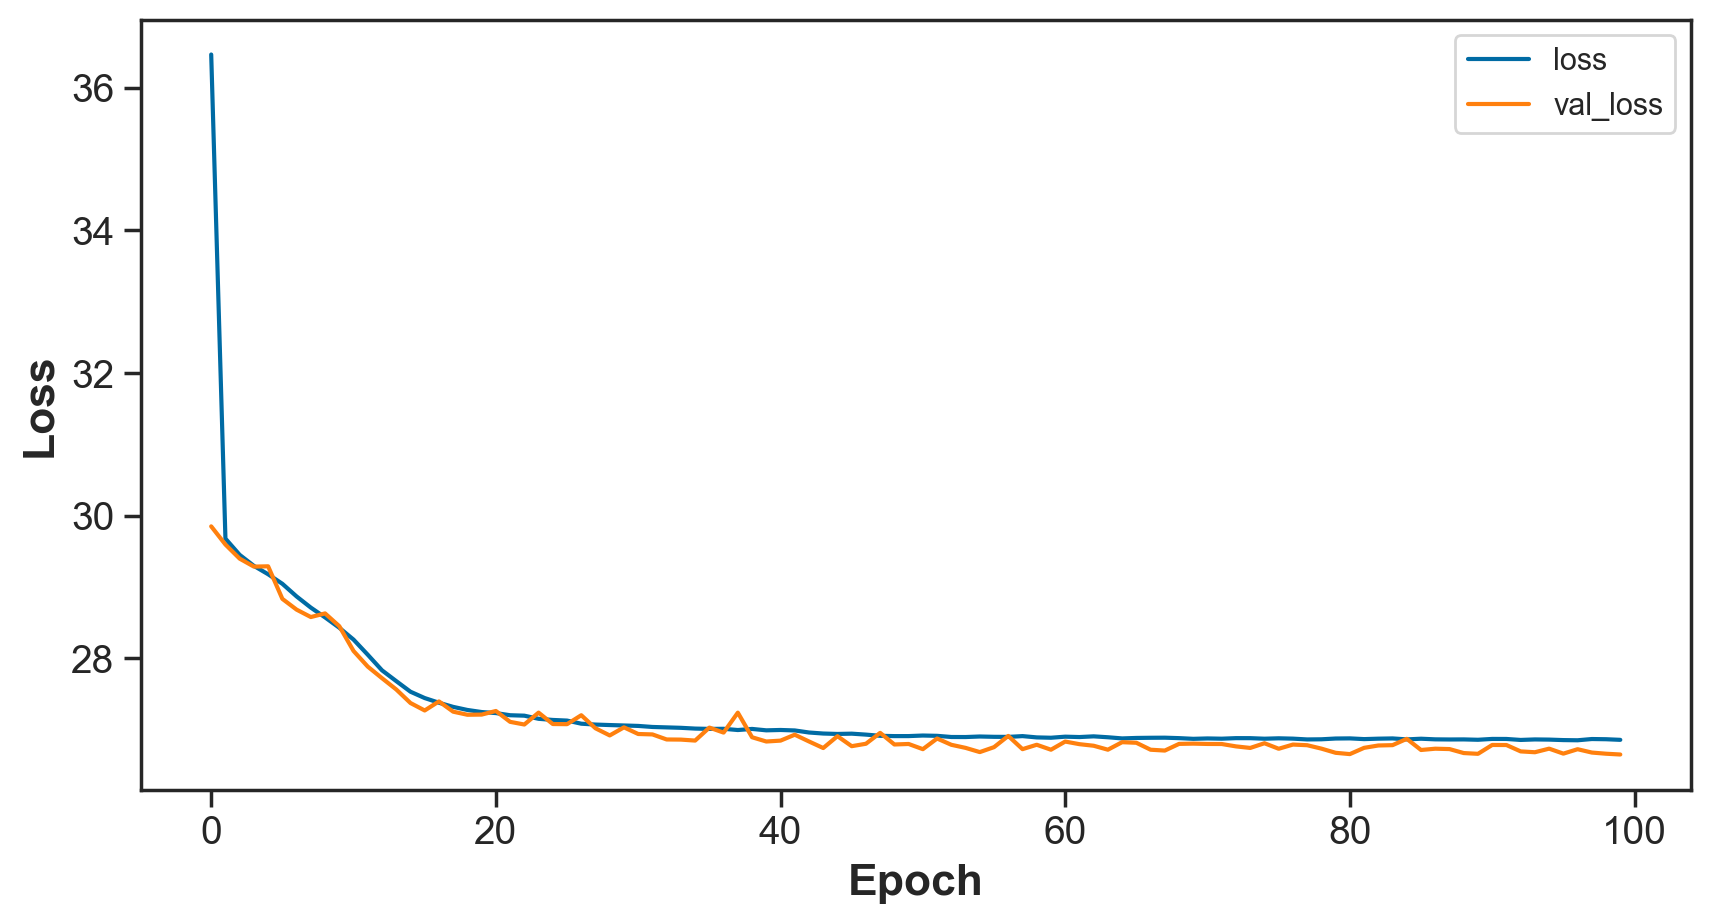

In [115]:
plt.figure(figsize=(10,5))
plt.plot(model_stats[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [116]:
def r2_metric(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(
    Dense(units=X_train.shape[1],
          kernel_initializer='he_uniform',
          activation='relu',
          input_dim=X_train.shape[1]))

# ReLU works best for he_uniform weight initialization

# Adding the second hidden layer
classifier.add(
    Dense(units=10, kernel_initializer='he_uniform', activation='relu'))


# Adding the third hidden layer
classifier.add(
    Dense(units=20, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(
    Dense(units=1, kernel_initializer='glorot_uniform'))

# sigmoid works best for glorot_uniform
# But at output layer we should add sigmoid because it converts o/p b/w [0,1]

# Compiling the ANN

classifier.compile(optimizer='adam', loss='mape')
# binary_crossentropy because we are dealing with binary classification

# Fitting the ANN to the Training set
# Taking val split as well
model_history = classifier.fit(X_train,
                               y_train,
                               validation_split=0.10,
                               epochs=100)

Epoch 1/100
2904/2904 [==============================] - 2s 559us/step - loss: 33.2244 - val_loss: 29.8279
Epoch 2/100
2904/2904 [==============================] - 2s 562us/step - loss: 29.6759 - val_loss: 29.4880
Epoch 3/100
2904/2904 [==============================] - 2s 618us/step - loss: 29.4565 - val_loss: 29.3462
Epoch 4/100
2904/2904 [==============================] - 2s 568us/step - loss: 29.3457 - val_loss: 29.2763
Epoch 5/100
2904/2904 [==============================] - 2s 585us/step - loss: 29.2861 - val_loss: 29.1895
Epoch 6/100
2904/2904 [==============================] - 2s 570us/step - loss: 29.2173 - val_loss: 29.1014
Epoch 7/100
2904/2904 [==============================] - 2s 584us/step - loss: 29.1691 - val_loss: 29.0712
Epoch 8/100
2904/2904 [==============================] - 2s 590us/step - loss: 29.1105 - val_loss: 29.4740
Epoch 9/100
2904/2904 [==============================] - 2s 572us/step - loss: 29.0747 - val_loss: 29.0770
Epoch 10/100
2904/2904 [=============

Epoch 77/100
2904/2904 [==============================] - 2s 588us/step - loss: 27.0549 - val_loss: 26.9512
Epoch 78/100
2904/2904 [==============================] - 2s 579us/step - loss: 27.0309 - val_loss: 26.9754
Epoch 79/100
2904/2904 [==============================] - 2s 610us/step - loss: 27.0346 - val_loss: 26.8752
Epoch 80/100
2904/2904 [==============================] - 2s 662us/step - loss: 27.0345 - val_loss: 26.8526
Epoch 81/100
2904/2904 [==============================] - 2s 660us/step - loss: 27.0391 - val_loss: 26.8917
Epoch 82/100
2904/2904 [==============================] - 2s 591us/step - loss: 27.0335 - val_loss: 26.9220
Epoch 83/100
2904/2904 [==============================] - 2s 612us/step - loss: 27.0255 - val_loss: 26.8676
Epoch 84/100
2904/2904 [==============================] - 2s 610us/step - loss: 27.0168 - val_loss: 26.7959
Epoch 85/100
2904/2904 [==============================] - 2s 612us/step - loss: 27.0193 - val_loss: 26.8221
Epoch 86/100
2904/2904 [====

loss   val_loss
0   33.224400  29.827904
1   29.675930  29.487991
2   29.456522  29.346191
3   29.345673  29.276339
4   29.286112  29.189470
..        ...        ...
95  26.972588  26.810270
96  26.979511  26.778151
97  26.981228  26.848583
98  26.964146  26.721643
99  26.969828  26.807291

[100 rows x 2 columns]

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

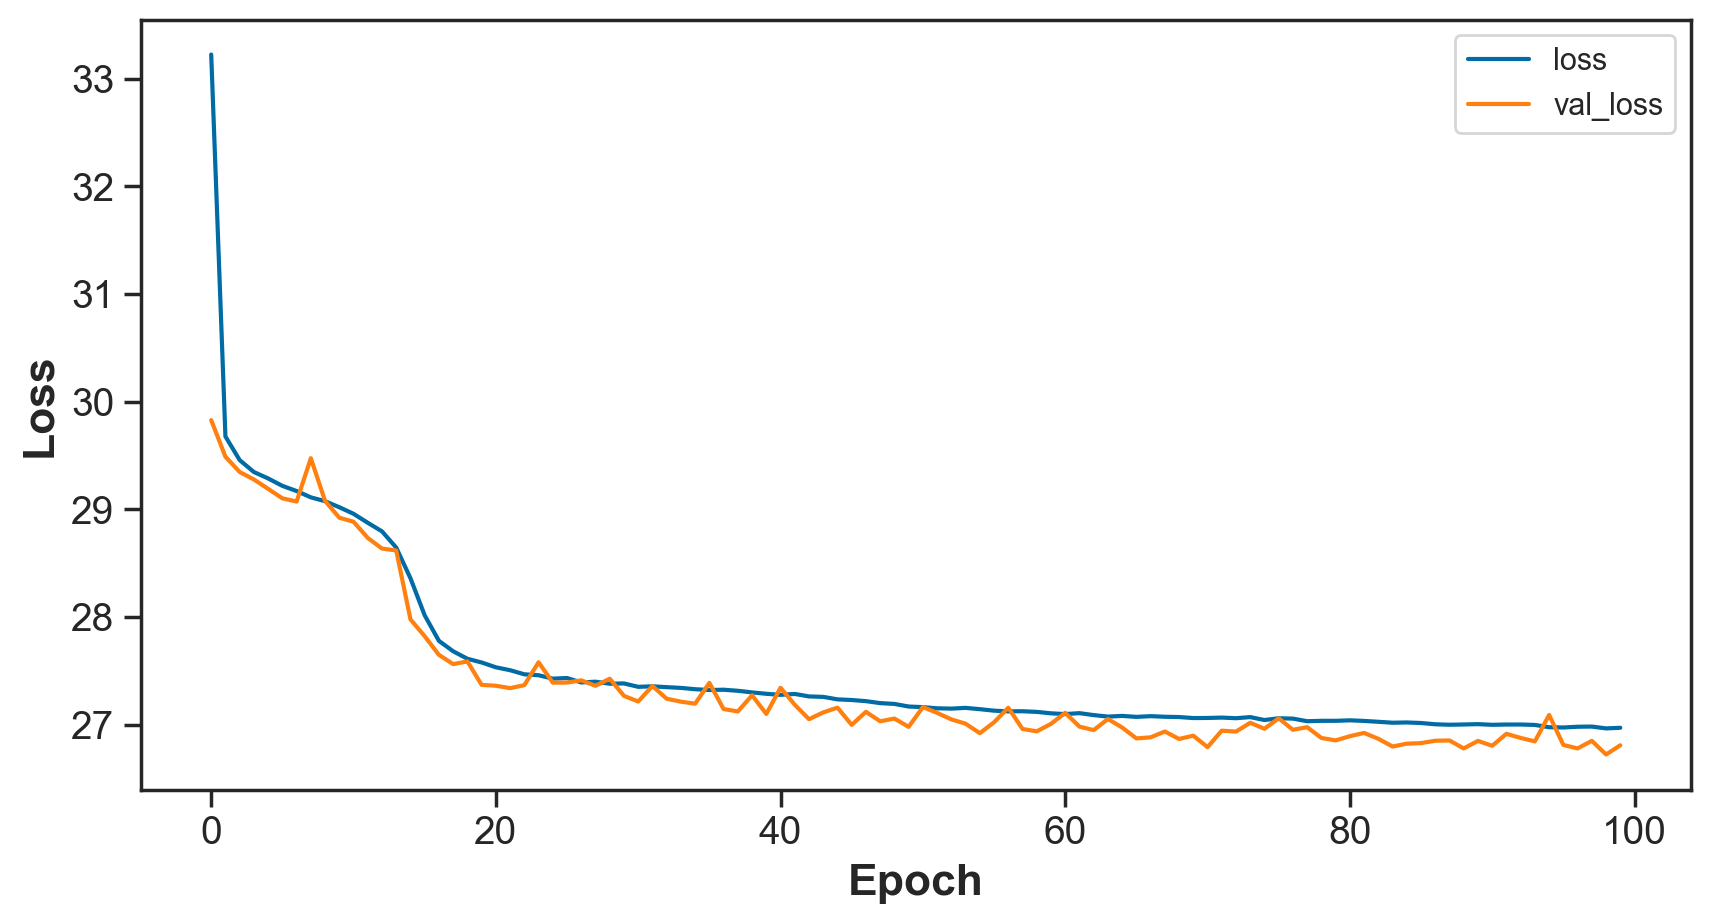

In [117]:
model_stats = pd.DataFrame(model_history.history)
model_stats
plt.figure(figsize=(10,5))
plt.plot(model_stats[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')


807/807 [==============================] - 0s 368us/step


array([205.3556  ,  68.580925,  71.61892 , ..., 285.20825 , 278.7569  ,
        85.819695], dtype=float32)

125859    237.0
119913    190.0
146092    233.0
99354     177.0
101303    234.0
          ...  
66135      96.0
145128    380.0
12804     286.0
127579    311.0
86679     260.0
Name: AQI_calculated, Length: 25814, dtype: float64

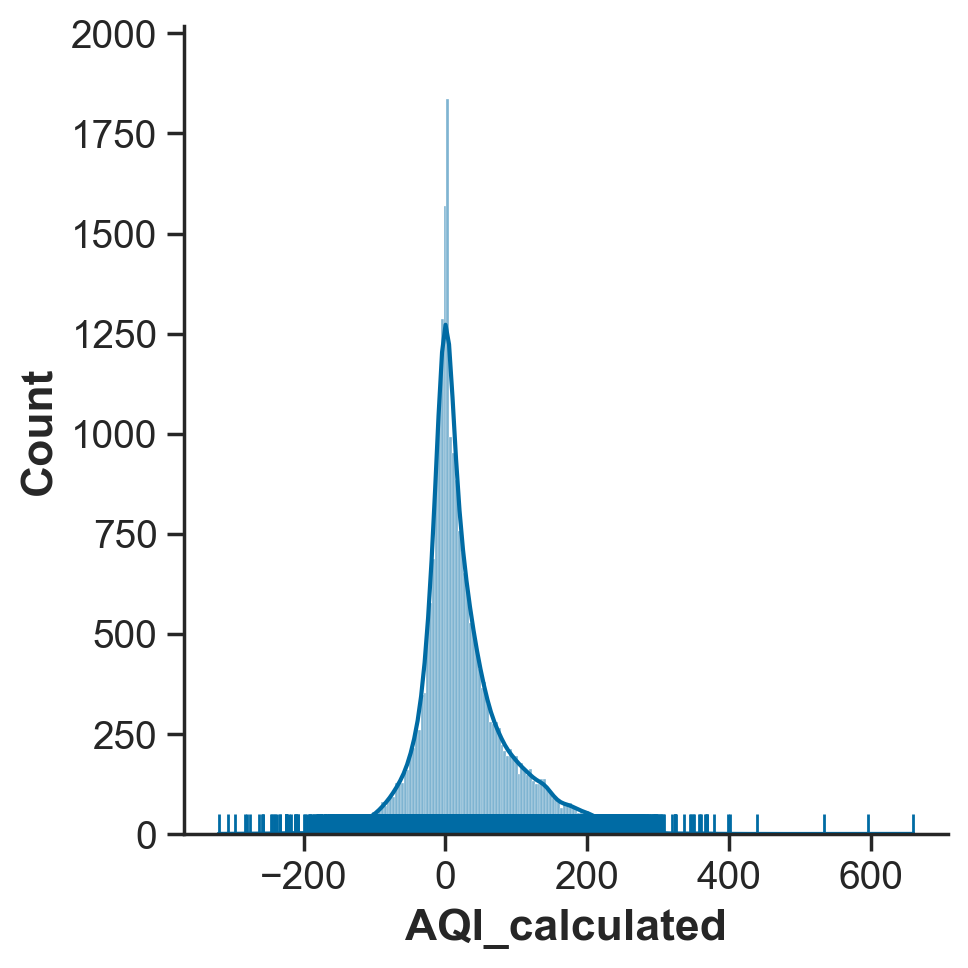

In [121]:
y_pred = classifier.predict(X_test)
y_pred.reshape(-1)
y_test
sns.displot(y_test - y_pred.reshape(-1), kde=True, rug=True)

In [122]:
mean_absolute_percentage_error(y_test, y_pred)

0.26892412252585995

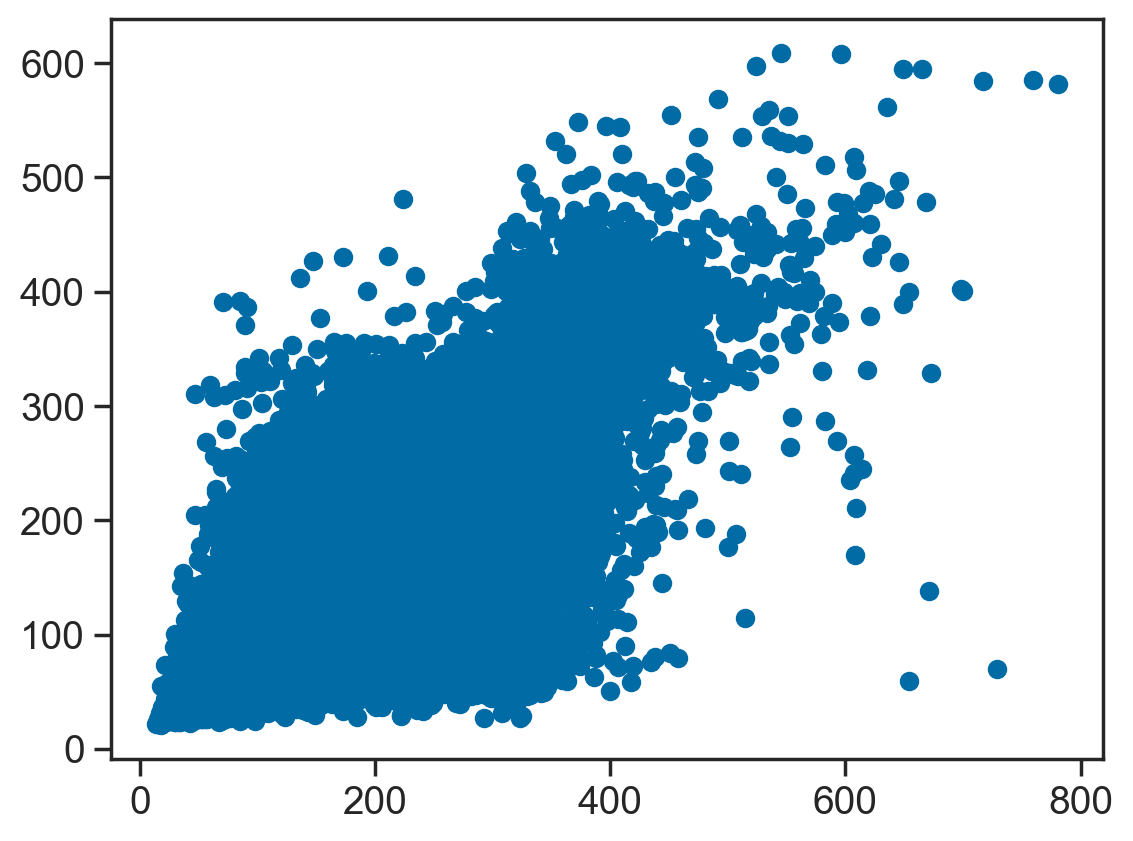

In [123]:
plt.scatter(y_test,y_pred.reshape(-1))

#### Keras Tuner

In [70]:
# hp.Int https://keras.io/api/keras_tuner/hyperparameters/#hyperparameters-class
# hp.Choice https://keras.io/api/keras_tuner/hyperparameters/#hyperparameters-class 
# hp is the hyperparameter

def build_model(hp):
    model = keras.Sequential([
        
        keras.layers.Dense(units=X_train.shape[1],
              kernel_initializer='he_uniform',
              activation='relu',
              input_dim=X_train.shape[1]),

        keras.layers.Dense(units=hp.Int('dense_1_units',
                                        min_value=5,
                                        max_value=50,
                                        step=5),
                           activation='relu'),
        
        keras.layers.Dense(units=hp.Int('dense_2_units',
                                        min_value=5,
                                        max_value=50,
                                        step=10),
                           activation='relu'),

        # Output layer is obviously 1 because ours is regression problem
        keras.layers.Dense(units=1)
    ])

     # Learning rate - We are tuning it
    # WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, 
    # please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
    model.compile(optimizer=keras.optimizers.legacy.Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='mape',
                  metrics=['accuracy'])

    return model

In [60]:
from keras_tuner import RandomSearch
from keras_tuner import HyperParameters

Using TensorFlow backend


In [61]:
build_model(HyperParameters())

In [71]:
tuner_search = RandomSearch(build_model,
                            objective='val_accuracy',
                            max_trials=5,
                            directory='keras_tuner_output_1',
                            project_name="AQI_Keras_Tuner")

Reloading Tuner from keras_tuner_output_1/AQI_Keras_Tuner/tuner0.json


In [72]:
tuner_search.search(X_train, y_train, epochs=5, validation_split=0.1)

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 00m 11s


#### Other regressors

LinearRegression()


LinearRegression()

y_pred  y_test
125859  193.683847   237.0
119913  121.284109   190.0
146092  121.591121   233.0
99354   204.642701   177.0
101303  159.121281   234.0
...            ...     ...
66135   130.724177    96.0
145128  290.575328   380.0
12804   258.738838   286.0
127579  234.581891   311.0
86679   140.627588   260.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.7607621882568242


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'LinearRegression()')

score(X_test, y_test)  0.578741970486212
MAPE is 51.5
MAE is 60.87
MSE is 5922.93
r2_score  0.578741970486212



DecisionTreeRegressor()


DecisionTreeRegressor()

y_pred  y_test
125859   241.0   237.0
119913    93.0   190.0
146092    91.0   233.0
99354    188.0   177.0
101303   335.0   234.0
...        ...     ...
66135     52.0    96.0
145128   378.0   380.0
12804    286.0   286.0
127579   352.0   311.0
86679    321.0   260.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.7764364105979508


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'DecisionTreeRegressor()')

score(X_test, y_test)  0.5508566945494217
MAPE is 36.16
MAE is 50.3
MSE is 6315.0
r2_score  0.5508566945494217



RandomForestRegressor()


RandomForestRegressor()

y_pred  y_test
125859  198.279091   237.0
119913  129.040000   190.0
146092   98.270000   233.0
99354   160.050000   177.0
101303  221.580000   234.0
...            ...     ...
66135   101.370000    96.0
145128  326.340000   380.0
12804   286.000000   286.0
127579  322.805714   311.0
86679   115.560000   260.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.8816842879005544


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'RandomForestRegressor()')

score(X_test, y_test)  0.7772483985085263
MAPE is 28.58
MAE is 38.09
MSE is 3131.91
r2_score  0.7772483985085263



AdaBoostRegressor()


AdaBoostRegressor()

y_pred  y_test
125859  268.620482   237.0
119913  146.363521   190.0
146092  170.792564   233.0
99354   268.620482   177.0
101303  193.114508   234.0
...            ...     ...
66135   170.005825    96.0
145128  315.572273   380.0
12804   240.515681   286.0
127579  307.106781   311.0
86679   191.758423   260.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.8158801651835291


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'AdaBoostRegressor()')

score(X_test, y_test)  0.5333561074085629
MAPE is 76.14
MAE is 68.85
MSE is 6561.06
r2_score  0.5333561074085629



BaggingRegressor()


BaggingRegressor()

y_pred  y_test
125859   217.1   237.0
119913   130.7   190.0
146092   105.8   233.0
99354    149.8   177.0
101303   214.4   234.0
...        ...     ...
66135    113.5    96.0
145128   317.5   380.0
12804    286.0   286.0
127579   317.4   311.0
86679    116.1   260.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.8679294535436954


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'BaggingRegressor()')

score(X_test, y_test)  0.7528782247086875
MAPE is 29.94
MAE is 40.14
MSE is 3474.56
r2_score  0.7528782247086875





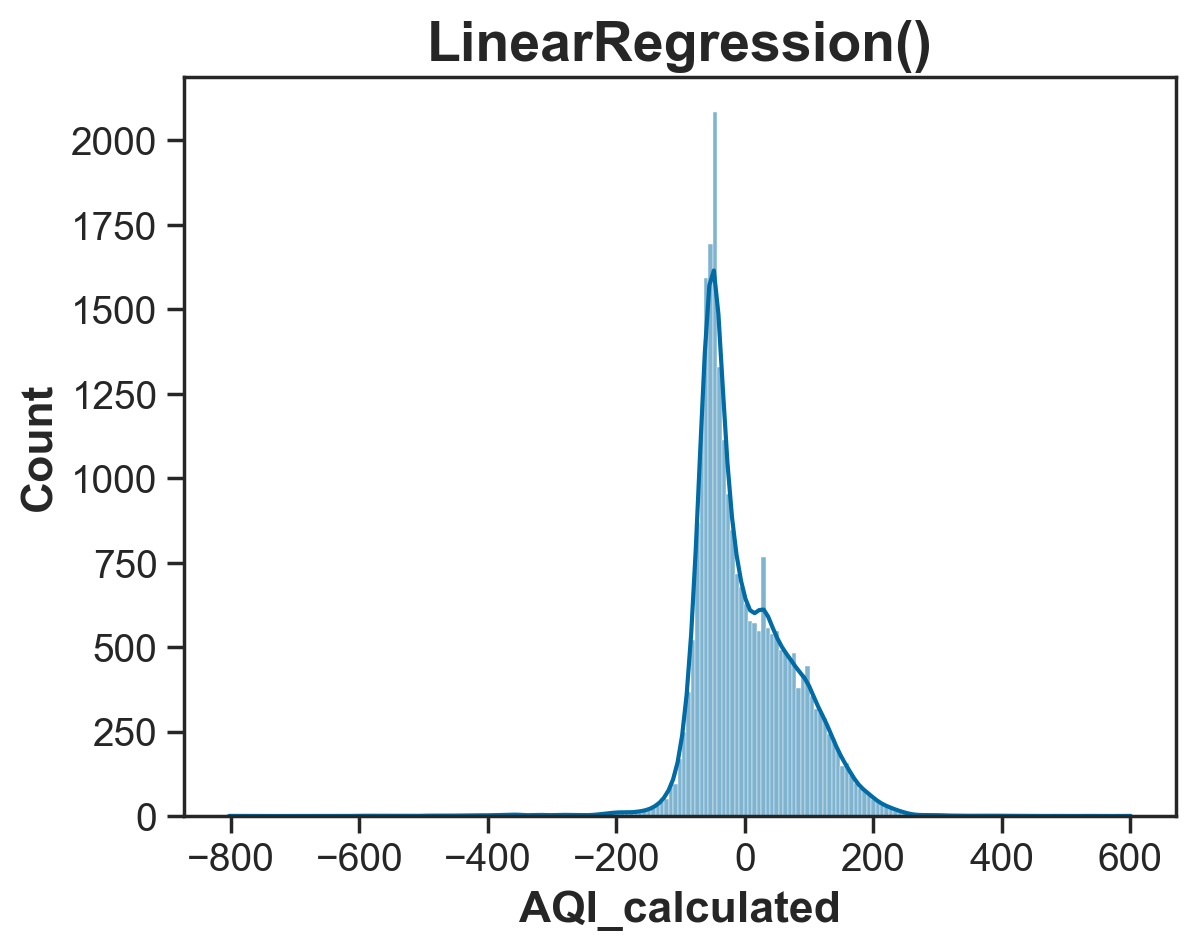

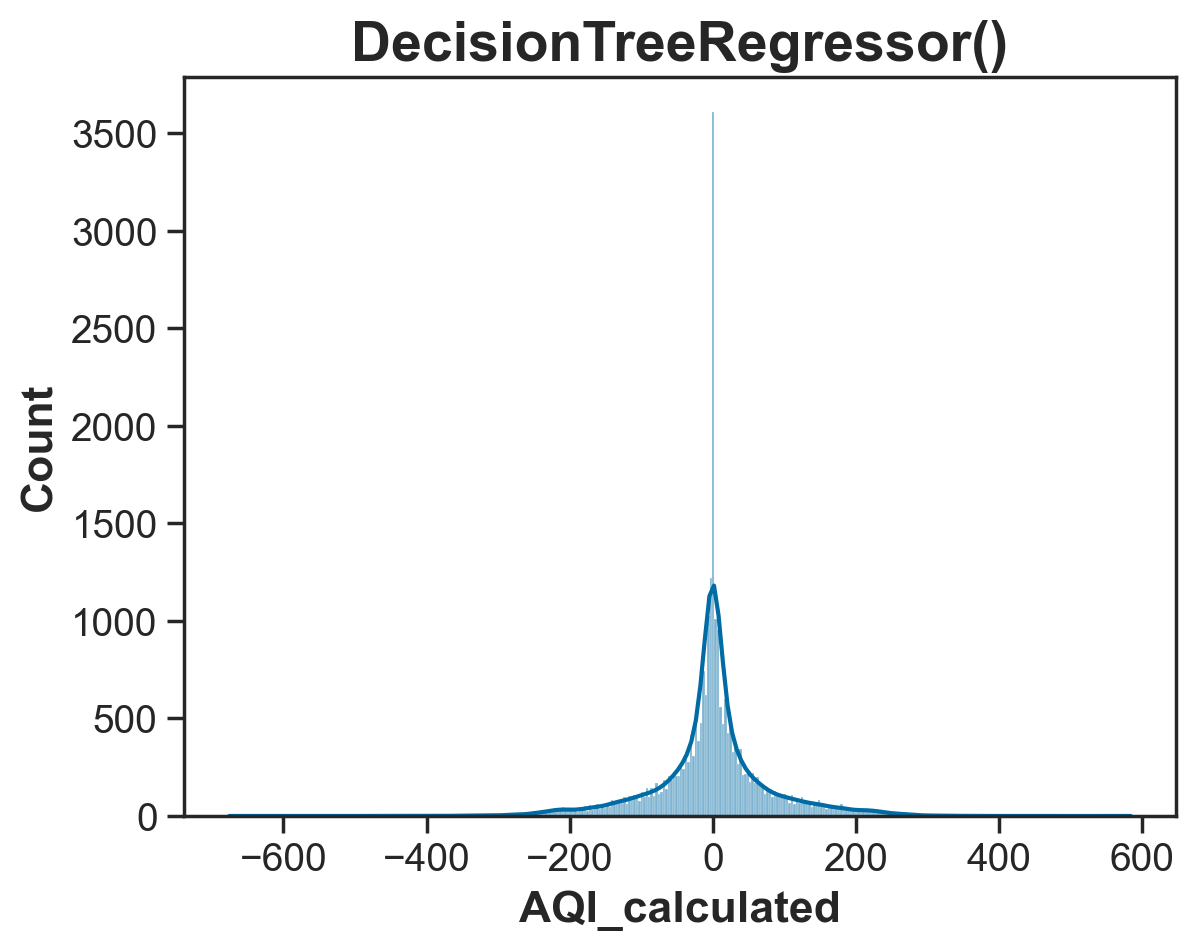

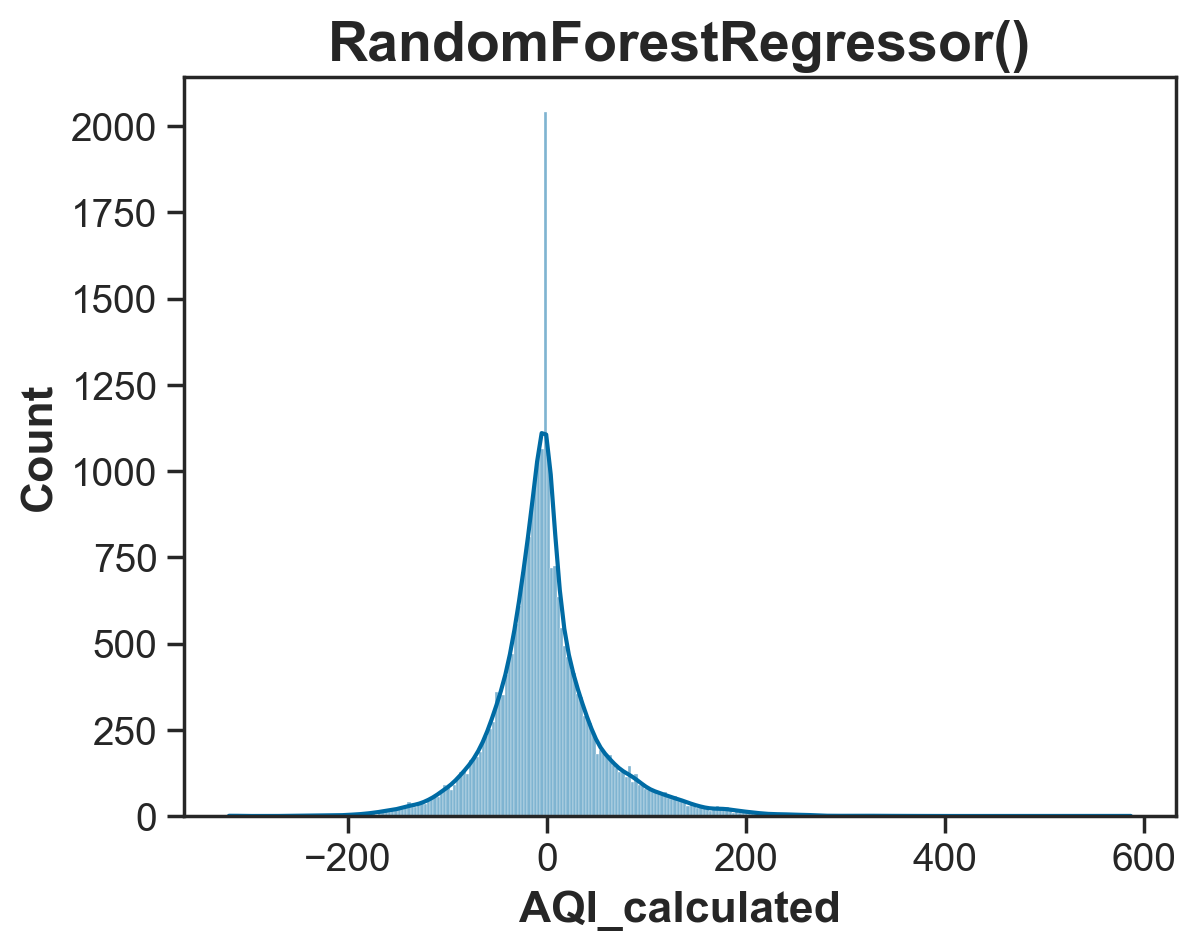

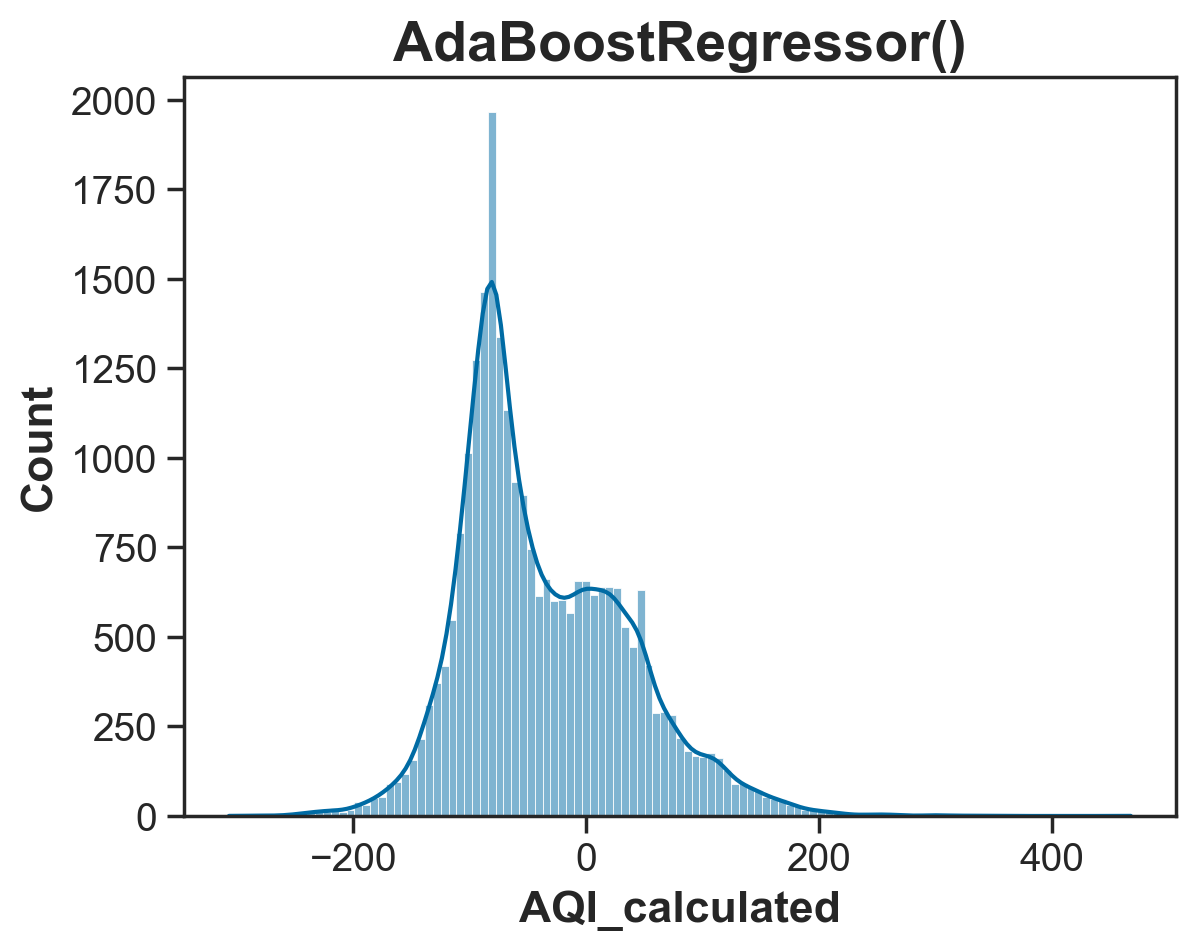

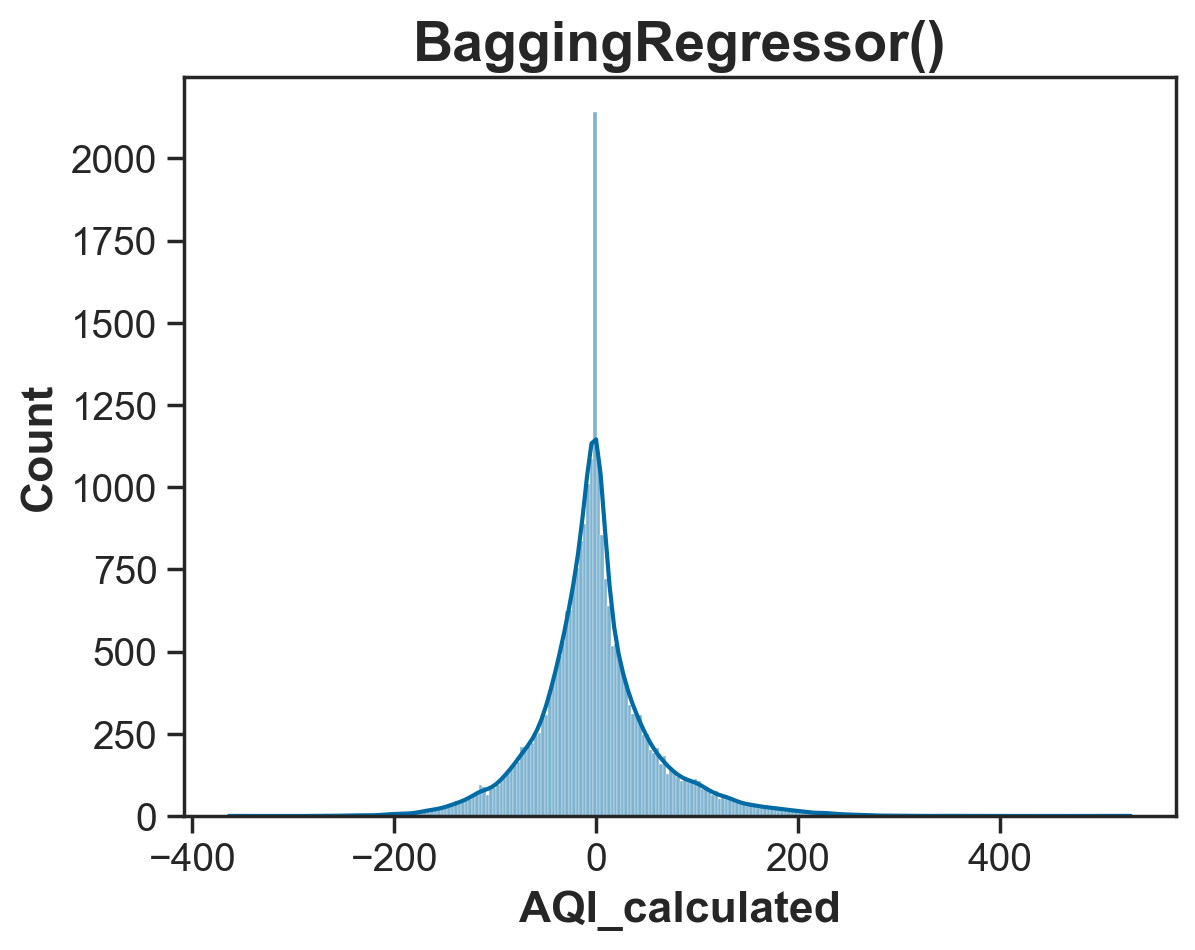

In [124]:
lr = LinearRegression()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()

for i in [lr, d_tree, rf, ab, br]:
    model = i
    print(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_actual = pd.DataFrame({'y_pred': y_pred, "y_test": y_test})
    predicted_actual
    print("Correlation b/w actual and predicted", predicted_actual['y_pred'].corr(predicted_actual['y_test']))
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))

#     s = cross_val_score(estimator=model,
#                         X=df[['PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO']],
#                         y=df['AQI_calculated'],
#                         scoring='r2',
#                         cv=5)
#     print("\nCV scores", s)
#     print("\nAverage cv score ", np.mean(s))
    print(f"MAPE is {round(mean_absolute_percentage_error(y_test , y_pred) * 100, 2)}")
    print(f"MAE is {round(mean_absolute_error(y_test , y_pred), 2)}")
    print(f"MSE is {round(mean_squared_error(y_test , y_pred), 2)}")
    print("r2_score ", r2_score(y_test, y_pred))
    print("\n\n")

- Clearly, Random forests are the best choice.

### Splitting station-wise & training

In [41]:
df

Datetime  PM2.5  PM2.5_24_avg     NO    NO2    NOx  \
0       2020-03-04 23:00:00  28.89     73.831667   7.25  21.37  28.63   
1       2020-03-05 00:00:00  21.17     71.019167   7.41  20.99  28.41   
2       2020-03-05 01:00:00  21.47     68.479583   7.48  20.49  27.97   
3       2020-03-05 02:00:00  31.70     66.369167   7.28  14.93  22.22   
4       2020-03-05 03:00:00  25.81     63.180417   7.85  17.92  25.77   
...                     ...    ...           ...    ...    ...    ...   
147411  2023-03-26 03:00:00  83.22     49.372083  23.90  49.59  70.03   
147412  2023-03-26 04:00:00  71.96     50.378750  24.25  53.15  71.91   
147413  2023-03-26 05:00:00  75.47     51.747083  24.55  54.38  64.34   
147414  2023-03-26 06:00:00  69.07     52.885000  23.09  54.48  72.73   
147415  2023-03-26 07:00:00  66.35     53.818750  23.02  56.28  66.13   

        NOx_SubIndex        SO2  SO2_SubIndex    CO  ...  Station_No Station  \
0            35.7875   7.690000      9.612500  1.76  ...                   0   
1            35.5125   7.440000      9.300000  1.71  ...                   0   
2            34.9625   6.823333      8.529167  1.74  ...                   0   
3            27.7750   6.633333      8.291667  1.60  ...                   0   
4            32.2125   6.583333      8.229167  1.56  ...                   0   
...              ...        ...           ...   ...  ...                 ...   
147411       87.5375  41.300000     51.376923  0.87  ...                   0   
147412       89.8875  40.560000     50.447179  0.66  ...                   0   
147413       80.4250  40.820000     50.773846  0.28  ...                   0   
147414       90.9125  39.290000     49.112500  0.43  ...                   0   
147415       82.6625  39.290000     49.112500  0.50  ...                   0   

        Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
...                   ...                ...                  ...   
147411                  0                  0                    1   
147412                  0                  0                    1   
147413                  0                  0                    1   
147414                  0                  0                    1   
147415                  0                  0                    1   

        AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
0                     0                    1                0   
1                     0                    1                0   
2                     0                    1                0   
3                     0                    1                0   
4                     0                    1                0   
...                 ...                  ...              ...   
147411                0                    0                0   
147412                0                    0                0   
147413                0                    0                0   
147414                0                    0                0   
147415                0                    0                0   

        AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
0                             0                  0                     0  
1                             0                  0                     0  
2                             0                  0                     0  
3                             0                  0                     0  
4                             0                  0                     0  
...                         ...                ...                   ...  
147411                        1               

#### Sector 51

In [134]:
df_sector_51_data = df[df['Station_Sector 51'] == 1]
df_sector_51_data

Datetime  PM2.5  PM2.5_24_avg     NO    NO2    NOx  \
67028  2020-03-04 23:00:00  61.64     61.640000   5.99  10.58  12.37   
67029  2020-03-05 00:00:00  61.64     61.640000   5.99  10.58  12.37   
67030  2020-03-05 01:00:00  61.64     61.640000   5.99  10.58  12.37   
67031  2020-03-05 02:00:00  61.64     61.640000   5.99  10.58  12.37   
67032  2020-03-05 03:00:00  61.64     61.640000   5.99  10.58  12.37   
...                    ...    ...           ...    ...    ...    ...   
93825  2023-03-26 12:00:00  79.90     94.651250  12.23  30.99  24.74   
93826  2023-03-26 13:00:00  86.35     97.460417   7.93  31.41  21.17   
93827  2023-03-26 14:00:00  85.30    100.111250   5.51  31.52  12.85   
93828  2023-03-26 15:00:00  86.78    102.730000   2.86  27.01  14.85   
93829  2023-03-26 16:00:00  95.00    105.372917   2.47  26.39  14.17   

       NOx_SubIndex    SO2  SO2_SubIndex    CO  ...  Station_No Station  \
67028       15.4625  15.71       19.6375  1.11  ...                   0   
67029       15.4625  15.71       19.6375  1.11  ...                   0   
67030       15.4625  15.71       19.6375  1.11  ...                   0   
67031       15.4625  15.71       19.6375  1.11  ...                   0   
67032       15.4625  15.71       19.6375  1.11  ...                   0   
...             ...    ...           ...   ...  ...                 ...   
93825       30.9250   1.50        1.8750  0.59  ...                   0   
93826       26.4625   1.44        1.8000  0.53  ...                   0   
93827       16.0625   1.16        1.4500  0.32  ...                   0   
93828       18.5625  35.13       43.9125  0.40  ...                   0   
93829       17.7125  35.13       43.9125  0.35  ...                   0   

       Station_Sector 51  Station_Teri Gram  Station_Vikas Sadan  \
67028                  1                  0                    0   
67029                  1                  0                    0   
67030                  1                  0                    0   
67031                  1                  0                    0   
67032                  1                  0                    0   
...                  ...                ...                  ...   
93825                  1                  0                    0   
93826                  1                  0                    0   
93827                  1                  0                    0   
93828                  1                  0                    0   
93829                  1                  0                    0   

       AQI_Bucket_Good  AQI_Bucket_Moderate  AQI_Bucket_Poor  \
67028                0                    1                0   
67029                0                    1                0   
67030                0                    1                0   
67031                0                    1                0   
67032                0                    1                0   
...                ...                  ...              ...   
93825                0                    0                1   
93826                0                    0                1   
93827                0                    0                1   
93828                0                    0                1   
93829                0                    0                1   

       AQI_Bucket_Satisfactory  AQI_Bucket_Severe  AQI_Bucket_Very Poor  
67028                        0                  0                     0  
67029                        0                  0                     0  
67030                        0                  0                     0  
67031                        0                  0                     0  
67032                        0                  0                     0  
...                        ...                ...                   ...  
93825                        0                  0                     0  
93826                        0                  0                     0  


<Figure size 2000x500 with 0 Axes>

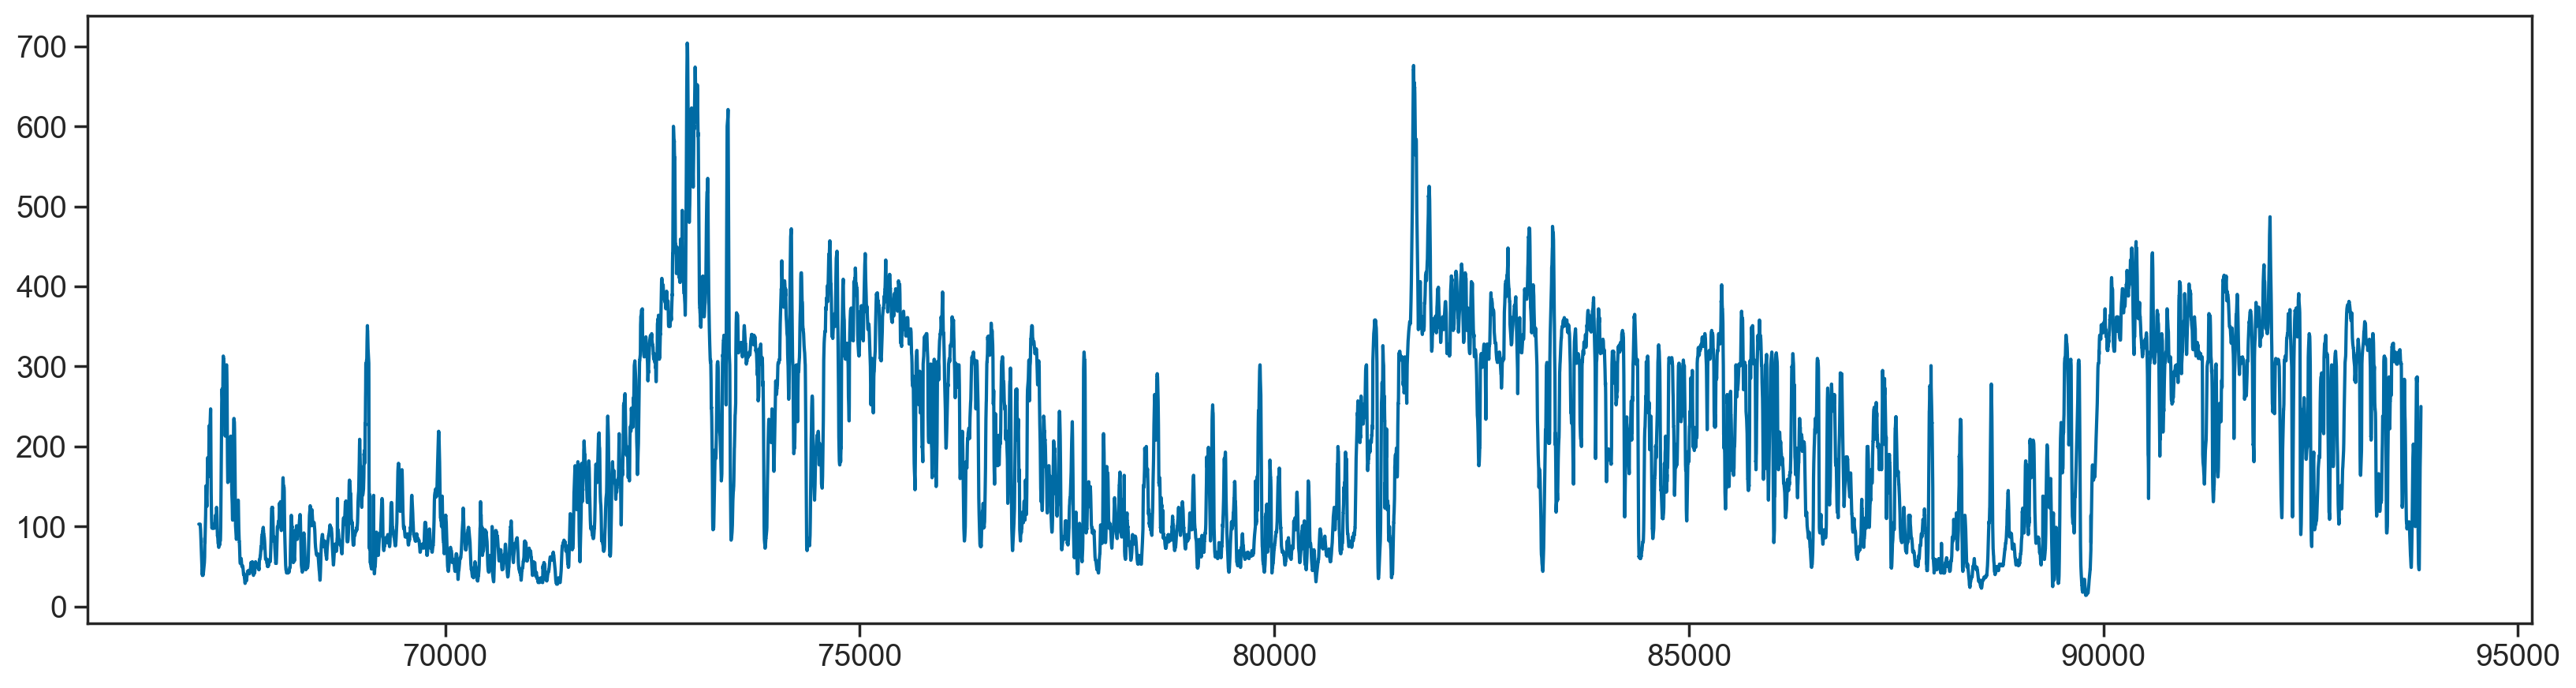

In [135]:
# Visualize AQI
plt.figure(figsize=(20, 5))
plt.plot(df_sector_51_data['AQI_calculated'])

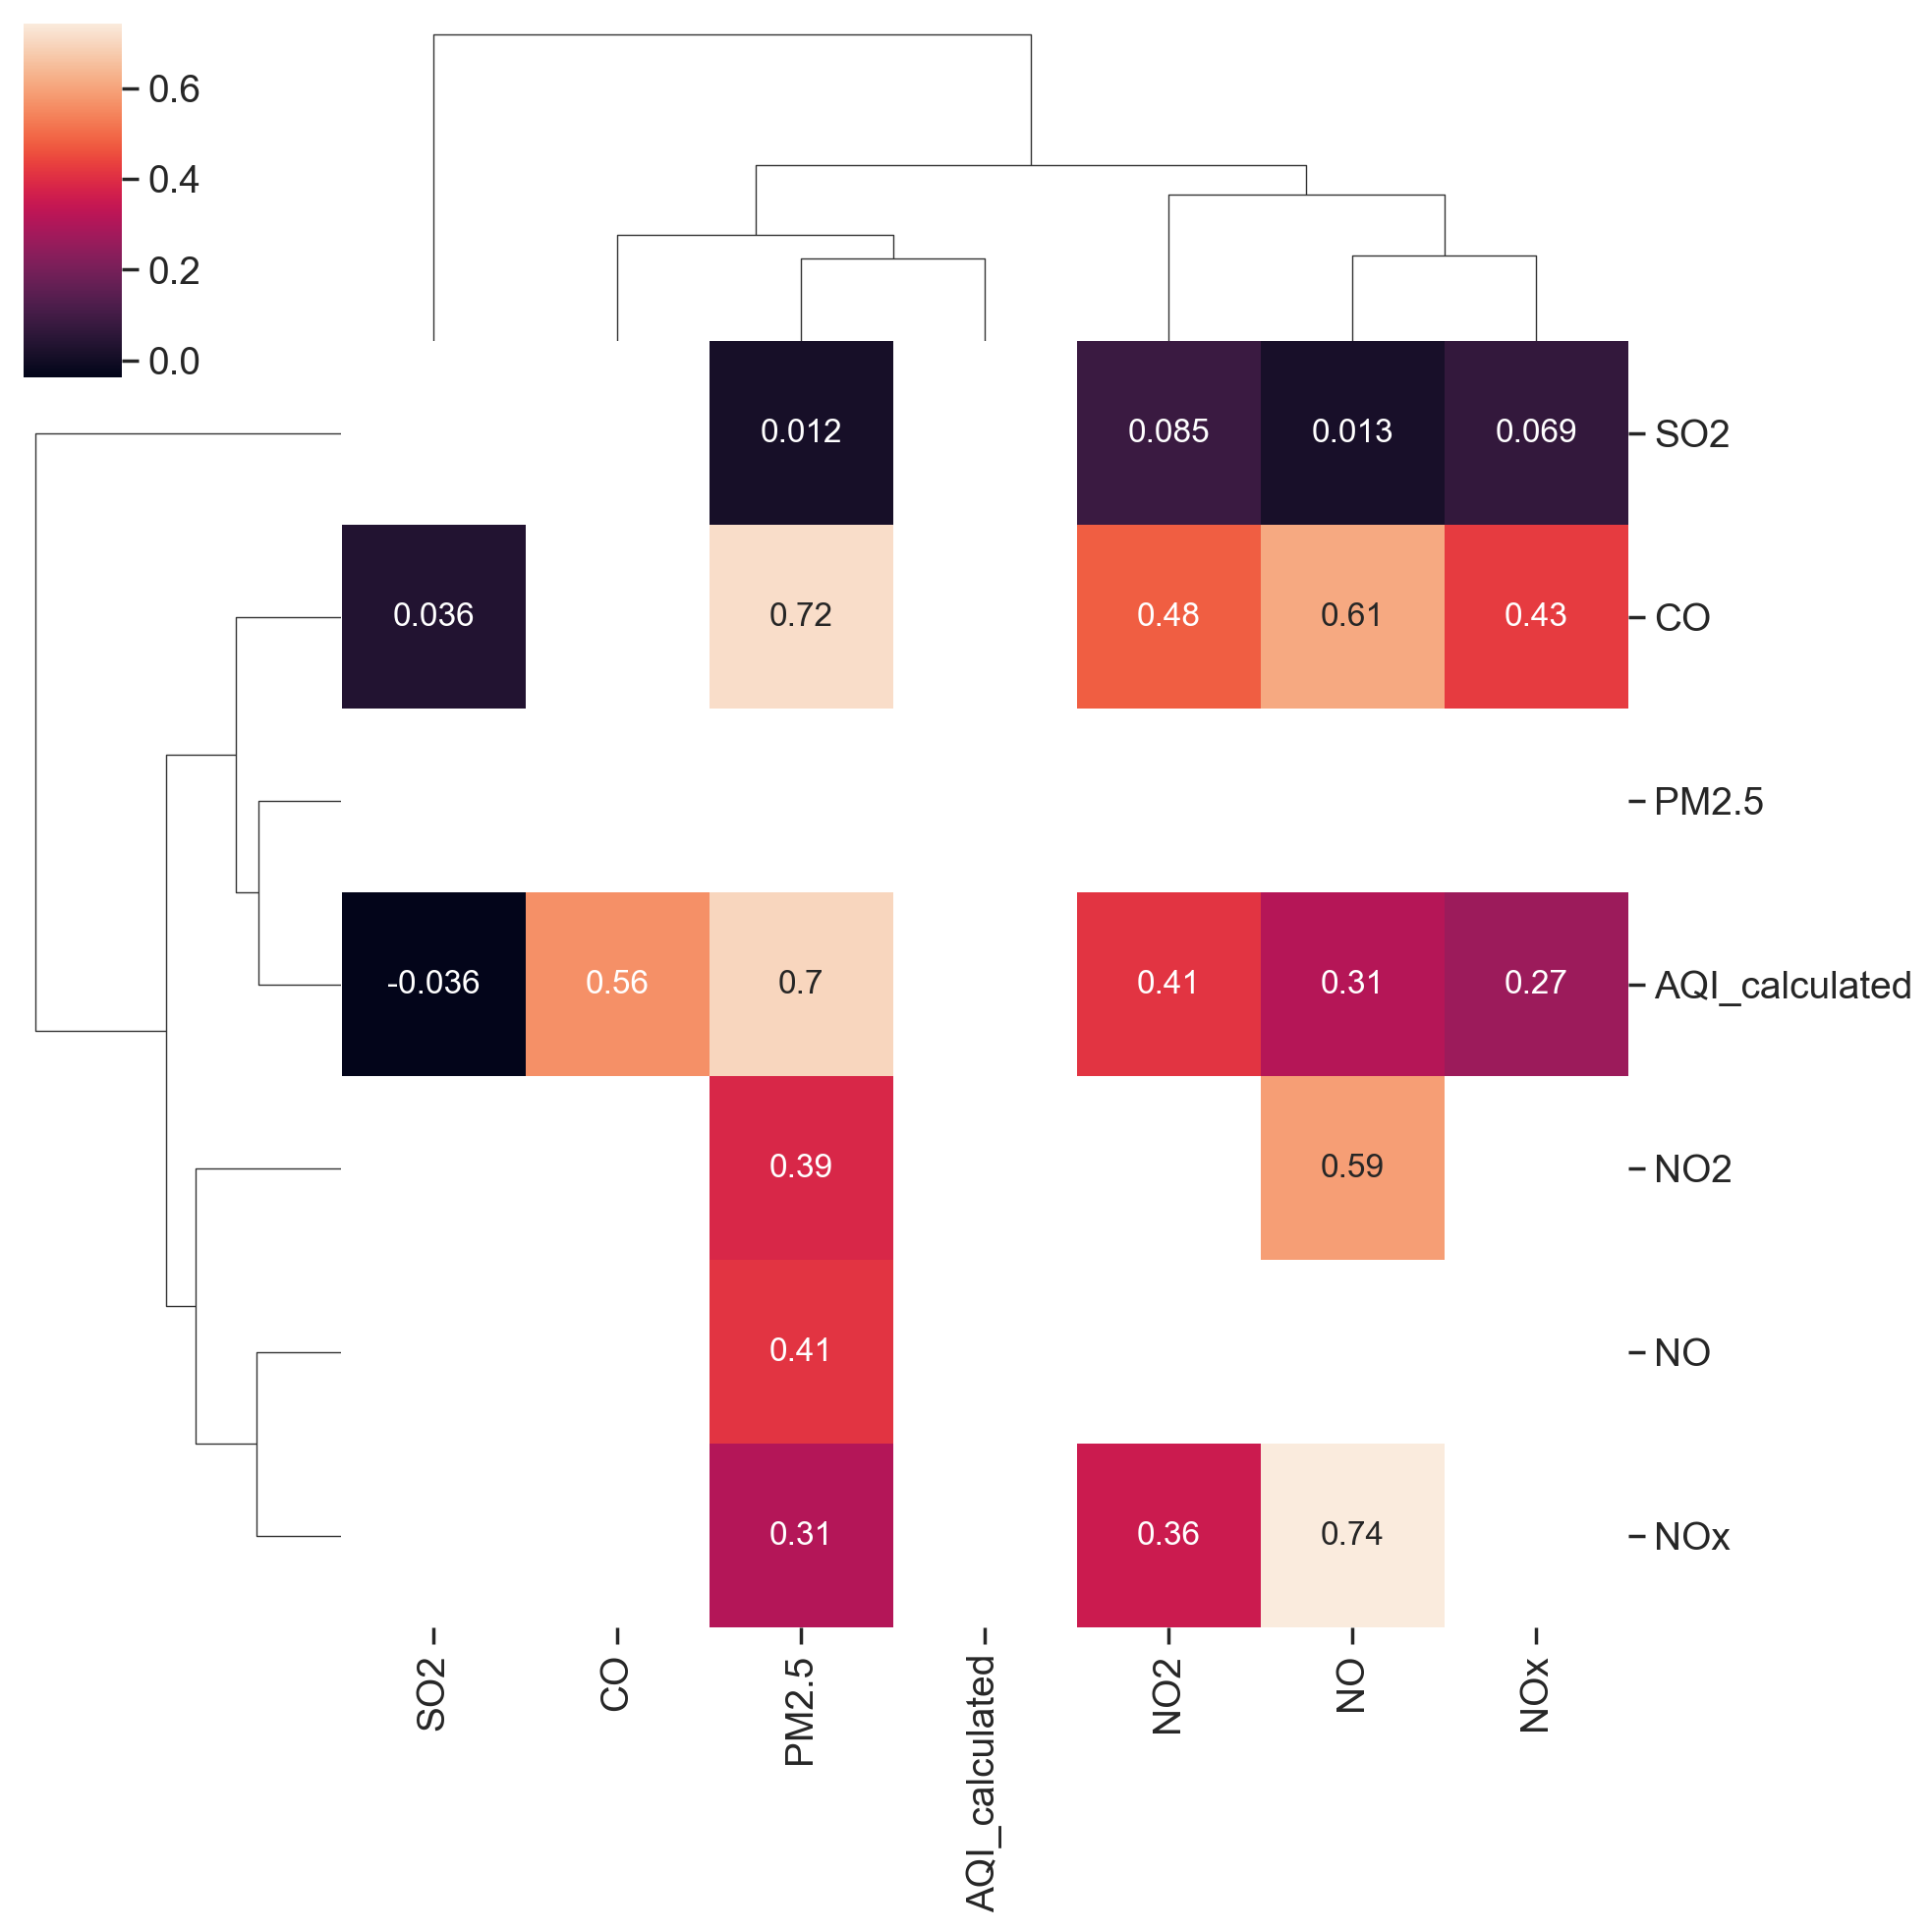

In [136]:
cols = ['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO", 'AQI_calculated']

sns.clustermap(df_sector_51_data[cols].corr(), annot = True, mask = np.triu(df_sector_51_data[cols].corr()))

<AxesSubplot: >

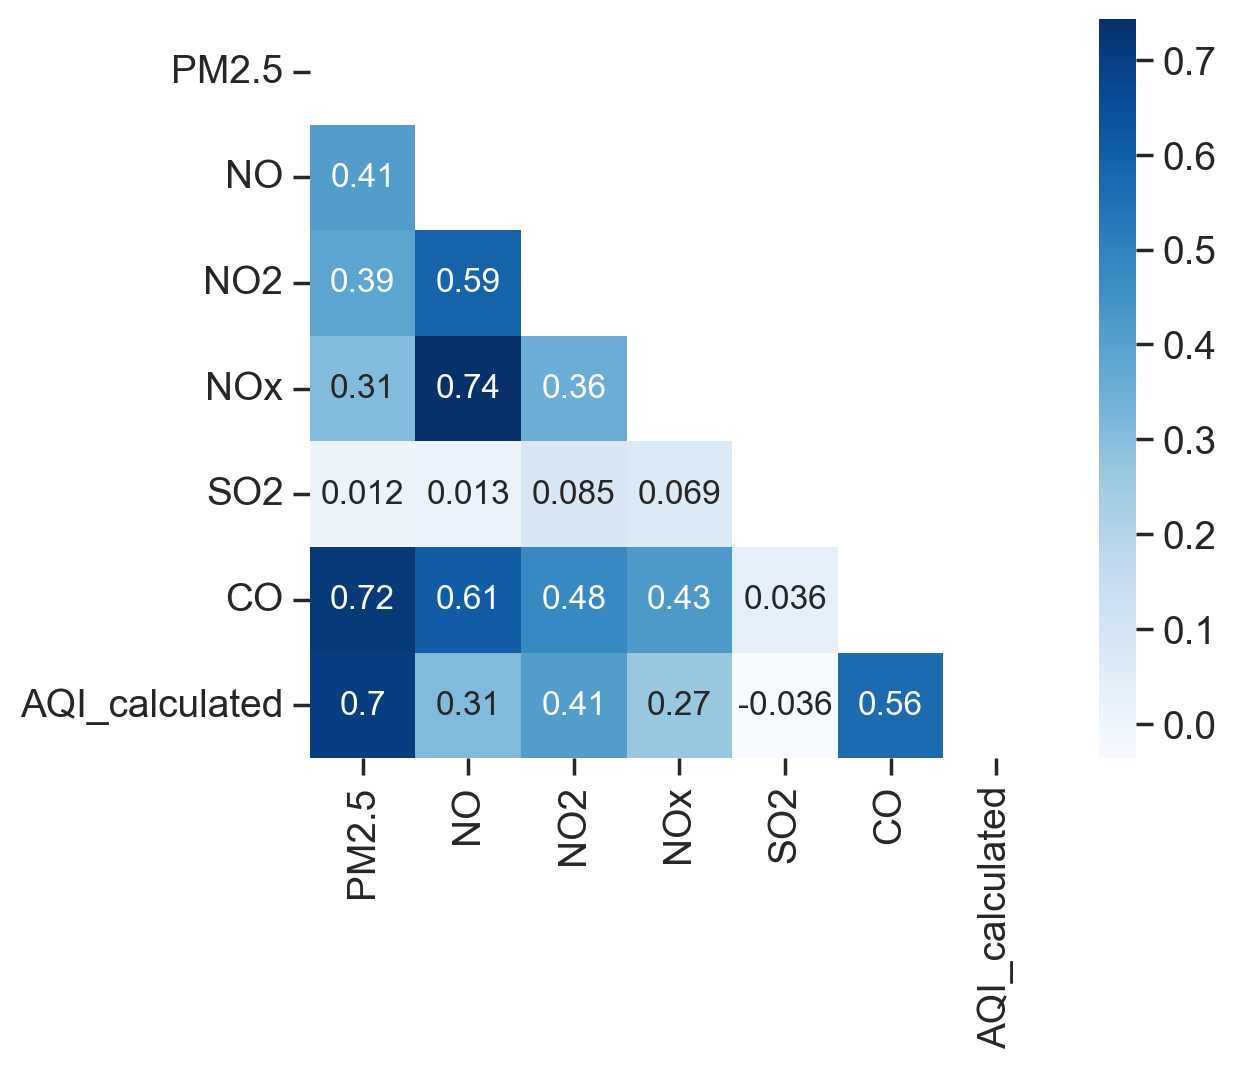

In [137]:
cols = ['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO", 'AQI_calculated']
sns.heatmap(df_sector_51_data[cols].corr(),
            square=True,
            annot=True,
            cmap="Blues",
            mask=np.triu(df_sector_51_data[cols].corr()))

<AxesSubplot: >

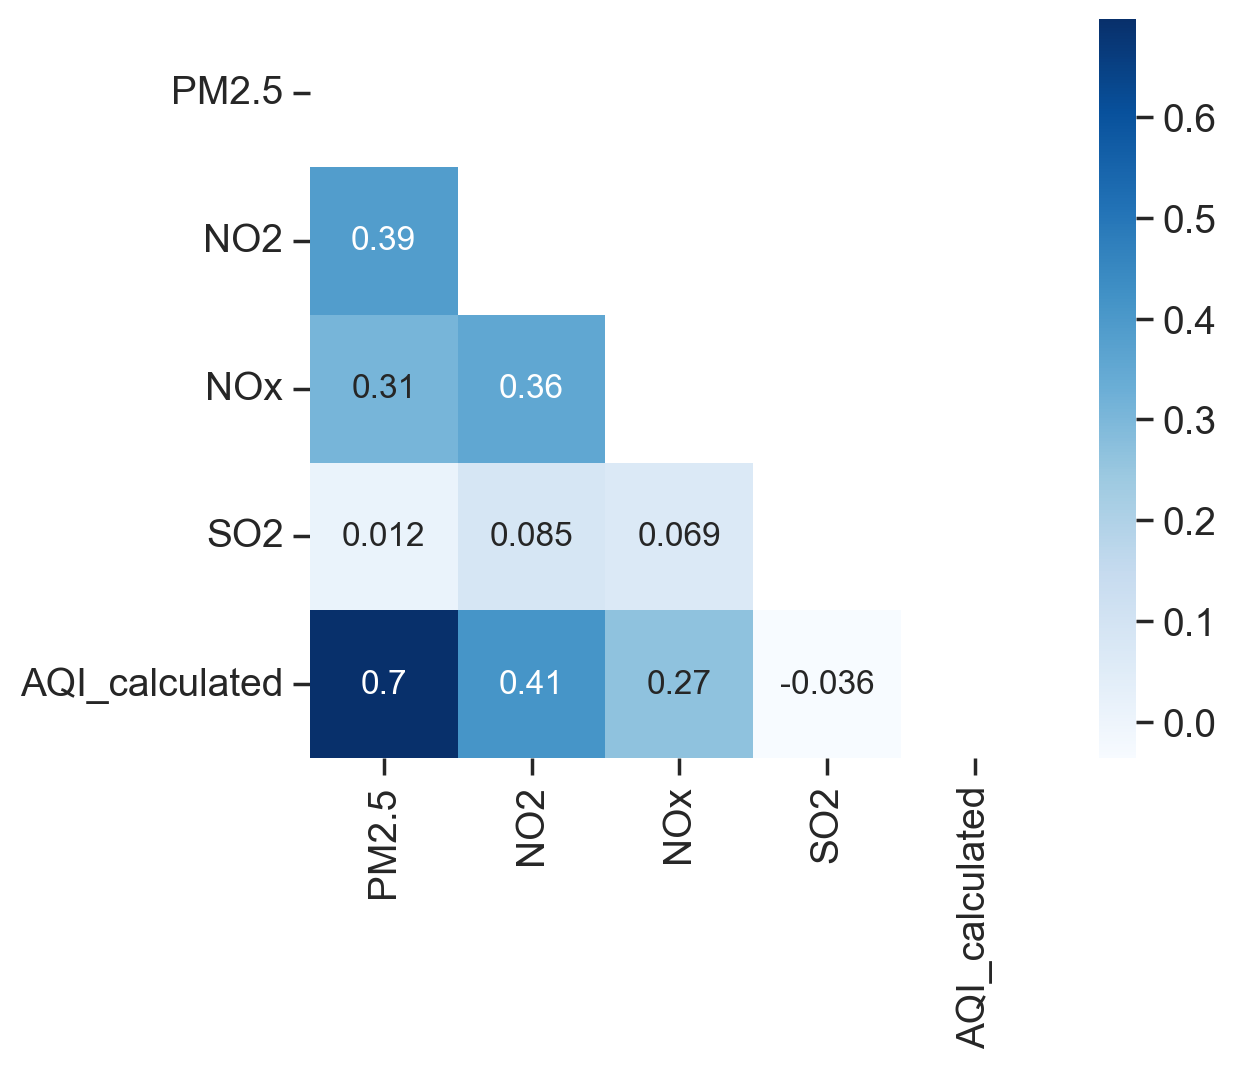

In [138]:
# Remove No & CO 
cols = ['PM2.5', 'NO2', 'NOx', "SO2", 'AQI_calculated']
sns.heatmap(df_sector_51_data[cols].corr(),
            square=True,
            annot=True,
            cmap="Blues",
            mask=np.triu(df_sector_51_data[cols].corr()))

In [139]:
cols = ['PM2.5', 'NO2', 'NOx', "SO2"]
X_train, X_test, y_train, y_test = train_test_split(df_sector_51_data[cols] ,
                                                    df_sector_51_data['AQI_calculated'],
                                                    train_size=0.8)
X_train
X_test
y_train
y_test

PM2.5    NO2    NOx    SO2
81539   89.82   7.81   9.56   2.43
67209   69.26  27.55  32.25  20.94
81752  195.20  12.05   5.94   6.95
80670   36.38   7.53  16.04   2.80
85832  223.36  18.10   9.73  14.20
...       ...    ...    ...    ...
80045   72.69   3.62   7.75   2.98
84446   32.86  18.59   4.99   2.06
72791  435.55  12.73  17.74   2.60
85654  115.36  57.15  33.84  30.85
83533  145.04  23.97   9.30   0.58

[21441 rows x 4 columns]

PM2.5    NO2    NOx    SO2
88723   38.30  10.91   7.83   4.48
86857   53.01  16.95  17.18   1.69
78925   44.97   5.94   7.78   2.55
72151  136.39   2.89   2.41   2.52
90545  290.12  37.24  43.00   0.49
...       ...    ...    ...    ...
85484  123.34  40.52  25.46  25.90
86845   79.23  16.80   8.72   2.57
86519  101.15  45.88  36.85   3.20
74294  136.34  17.13  29.91   1.30
77942   30.16   9.46  11.93   2.05

[5361 rows x 4 columns]

81539    312.0
67209    103.0
81752    392.0
80670     59.0
85832    339.0
         ...  
80045    155.0
84446     81.0
72791    422.0
85654    308.0
83533    350.0
Name: AQI_calculated, Length: 21441, dtype: float64

88723     45.0
86857    201.0
78925     73.0
72151    252.0
90545    153.0
         ...  
85484    157.0
86845    281.0
86519    221.0
74294    417.0
77942    211.0
Name: AQI_calculated, Length: 5361, dtype: float64

LinearRegression()


LinearRegression()

y_pred  y_test
88723  139.730611    45.0
86857  162.414862   201.0
78925  140.772323    73.0
72151  210.941894   252.0
90545  383.834737   153.0
...           ...     ...
85484  228.485515   157.0
86845  181.920339   281.0
86519  237.517718   221.0
74294  232.162125   417.0
77942  133.857937   211.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.6983544472460497


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'LinearRegression()')

score(X_test, y_test)  0.48731833524017143
MAPE is 55.85
MAE is 72.15
MSE is 7766.09
r2_score 0.48731833524017143



DecisionTreeRegressor()


DecisionTreeRegressor()

y_pred  y_test
88723    83.0    45.0
86857   196.0   201.0
78925    54.0    73.0
72151   292.0   252.0
90545   340.0   153.0
...       ...     ...
85484   281.0   157.0
86845   168.0   281.0
86519   369.0   221.0
74294   235.0   417.0
77942    53.0   211.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.7417579415996394


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'DecisionTreeRegressor()')

score(X_test, y_test)  0.4893032831061995
MAPE is 39.18
MAE is 58.2
MSE is 7736.03
r2_score 0.4893032831061995



RandomForestRegressor()


RandomForestRegressor()

y_pred  y_test
88723   64.46    45.0
86857  144.54   201.0
78925   70.98    73.0
72151  246.02   252.0
90545  319.67   153.0
...       ...     ...
85484  225.20   157.0
86845  182.59   281.0
86519  313.74   221.0
74294  309.32   417.0
77942   68.27   211.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.8530881182784349


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'RandomForestRegressor()')

score(X_test, y_test)  0.7276743456505539
MAPE is 31.95
MAE is 45.97
MSE is 4125.18
r2_score 0.7276743456505539



AdaBoostRegressor()


AdaBoostRegressor()

y_pred  y_test
88723  160.274390    45.0
86857  202.451523   201.0
78925  160.274390    73.0
72151  283.094791   252.0
90545  364.577211   153.0
...           ...     ...
85484  263.879931   157.0
86845  202.451523   281.0
86519  264.105497   221.0
74294  305.897516   417.0
77942  157.631943   211.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.77076877402579


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'AdaBoostRegressor()')

score(X_test, y_test)  0.506446712135389
MAPE is 71.03
MAE is 74.1
MSE is 7476.34
r2_score 0.506446712135389



BaggingRegressor()


BaggingRegressor()

y_pred  y_test
88723    84.0    45.0
86857   145.1   201.0
78925    68.6    73.0
72151   241.9   252.0
90545   348.9   153.0
...       ...     ...
85484   195.1   157.0
86845   198.1   281.0
86519   346.1   221.0
74294   297.7   417.0
77942    75.1   211.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.8388787073222461


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'BaggingRegressor()')

score(X_test, y_test)  0.702744080742189
MAPE is 33.41
MAE is 47.97
MSE is 4502.83
r2_score 0.702744080742189





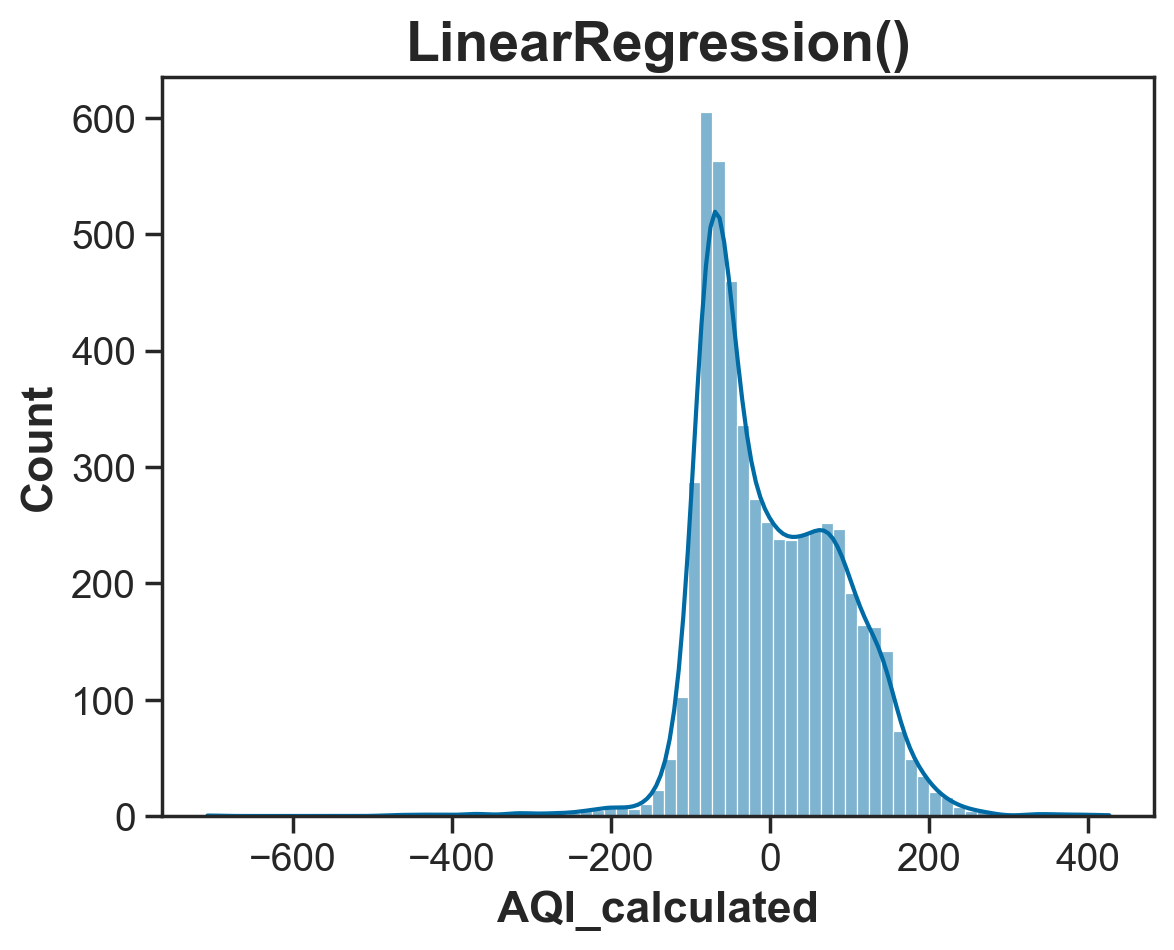

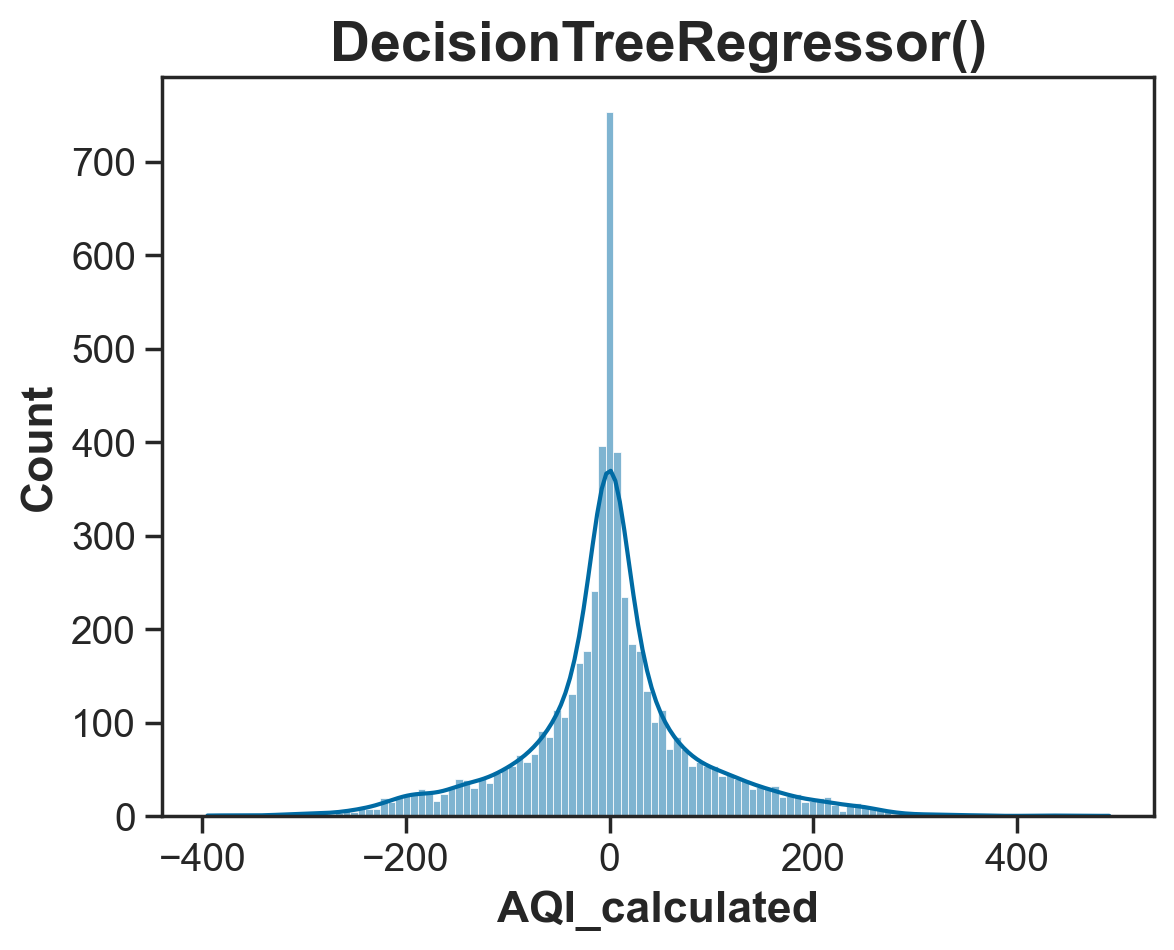

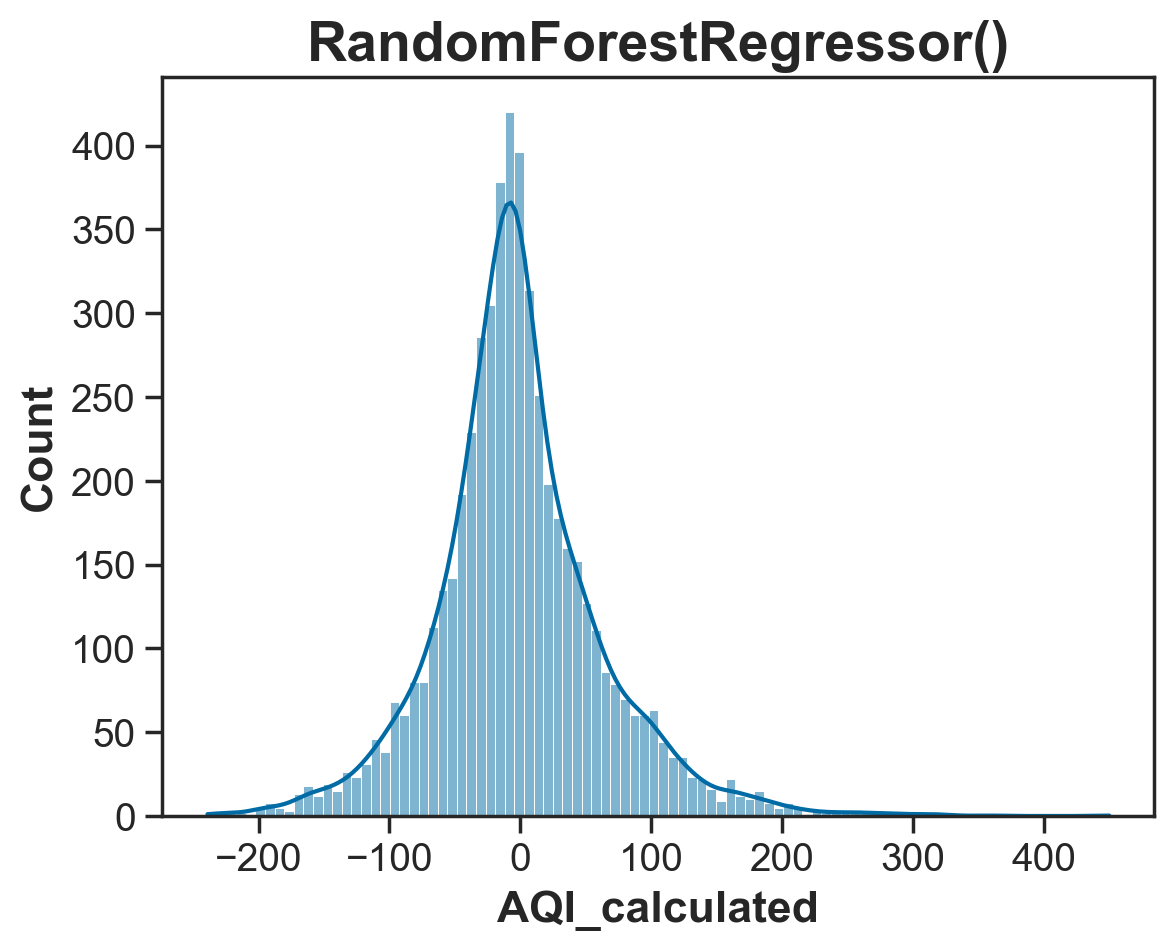

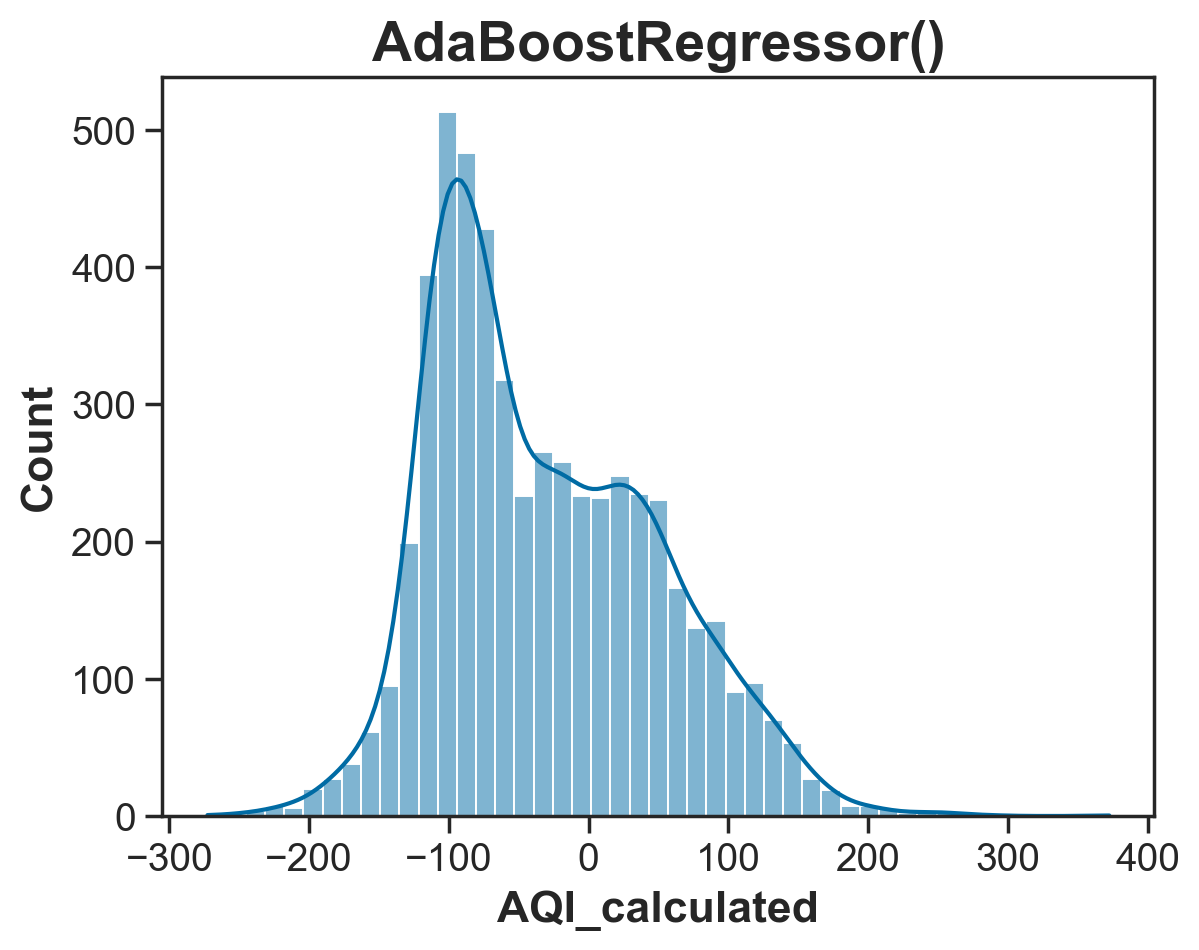

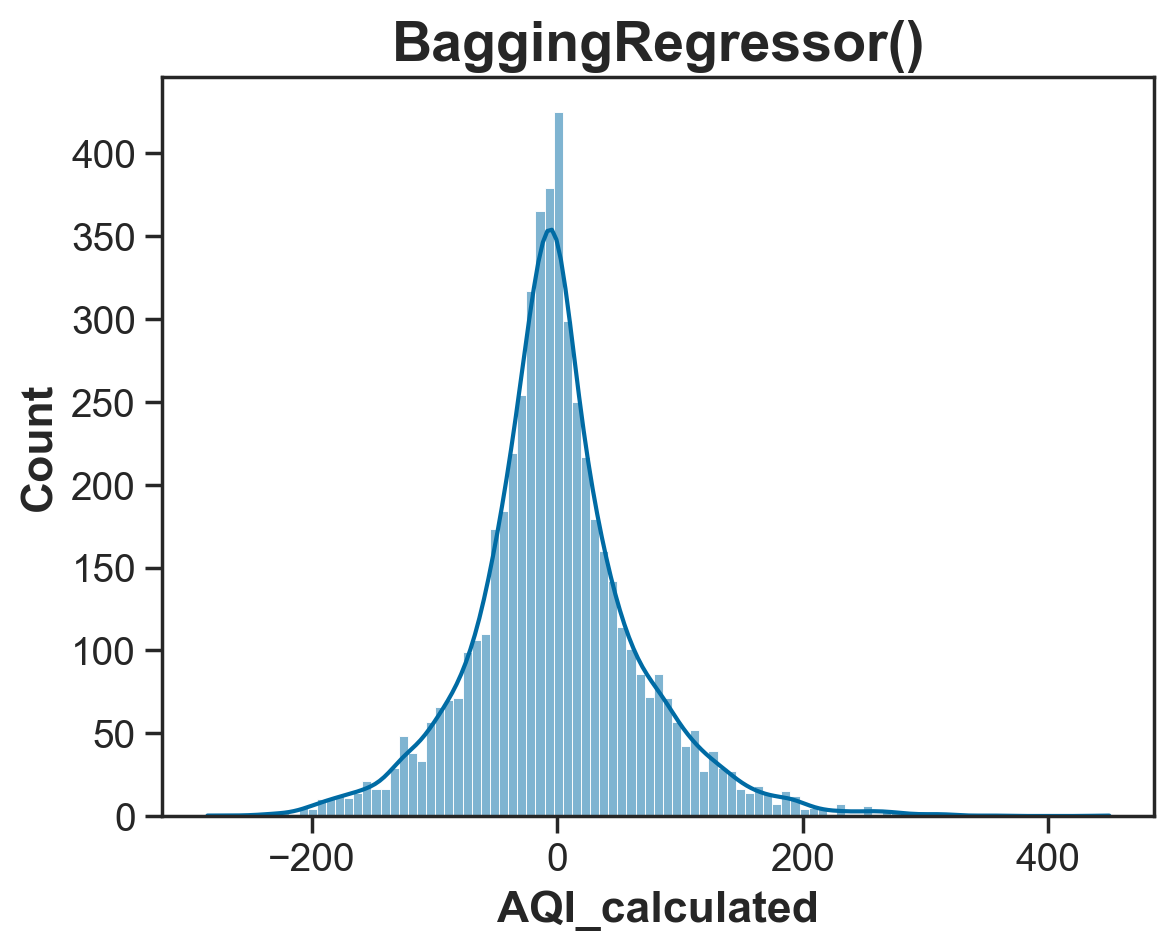

In [140]:
lr = LinearRegression()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()

for i in [lr, d_tree, rf, ab, br]:
    model = i
    print(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_actual = pd.DataFrame({'y_pred': y_pred, "y_test": y_test})
    predicted_actual
    print("Correlation b/w actual and predicted",
          predicted_actual['y_pred'].corr(predicted_actual['y_test']))
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))

#     s = cross_val_score(estimator=model,
#                         X=df[['PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO']],
#                         y=df['AQI_calculated'],
#                         scoring='r2',
#                         cv=5)
#     print("\nCV scores", s)
#     print("\nAverage cv score ", np.mean(s))
    print(f"MAPE is {round(mean_absolute_percentage_error(y_test , y_pred) * 100, 2)}")
    print(f"MAE is {round(mean_absolute_error(y_test , y_pred), 2)}")
    print(f"MSE is {round(mean_squared_error(y_test , y_pred), 2)}")
    print(f"r2_score {r2_score(y_test, y_pred)}")
    print("\n\n")

#### Vikas Sadan

PM2.5      NO     NO2    NOx   SO2    CO
69150   47.74    3.69   23.43   0.00  7.13  0.57
80279   58.95    3.35    1.89   1.55  1.96  0.61
84376   77.38   33.48   48.38  21.77  1.50  0.61
68837  128.12    6.33   27.09  19.23  8.54  1.38
73790   97.71    4.34   14.35  22.33  1.43  0.89
...       ...     ...     ...    ...   ...   ...
84226   70.00   22.95   41.01  12.67  1.19  0.57
69419   83.18    1.15   10.92   3.94  5.53  0.72
81924  154.50    3.75   14.26   8.01  3.71  0.83
74089  238.07  280.17  211.37   0.01  3.29  5.94
69058  241.10    1.44   13.90   6.86  5.12  0.52

[21441 rows x 6 columns]

PM2.5     NO    NO2    NOx    SO2    CO
86772   55.69   4.81  22.85  13.08   1.47  0.27
73249   95.23  18.96  21.62  13.82   2.29  1.78
88465   32.82  10.99   7.14  10.95   3.58  0.52
73932   92.09   3.28   9.76  15.21   0.50  0.45
67962   35.03   0.97  16.64   9.46  13.67  0.65
...       ...    ...    ...    ...    ...   ...
69728   55.23   1.49  10.02   0.00   4.80  0.54
83718  191.09  18.20  22.52   8.98   5.01  1.38
82415  171.97  15.74  26.83   5.97   2.37  2.66
88508   13.00   4.78   7.01   5.89   4.27  0.31
82475   85.90  16.31  25.34   5.91   1.15  0.71

[5361 rows x 6 columns]

69150     49.0
80279    129.0
84376    309.0
68837    116.0
73790    320.0
         ...  
84226    112.0
69419    121.0
81924    356.0
74089    405.0
69058    336.0
Name: AQI_calculated, Length: 21441, dtype: float64

86772    176.0
73249    170.0
88465     46.0
73932    209.0
67962     54.0
         ...  
69728     78.0
83718    313.0
82415    312.0
88508     32.0
82475    192.0
Name: AQI_calculated, Length: 5361, dtype: float64

<Figure size 2000x500 with 0 Axes>

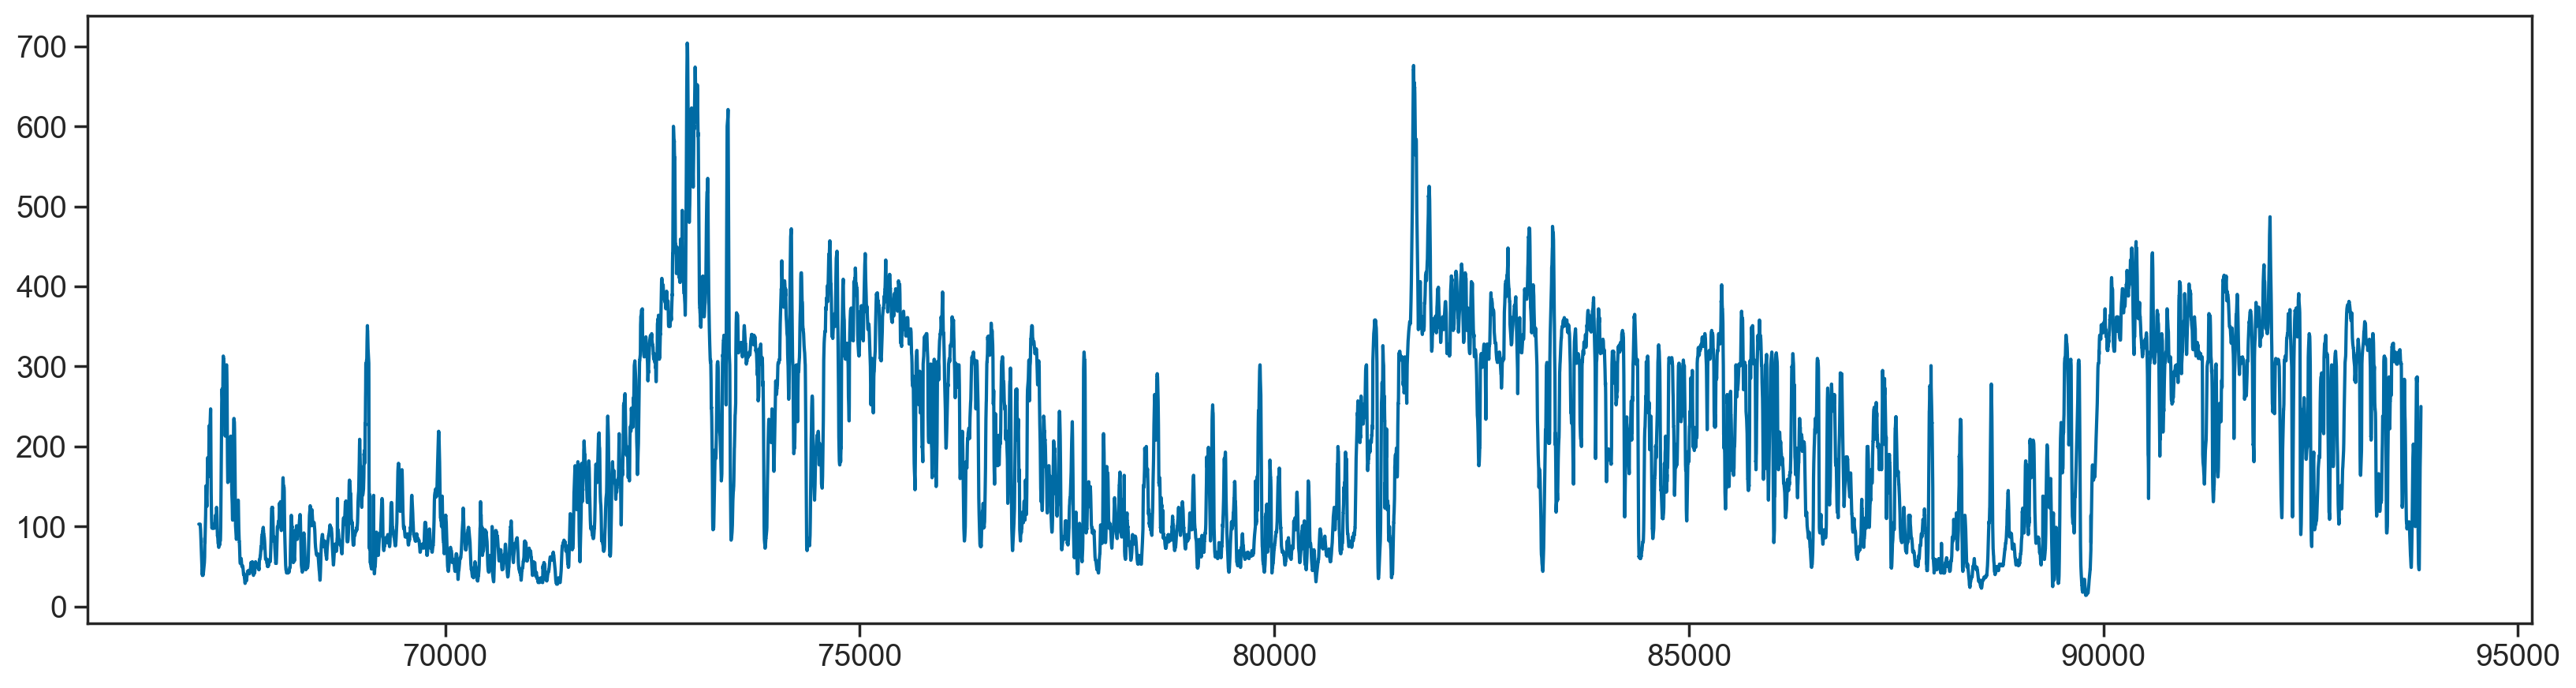

In [141]:
df_vikas_sadan_data = df[df['Station_Sector 51'] == 1]
X_train, X_test, y_train, y_test = train_test_split(df_vikas_sadan_data[['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]] ,
                                                    df_vikas_sadan_data['AQI_calculated'],
                                                    train_size=0.8)
X_train
X_test
y_train
y_test

# Visualize AQI
plt.figure(figsize=(20, 5))
plt.plot(df_vikas_sadan_data['AQI_calculated'])

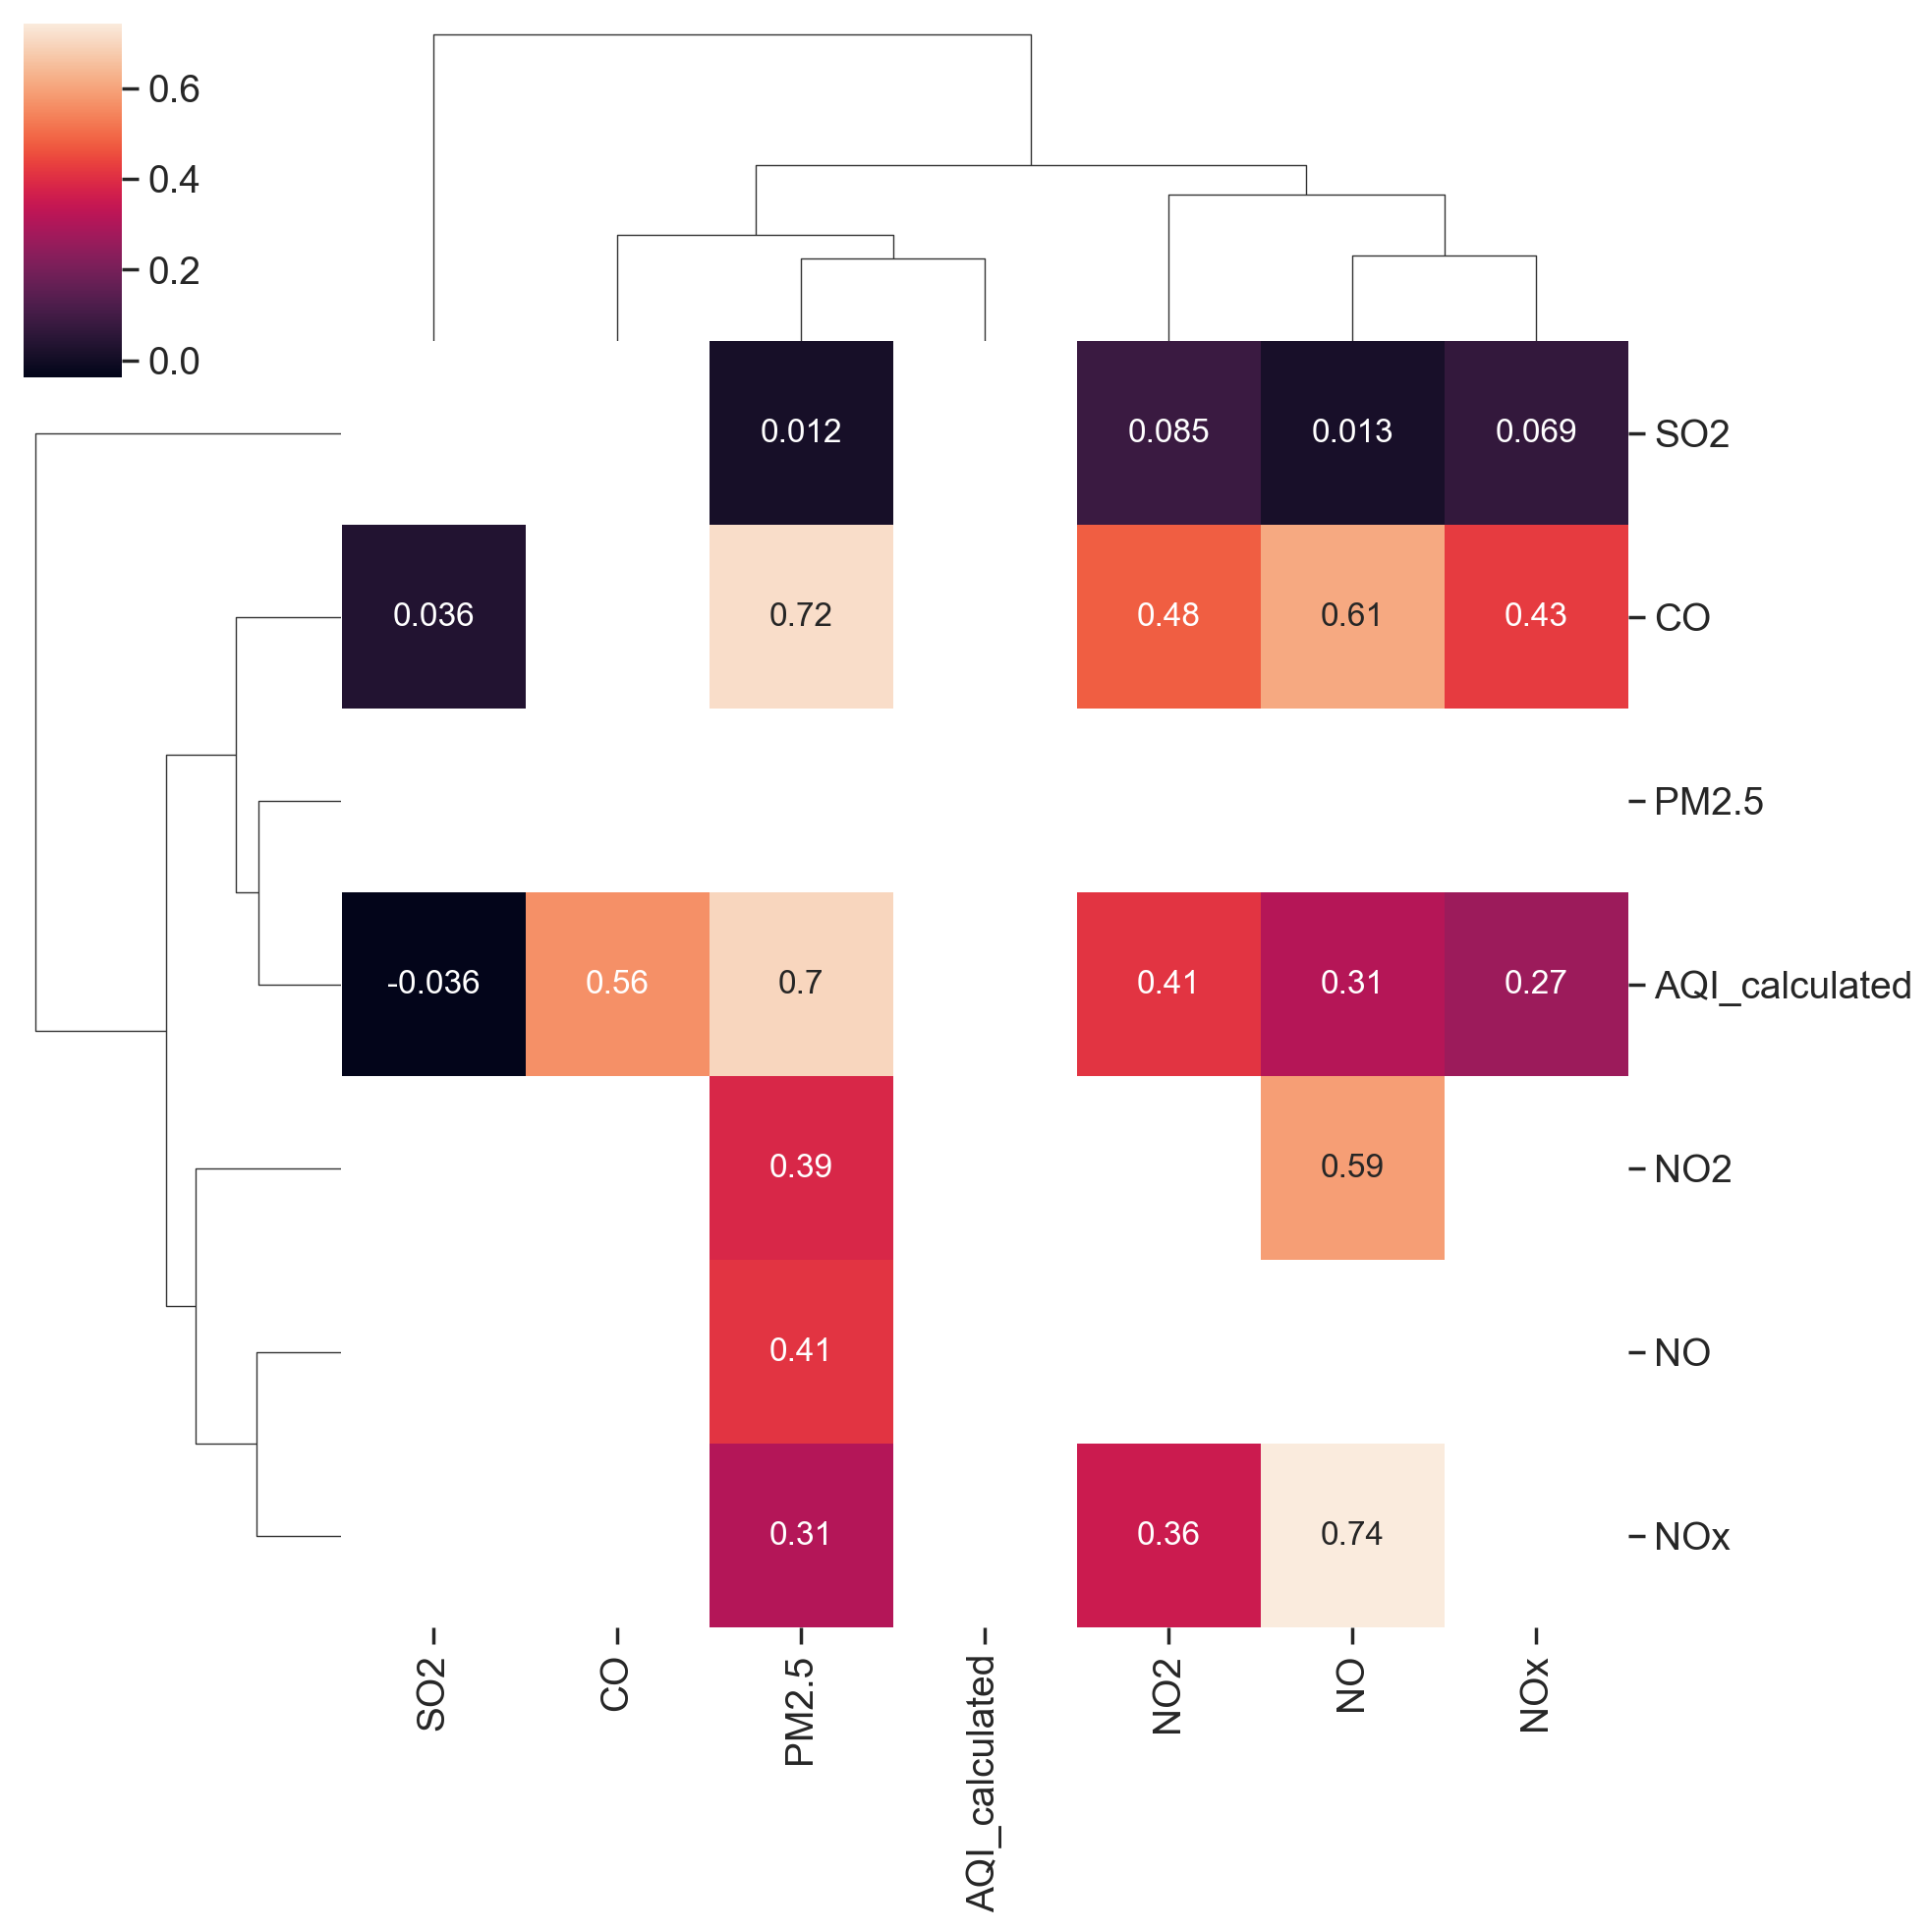

In [52]:
cols = ['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO", 'AQI_calculated']

# sns.heatmap(df_vikas_sadan_data[].corr())

sns.clustermap(df_vikas_sadan_data[cols].corr(), annot = True, mask = np.triu(df_vikas_sadan_data[cols].corr()))

LinearRegression()


LinearRegression()

y_pred  y_test
86772  171.669261   176.0
73249  215.516378   170.0
88465  125.523967    46.0
73932  185.849411   209.0
67962  142.851648    54.0
...           ...     ...
69728  147.386037    78.0
83718  272.758308   313.0
82415  295.842836   312.0
88508  108.429278    32.0
82475  190.185825   192.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.7209005954291503


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'LinearRegression()')

score(X_test, y_test)  0.5195018869547904
MAPE is 54.29
MAE is 69.44
MSE is 7254.9
r2_score 0.5195018869547904



DecisionTreeRegressor()


DecisionTreeRegressor()

y_pred  y_test
86772   101.0   176.0
73249   174.0   170.0
88465    56.0    46.0
73932   307.0   209.0
67962    90.0    54.0
...       ...     ...
69728    78.0    78.0
83718   344.0   313.0
82415   317.0   312.0
88508    60.0    32.0
82475   326.0   192.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.7959285240449675


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'DecisionTreeRegressor()')

score(X_test, y_test)  0.5947463655263995
MAPE is 33.01
MAE is 50.25
MSE is 6118.81
r2_score 0.5947463655263995



RandomForestRegressor()


RandomForestRegressor()

y_pred  y_test
86772  163.14   176.0
73249  236.17   170.0
88465   49.78    46.0
73932  251.29   209.0
67962   88.72    54.0
...       ...     ...
69728   79.89    78.0
83718  326.62   313.0
82415  310.14   312.0
88508   56.43    32.0
82475  285.52   192.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.8924084511452496


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'RandomForestRegressor()')

score(X_test, y_test)  0.7958691565974734
MAPE is 27.1
MAE is 39.5
MSE is 3082.11
r2_score 0.7958691565974734



AdaBoostRegressor()


AdaBoostRegressor()

y_pred  y_test
86772  200.060038   176.0
73249  258.089219   170.0
88465  157.272167    46.0
73932  236.874070   209.0
67962  164.727362    54.0
...           ...     ...
69728  200.854808    78.0
83718  331.755385   313.0
82415  329.644677   312.0
88508  159.371539    32.0
82475  219.319788   192.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.7605543026409213


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'AdaBoostRegressor()')

score(X_test, y_test)  0.49003402366217264
MAPE is 74.85
MAE is 76.22
MSE is 7699.83
r2_score 0.49003402366217264



BaggingRegressor()


BaggingRegressor()

y_pred  y_test
86772   166.7   176.0
73249   232.8   170.0
88465    46.7    46.0
73932   242.9   209.0
67962    90.6    54.0
...       ...     ...
69728    78.3    78.0
83718   323.7   313.0
82415   315.6   312.0
88508    49.8    32.0
82475   296.2   192.0

[5361 rows x 2 columns]

Correlation b/w actual and predicted 0.8824166820517025


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'BaggingRegressor()')

score(X_test, y_test)  0.7786405955587673
MAPE is 28.2
MAE is 41.26
MSE is 3342.24
r2_score 0.7786405955587673





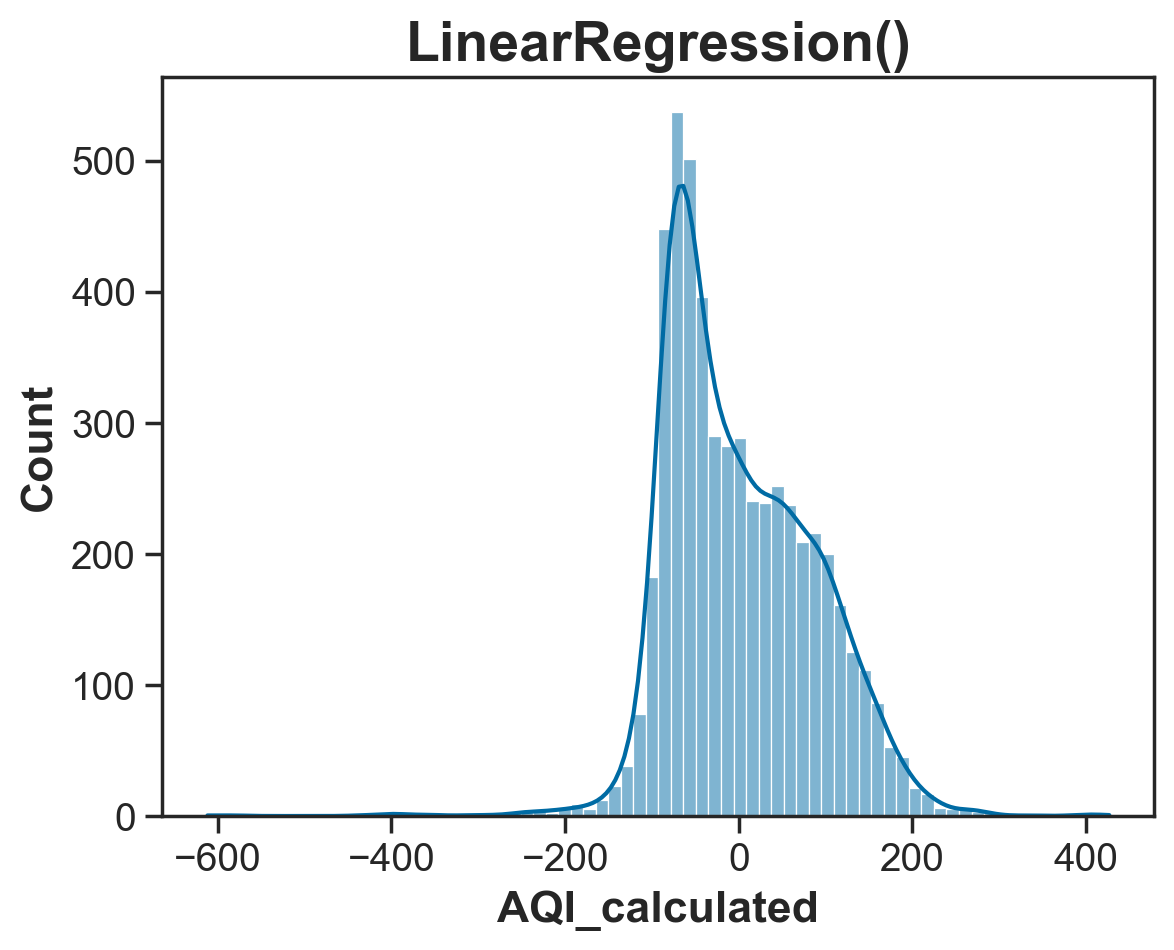

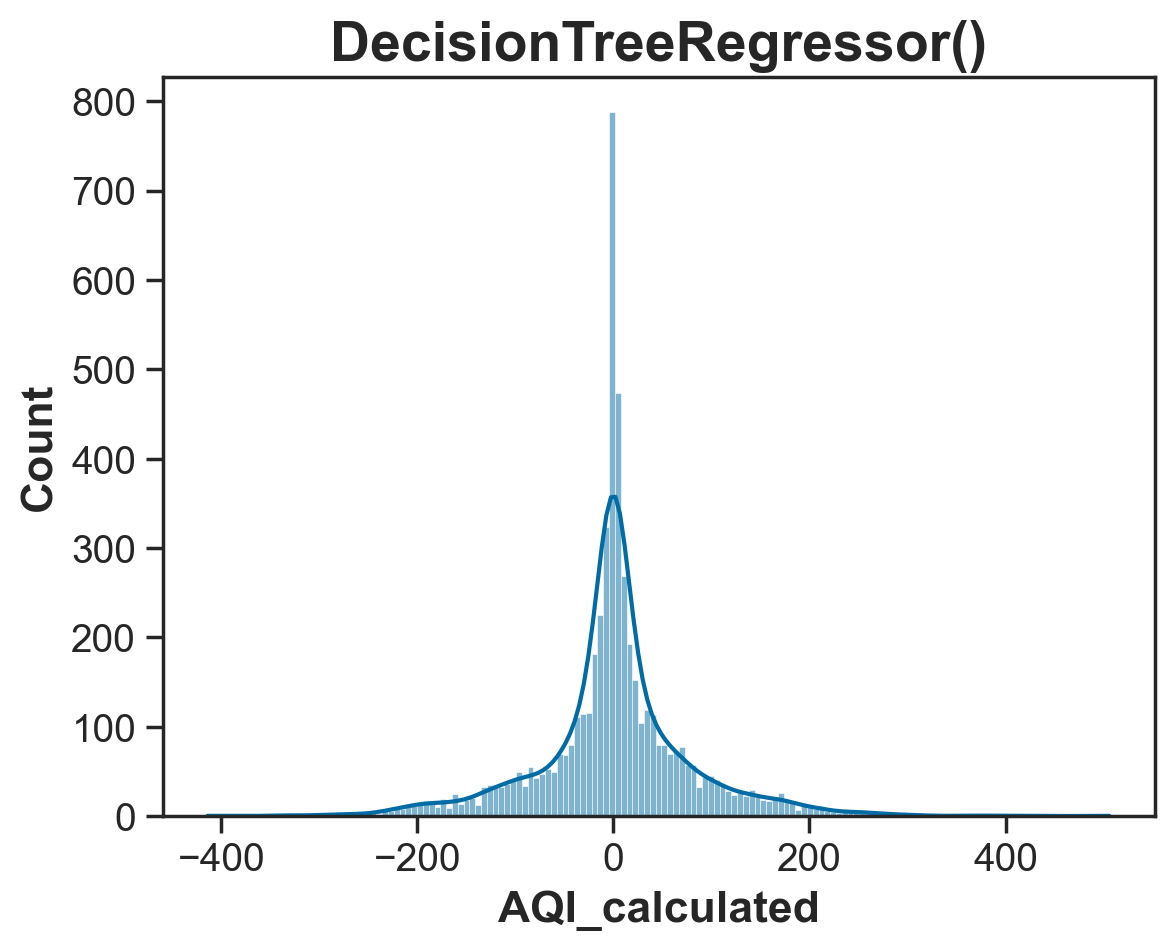

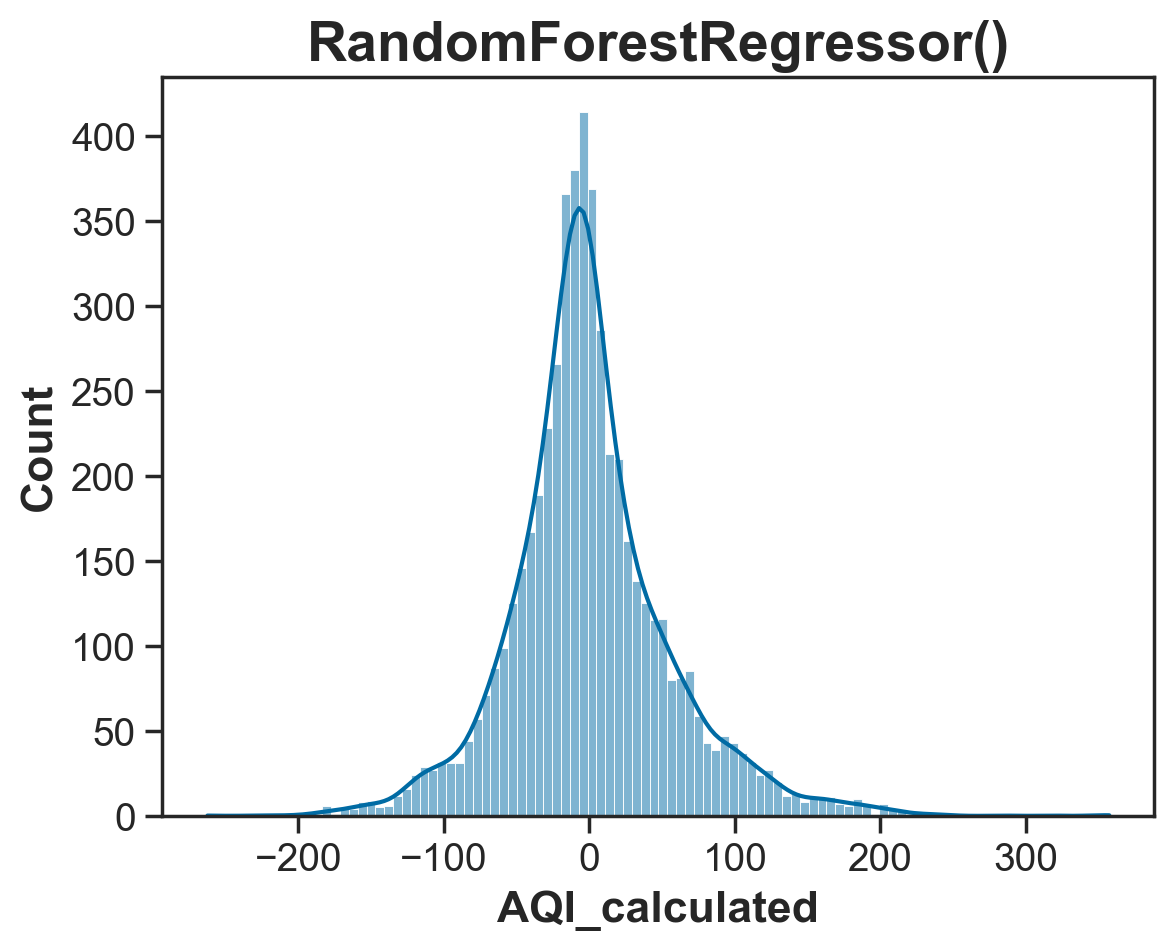

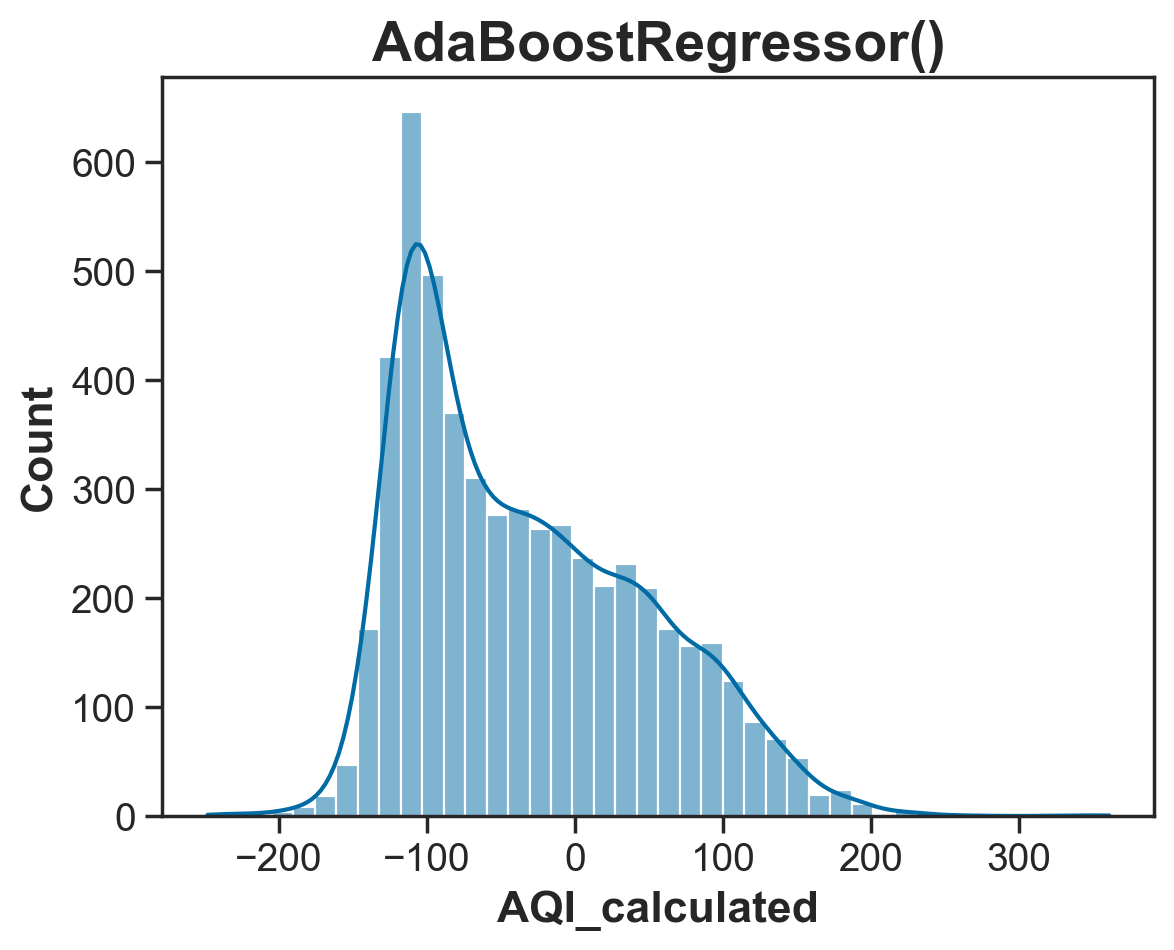

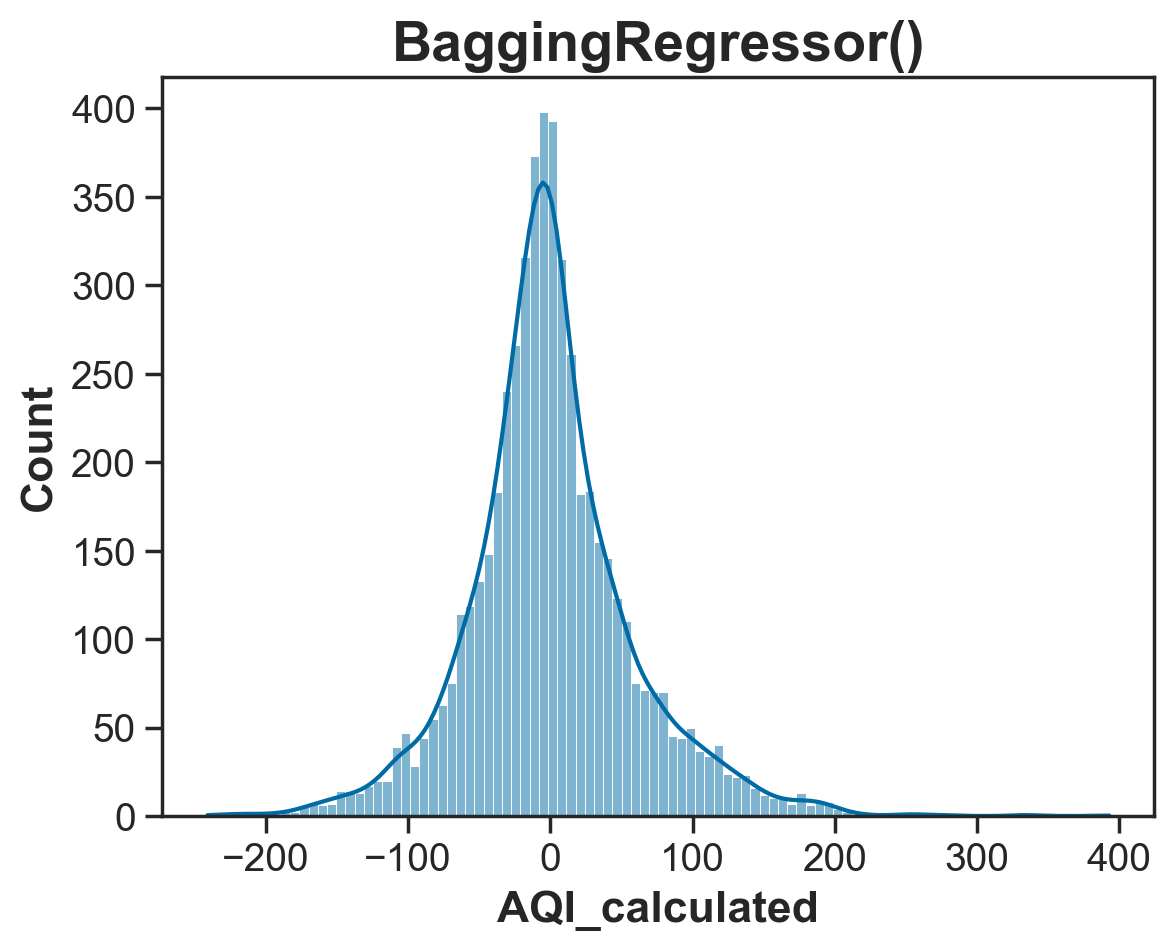

In [142]:
lr = LinearRegression()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()

for i in [lr, d_tree, rf, ab, br]:
    model = i
    print(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_actual = pd.DataFrame({'y_pred': y_pred, "y_test": y_test})
    predicted_actual
    print("Correlation b/w actual and predicted",
          predicted_actual['y_pred'].corr(predicted_actual['y_test']))
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))

#     s = cross_val_score(estimator=model,
#                         X=df[['PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO']],
#                         y=df['AQI_calculated'],
#                         scoring='r2',
#                         cv=5)
#     print("\nCV scores", s)
#     print("\nAverage cv score ", np.mean(s))
    print(f"MAPE is {round(mean_absolute_percentage_error(y_test , y_pred) * 100, 2)}")
    print(f"MAE is {round(mean_absolute_error(y_test , y_pred), 2)}")
    print(f"MSE is {round(mean_squared_error(y_test , y_pred), 2)}")
    print(f"r2_score {r2_score(y_test, y_pred)}")
    print("\n\n")

#### NISE

In [143]:
df_nise_data = df[df['Station_NISE'] == 1]

<AxesSubplot: >

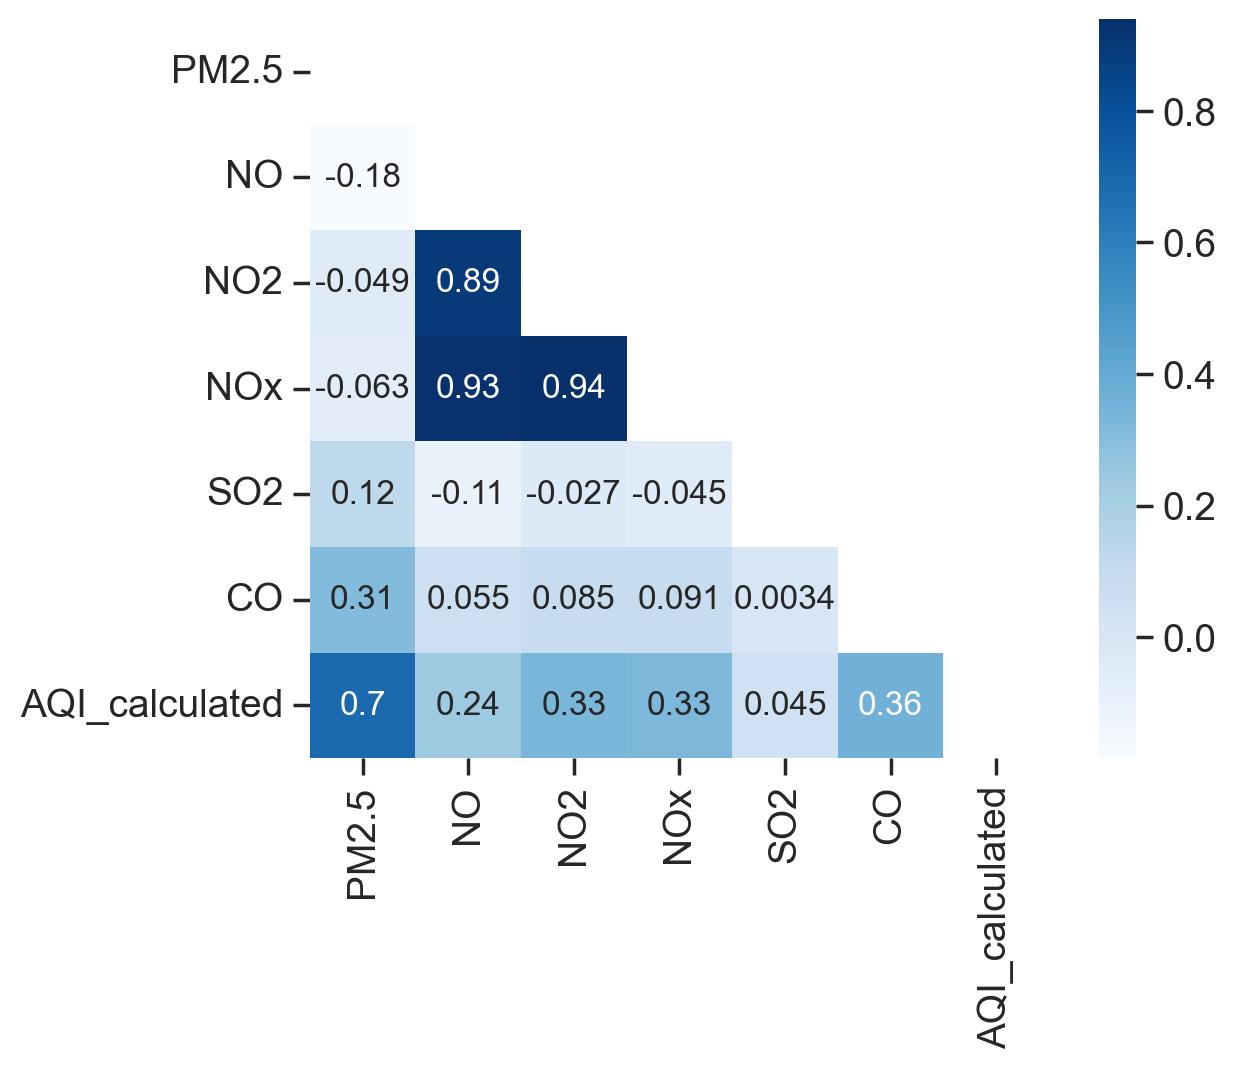

In [144]:
cols = ['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO", 'AQI_calculated']
sns.heatmap(df_nise_data[cols].corr(),
            square=True,
            annot=True,
            cmap="Blues",
            mask=np.triu(df_nise_data[cols].corr()))

PM2.5    NO2    NOx        SO2    CO
1903    83.34  11.49  14.38   8.630000  1.39
10461   22.39   6.25  11.07   4.906667  0.55
16708    6.00   8.51  14.54   2.206667  1.21
20499   44.39  22.24  27.64   2.640000  0.94
20357   13.17  25.45  31.17   4.426667  1.03
...       ...    ...    ...        ...   ...
24078  100.73  20.00  22.37  12.763333  0.50
26540   57.28  38.31  42.01  15.700000  0.61
3502    28.07  17.12  25.08  10.180000  0.56
3532    30.33  14.77  22.84   4.520000  0.46
19111   66.05  32.22  42.06   6.090000  0.60

[18753 rows x 5 columns]

PM2.5    NO2    NOx        SO2    CO
16090  176.36  38.40  57.01  11.426667  1.83
15369   48.50  14.06  21.55   1.486667  0.88
9800    25.61   7.59  13.86   7.903333  0.57
9059   107.58  16.29  21.81   6.100000  0.53
24321   73.78  31.88  36.84   2.156667  0.26
...       ...    ...    ...        ...   ...
20390   19.38  19.27  25.43   3.683333  0.91
13670   56.83  13.98  19.14   2.623333  0.45
10344   26.72   6.45  11.44   4.570000  0.20
11383    9.23  13.95  37.60   4.250000  0.47
5996   675.56  64.92  73.00   4.976667  5.09

[8038 rows x 5 columns]

1903     127.0
10461     41.0
16708     80.0
20499     79.0
20357     52.0
         ...  
24078    317.0
26540    118.0
3502      42.0
3532      39.0
19111    118.0
Name: AQI_calculated, Length: 18753, dtype: float64

16090    354.0
15369    160.0
9800      50.0
9059     196.0
24321    148.0
         ...  
20390     49.0
13670     43.0
10344     84.0
11383     47.0
5996     456.0
Name: AQI_calculated, Length: 8038, dtype: float64

<Figure size 2000x500 with 0 Axes>

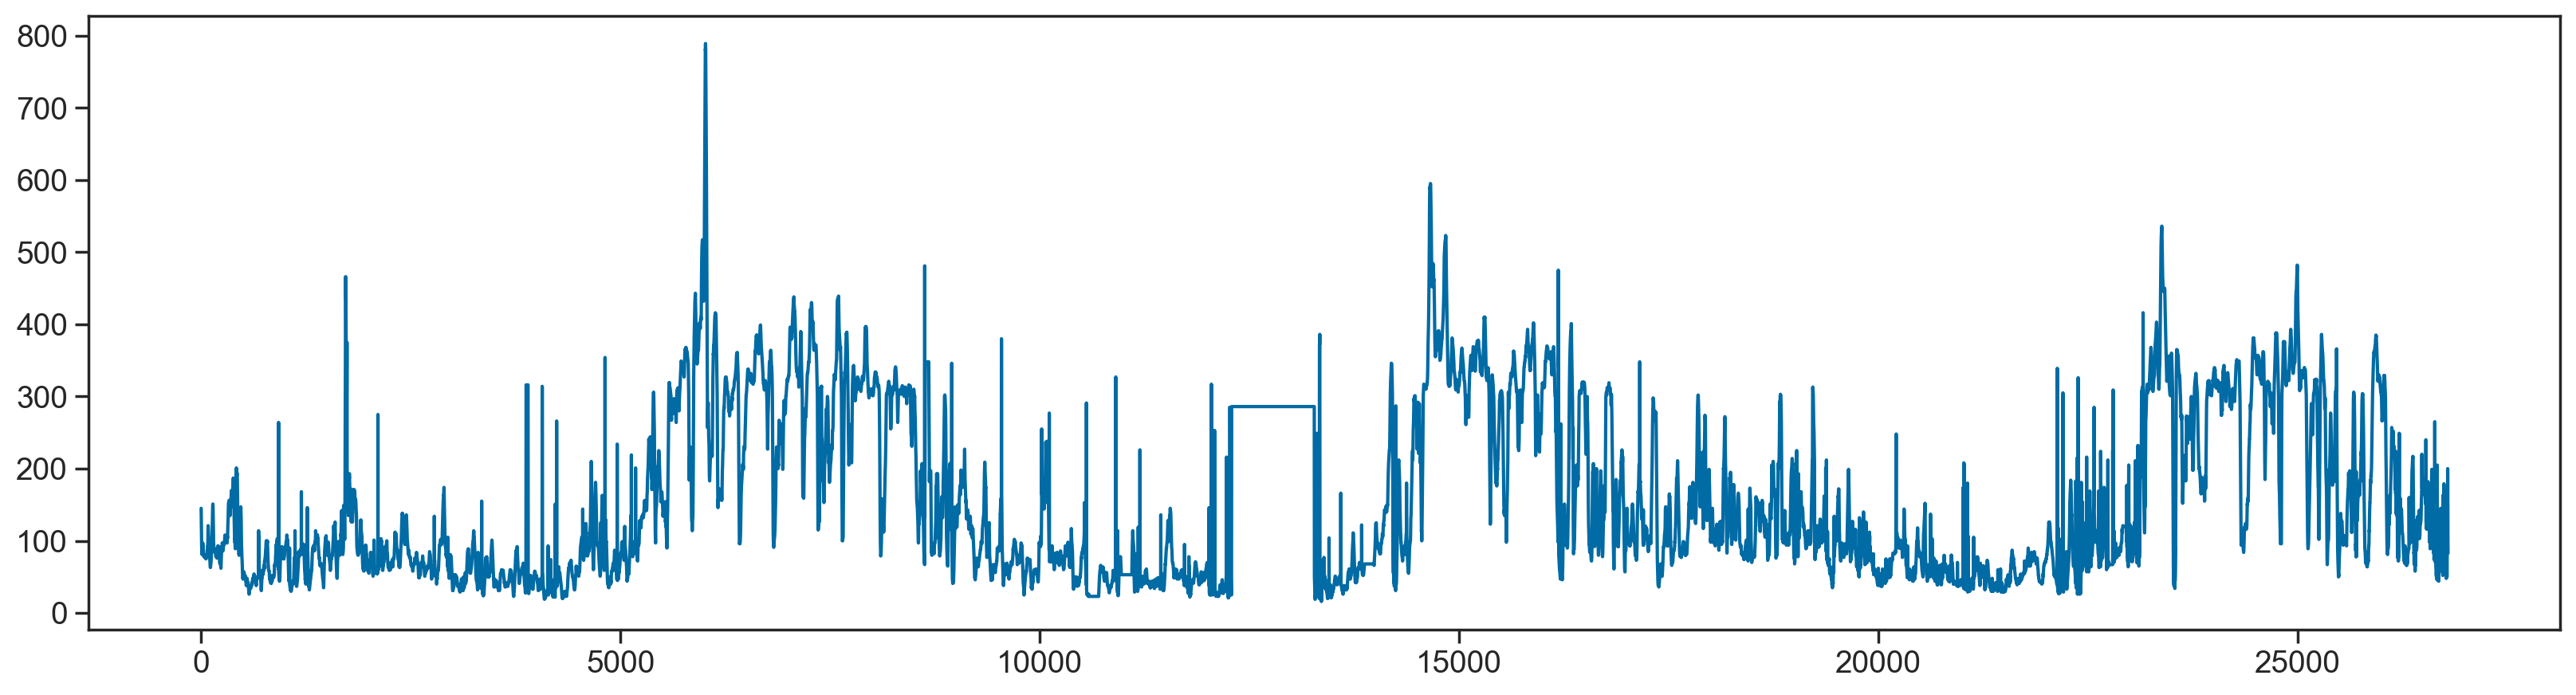

In [145]:
# Remove NO

X_train, X_test, y_train, y_test = train_test_split(df_nise_data[['PM2.5', 'NO2', 'NOx', "SO2", "CO"]] ,
                                                    df_nise_data['AQI_calculated'],
                                                    train_size=0.7)
X_train
X_test
y_train
y_test

# Visualize AQI
plt.figure(figsize=(20, 5))
plt.plot(df_nise_data['AQI_calculated'])

LinearRegression()


LinearRegression()

y_pred  y_test
16090  287.244283   354.0
15369  115.248652   160.0
9800    76.987252    50.0
9059   174.313036   196.0
24321  152.557550   148.0
...           ...     ...
20390   87.744553    49.0
13670  118.061767    43.0
10344   74.310301    84.0
11383   73.930322    47.0
5996   885.210591   456.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.8119152504852891


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'LinearRegression()')

score(X_test, y_test)  0.6578606379190257
MAPE is 48.82
MAE is 50.32
MSE is 4481.92
r2_score 0.6578606379190257



DecisionTreeRegressor()


DecisionTreeRegressor()

y_pred  y_test
16090   366.0   354.0
15369   232.0   160.0
9800     45.0    50.0
9059    325.0   196.0
24321   164.0   148.0
...       ...     ...
20390    54.0    49.0
13670    81.0    43.0
10344    72.0    84.0
11383    44.0    47.0
5996    469.0   456.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.7863246795105382


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'DecisionTreeRegressor()')

score(X_test, y_test)  0.5676741008508775
MAPE is 38.96
MAE is 44.97
MSE is 5663.34
r2_score 0.5676741008508775



RandomForestRegressor()


RandomForestRegressor()

y_pred  y_test
16090  320.32   354.0
15369  196.91   160.0
9800    58.66    50.0
9059   238.88   196.0
24321  196.52   148.0
...       ...     ...
20390   54.16    49.0
13670  134.80    43.0
10344   84.72    84.0
11383   50.65    47.0
5996   451.64   456.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.885758605983893


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'RandomForestRegressor()')

score(X_test, y_test)  0.7842763284690346
MAPE is 30.58
MAE is 34.49
MSE is 2825.92
r2_score 0.7842763284690346



AdaBoostRegressor()


AdaBoostRegressor()

y_pred  y_test
16090  307.914147   354.0
15369  122.925299   160.0
9800    97.473404    50.0
9059   226.088028   196.0
24321  198.360926   148.0
...           ...     ...
20390   97.473404    49.0
13670  130.096693    43.0
10344   97.473404    84.0
11383   97.473404    47.0
5996   429.577703   456.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.8291924402070118


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'AdaBoostRegressor()')

score(X_test, y_test)  0.6362958641722225
MAPE is 67.07
MAE is 55.87
MSE is 4764.41
r2_score 0.6362958641722225



BaggingRegressor()


BaggingRegressor()

y_pred  y_test
16090   322.9   354.0
15369   193.2   160.0
9800     55.6    50.0
9059    211.4   196.0
24321   154.6   148.0
...       ...     ...
20390    50.8    49.0
13670   144.4    43.0
10344    94.5    84.0
11383    52.4    47.0
5996    461.9   456.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.8725091087074794


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'BaggingRegressor()')

score(X_test, y_test)  0.760082767508133
MAPE is 31.73
MAE is 36.04
MSE is 3142.84
r2_score 0.760082767508133





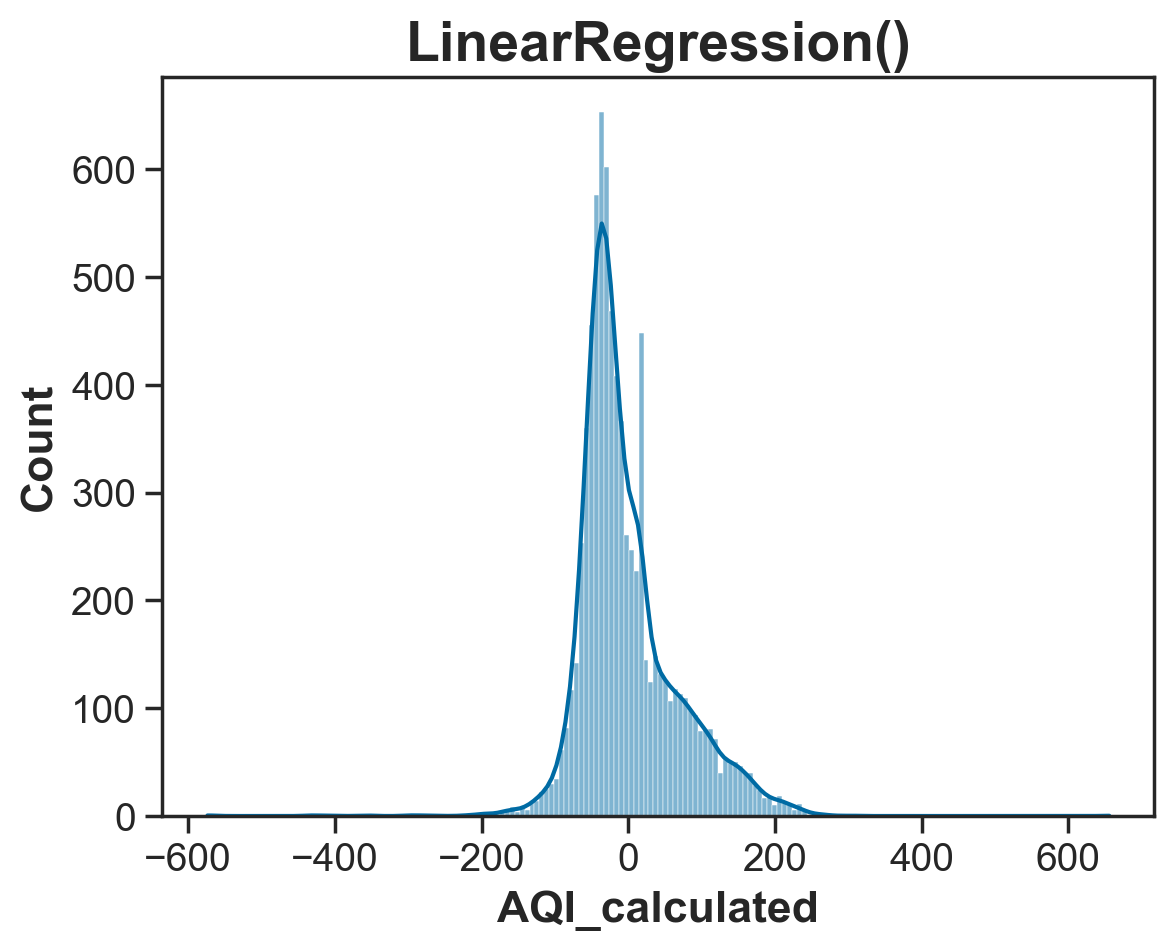

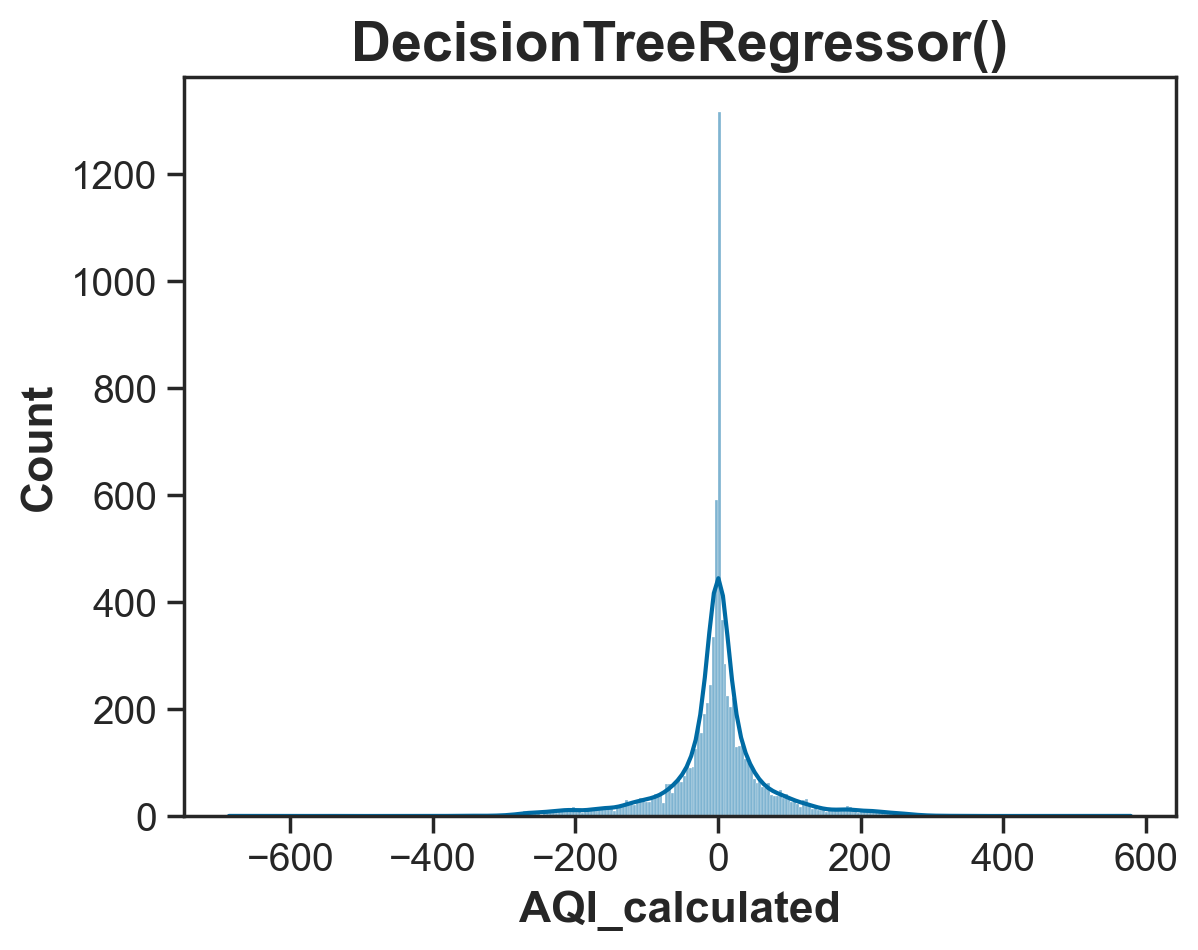

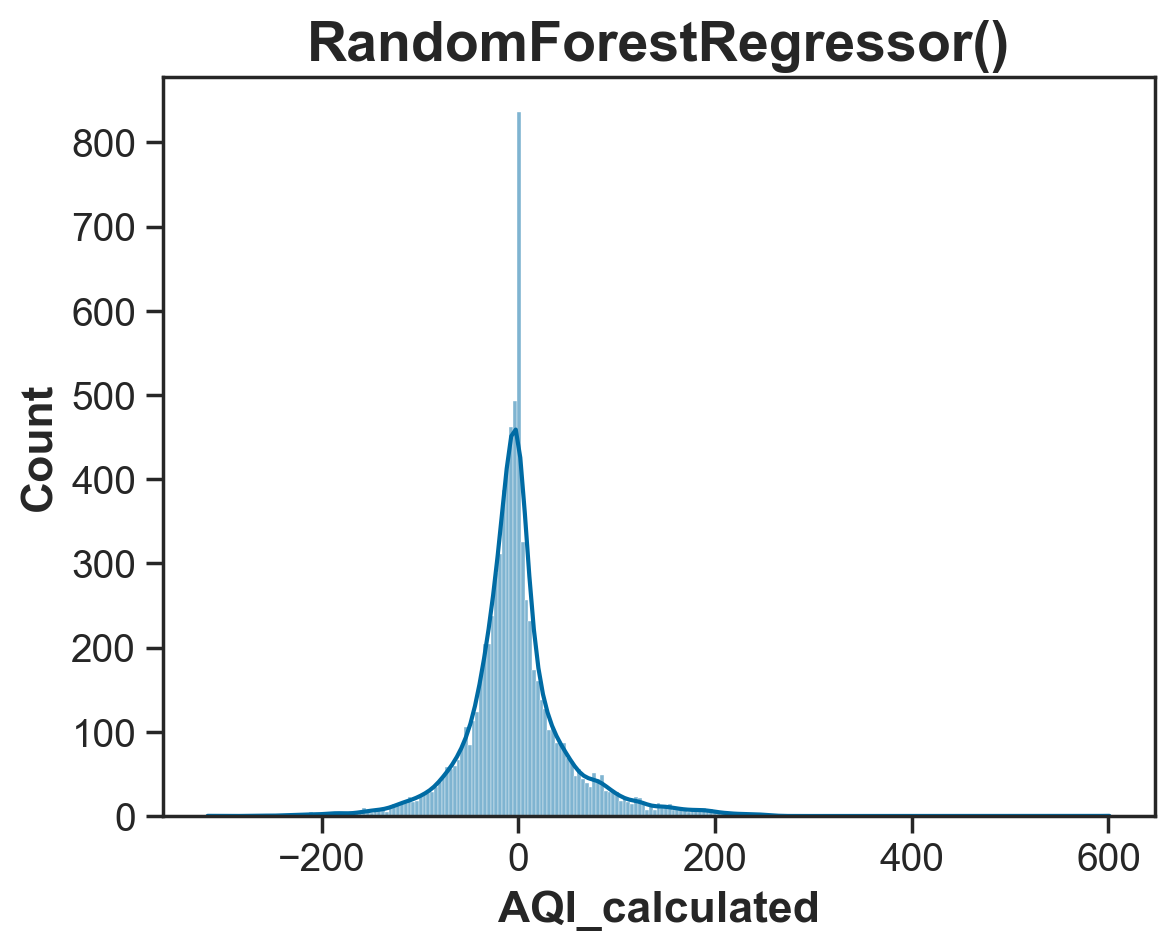

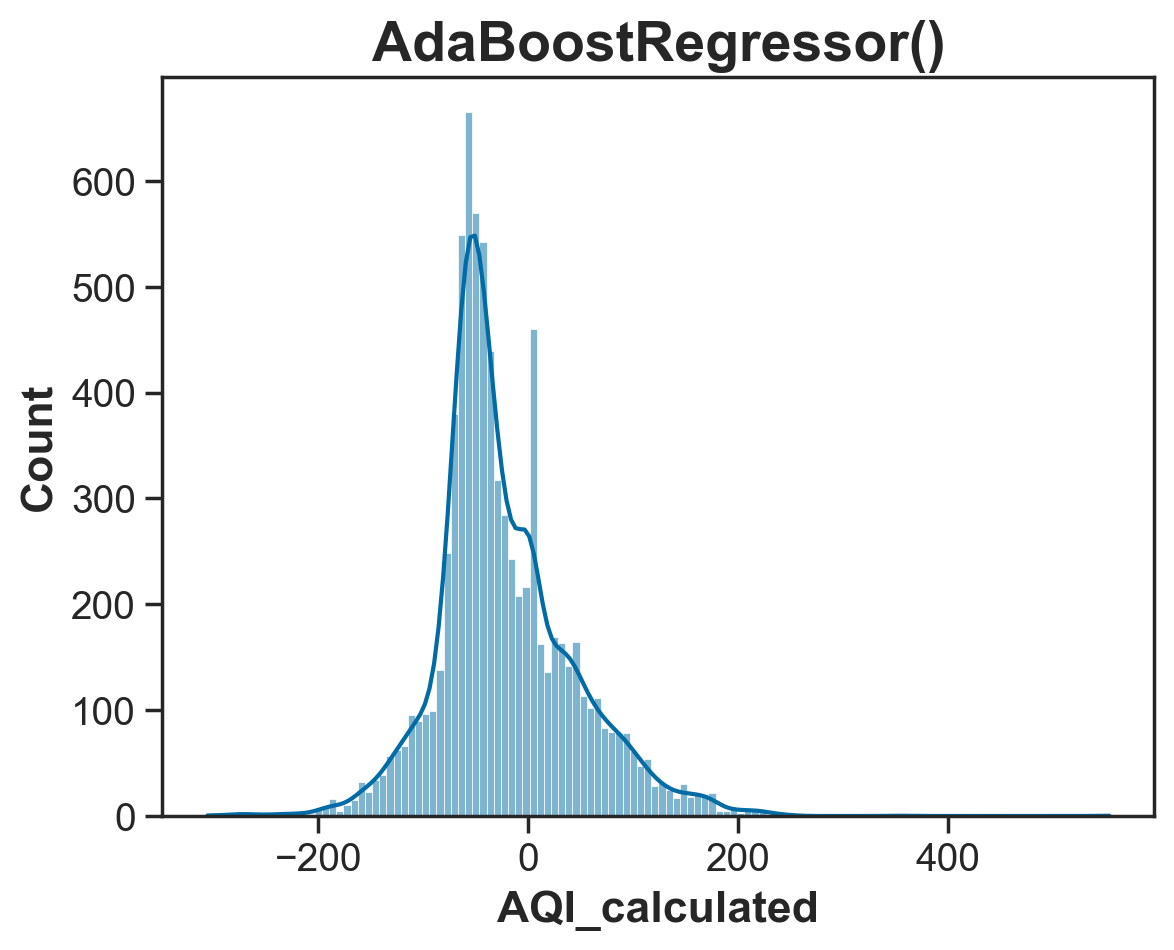

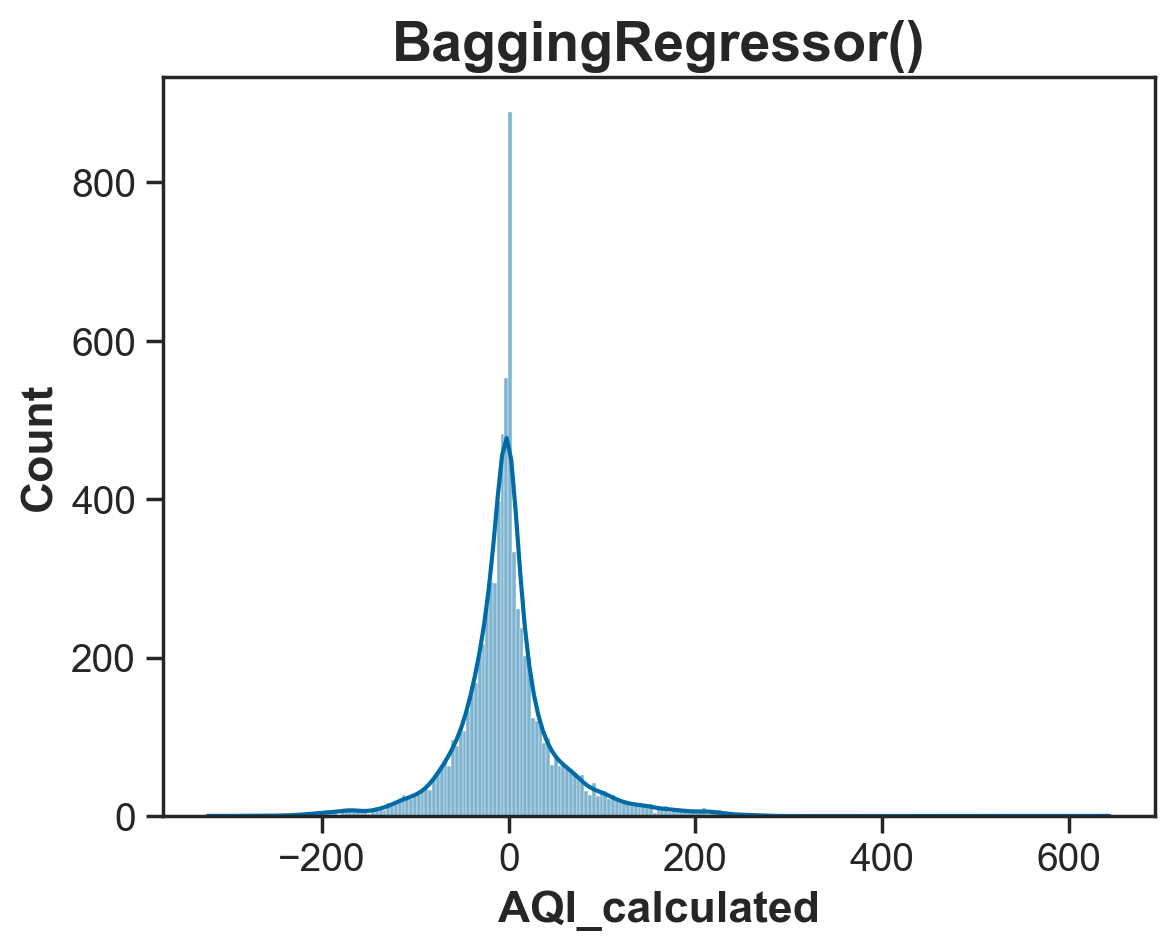

In [146]:
lr = LinearRegression()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()

for i in [lr, d_tree, rf, ab, br]:
    model = i
    print(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_actual = pd.DataFrame({'y_pred': y_pred, "y_test": y_test})
    predicted_actual
    print("Correlation b/w actual and predicted",
          predicted_actual['y_pred'].corr(predicted_actual['y_test']))
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))

#     s = cross_val_score(estimator=model,
#                         X=df[['PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO']],
#                         y=df['AQI_calculated'],
#                         scoring='r2',
#                         cv=5)
#     print("\nCV scores", s)
#     print("\nAverage cv score ", np.mean(s))
    print(f"MAPE is {round(mean_absolute_percentage_error(y_test , y_pred) * 100, 2)}")
    print(f"MAE is {round(mean_absolute_error(y_test , y_pred), 2)}")
    print(f"MSE is {round(mean_squared_error(y_test , y_pred), 2)}")
    print(f"r2_score {r2_score(y_test, y_pred)}")
    print("\n\n")

#### Teri Gram

In [147]:
df_teri_gram_data = df[df['Station_Teri Gram'] == 1]

<AxesSubplot: >

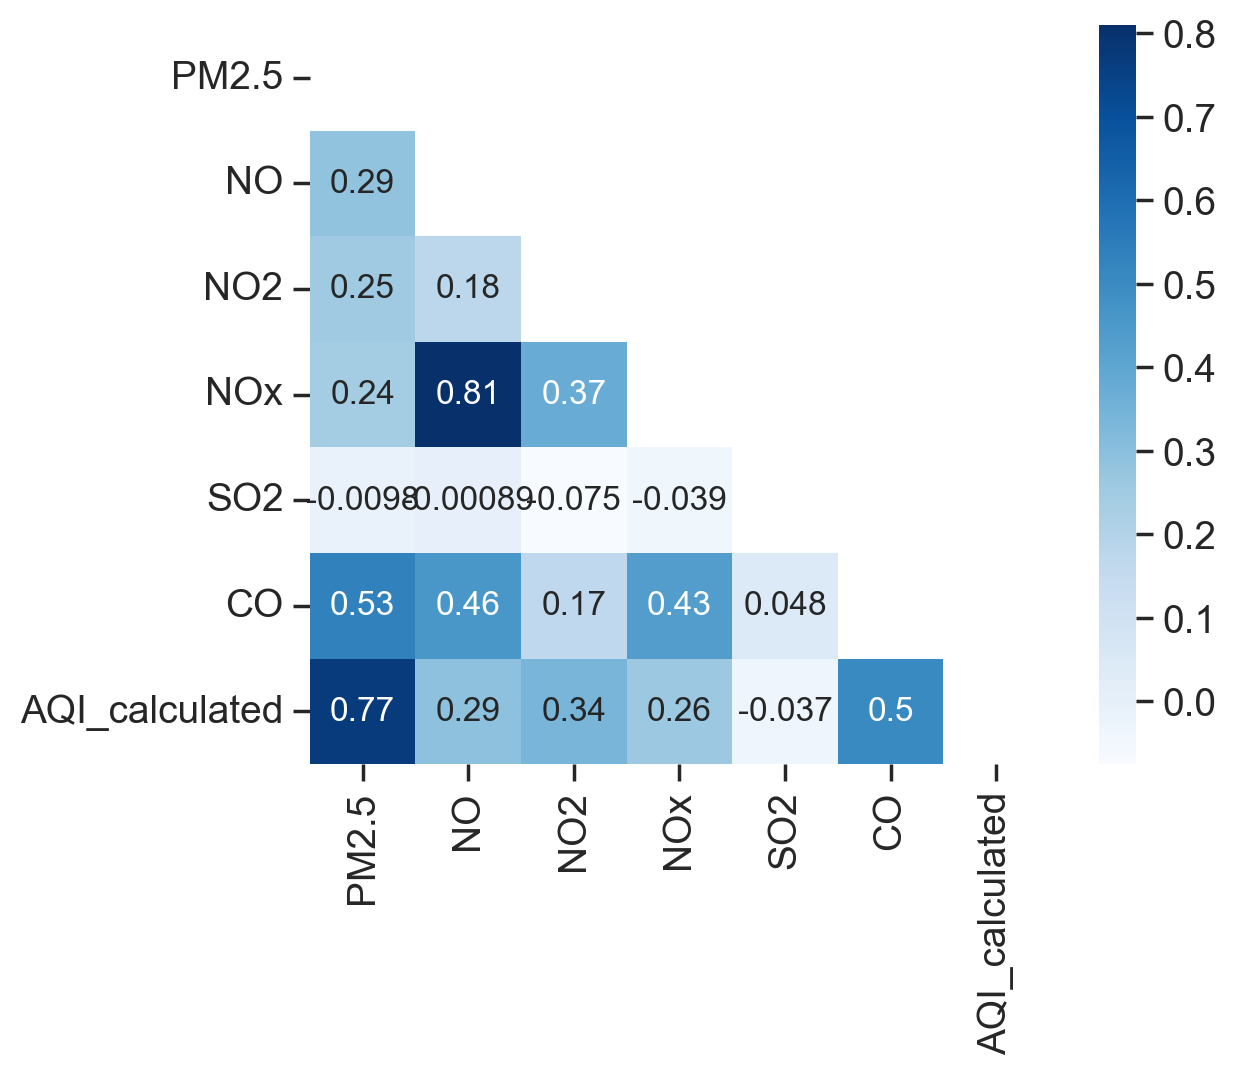

In [148]:
cols = ['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO", 'AQI_calculated']
sns.heatmap(df_teri_gram_data[cols].corr(),
            square=True,
            annot=True,
            cmap="Blues",
            mask=np.triu(df_teri_gram_data[cols].corr()))

PM2.5    NO2    NOx    SO2    CO
114547   17.73   8.45  14.32   0.56  0.36
96256    85.98   2.98   6.77   4.24  0.62
119145   83.03   7.76   5.92   9.28  0.70
118754  108.25  18.74  32.83   7.81  0.95
93955   113.44  17.22  19.66  13.74  0.85
...        ...    ...    ...    ...   ...
103828   43.95   9.83   5.83   2.10  0.63
107347   36.75   7.47  27.65   2.57  0.68
116097   60.90  34.76  19.88   2.78  0.43
114814   31.07  12.41   5.24   2.15  0.37
102984  138.36  13.05  39.90   2.67  1.23

[18755 rows x 5 columns]

PM2.5    NO2    NOx    SO2    CO
99538   190.16  22.95  12.76   9.52  1.22
111308   65.10  39.37   0.00   0.68  0.77
96419    81.81   2.98   9.07   2.35  0.65
95086    93.75   3.03   3.04  12.36  0.89
107644   38.33   5.95  16.10   1.43  0.50
...        ...    ...    ...    ...   ...
104231   56.54   6.69   0.00   1.94  0.43
102847  139.53  12.19   9.12   1.84  0.59
114197   31.30  28.23  29.28   1.30  0.50
104327   74.76   6.34   8.04   1.32  0.74
100626  107.92  18.78  28.65   7.82  1.08

[8038 rows x 5 columns]

114547     24.0
96256     125.0
119145    322.0
118754    358.0
93955     200.0
          ...  
103828    137.0
107347     81.0
116097     74.0
114814     35.0
102984    301.0
Name: AQI_calculated, Length: 18755, dtype: float64

99538     339.0
111308    158.0
96419      99.0
95086      72.0
107644     78.0
          ...  
104231     59.0
102847    227.0
114197     50.0
104327    119.0
100626    294.0
Name: AQI_calculated, Length: 8038, dtype: float64

<Figure size 2000x500 with 0 Axes>

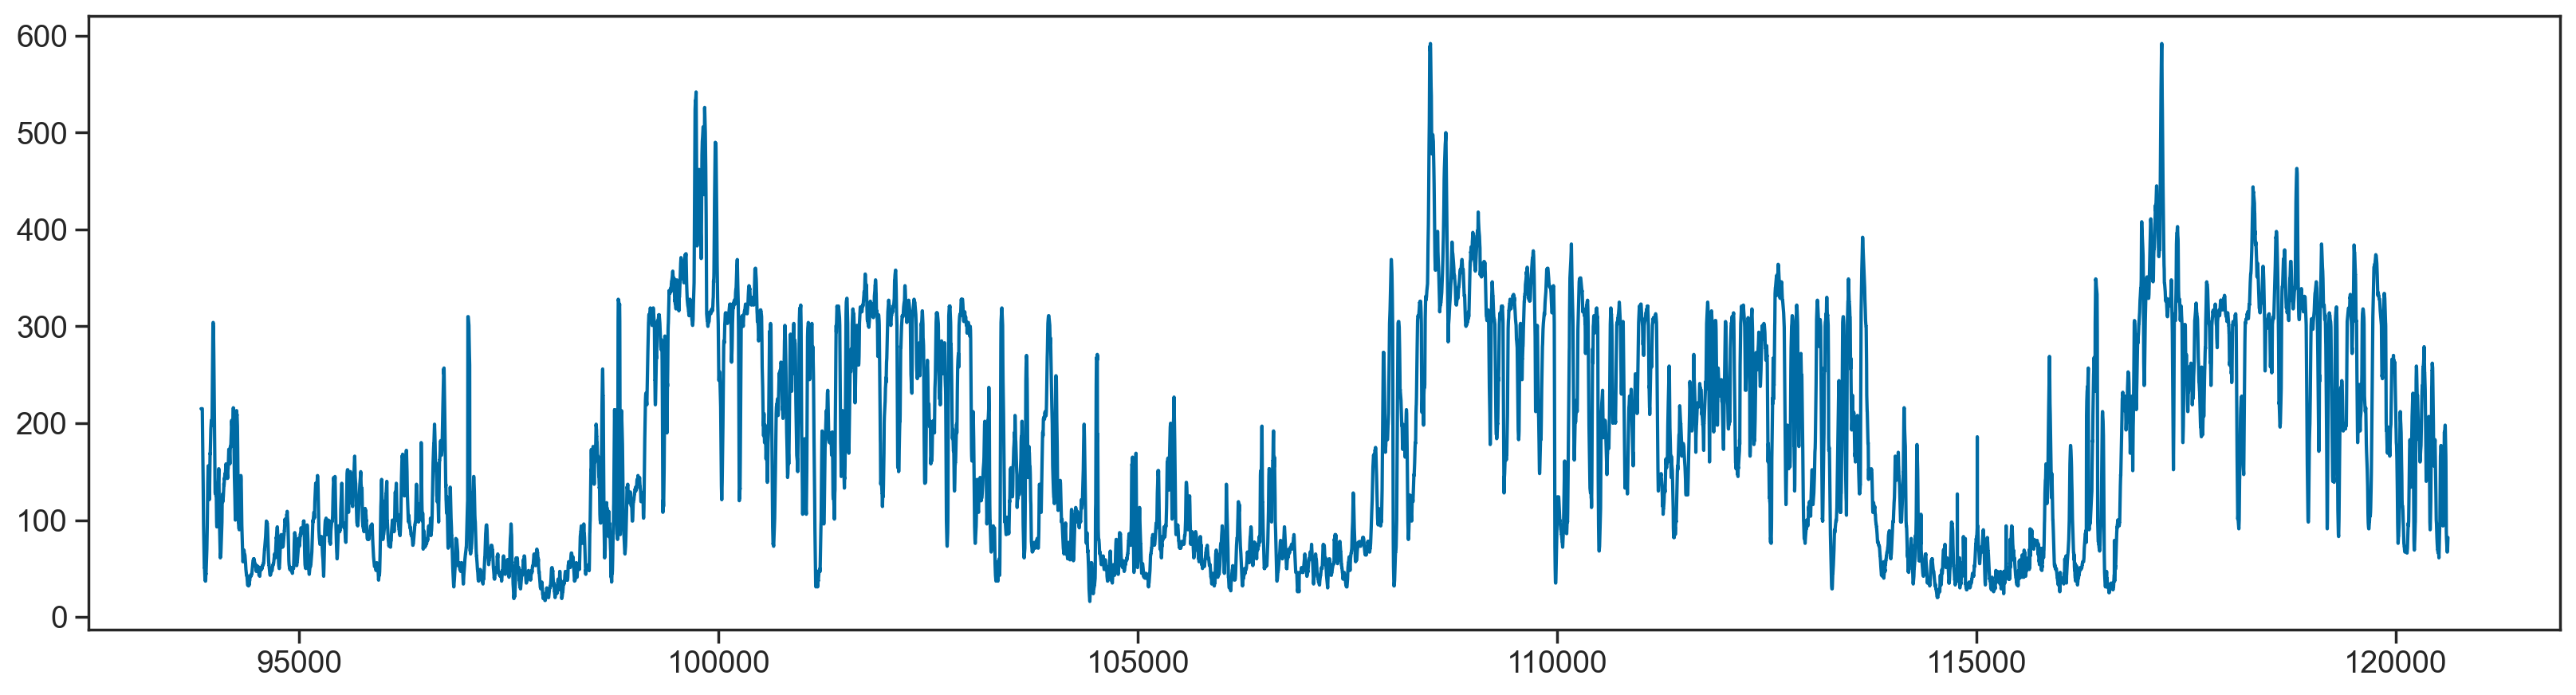

In [149]:
X_train, X_test, y_train, y_test = train_test_split(df_teri_gram_data[['PM2.5', 'NO2', 'NOx', "SO2", "CO"]] ,
                                                    df_teri_gram_data['AQI_calculated'],
                                                    train_size=0.7)
X_train
X_test
y_train
y_test

# Visualize AQI
plt.figure(figsize=(20, 5))
plt.plot(df_teri_gram_data['AQI_calculated'])

<AxesSubplot: >

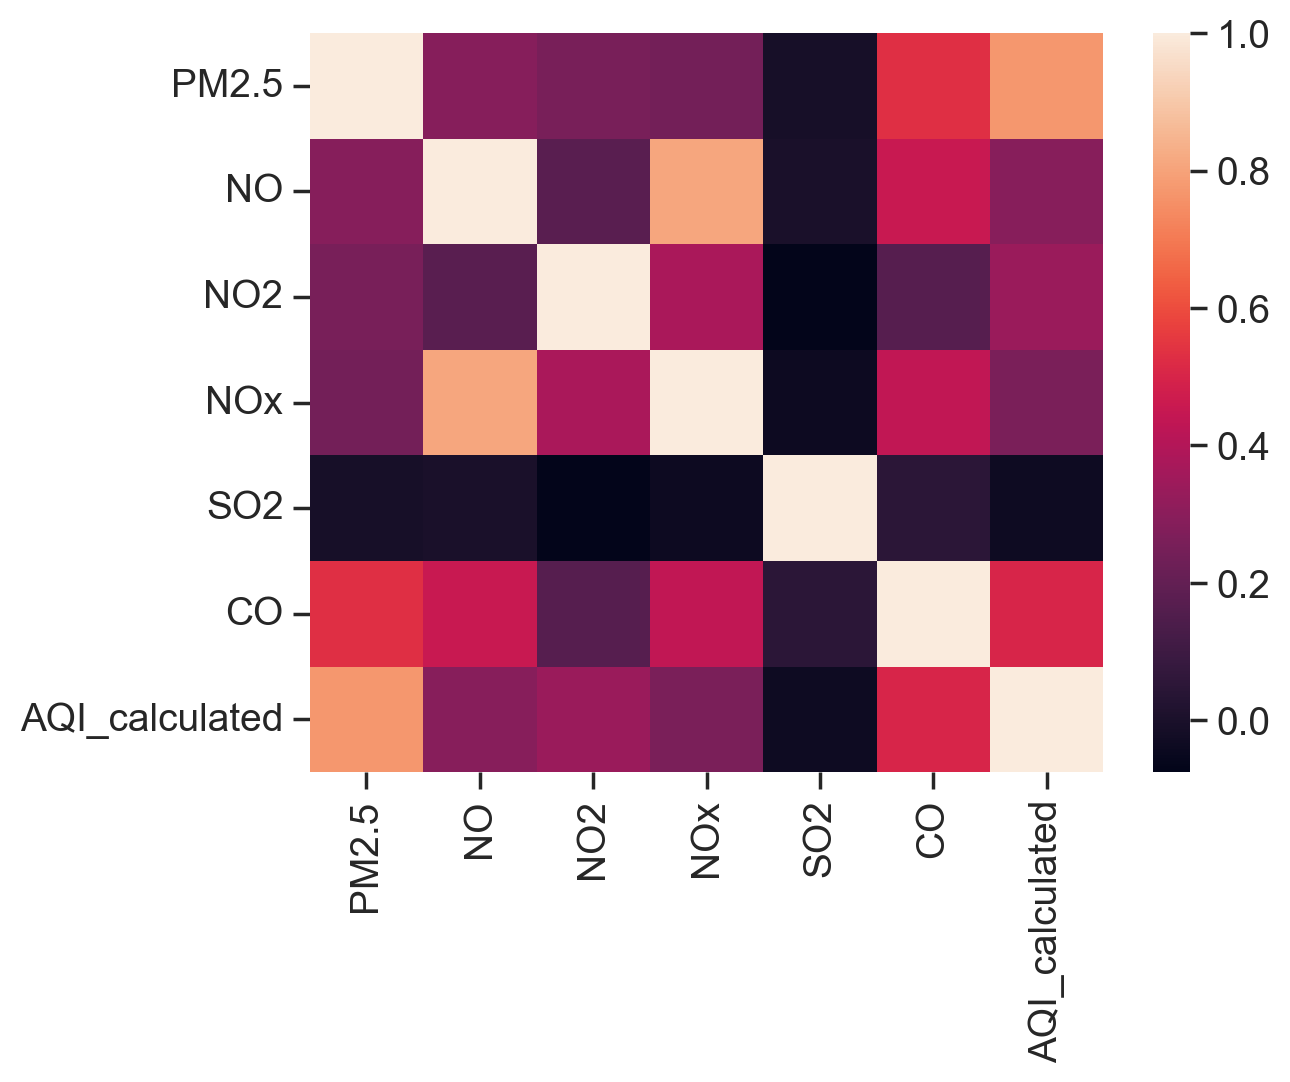

In [150]:
sns.heatmap(df_teri_gram_data[['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO", 'AQI_calculated']].corr())

LinearRegression()


LinearRegression()

y_pred  y_test
99538   313.927069   339.0
111308  187.926103   158.0
96419   148.465612    99.0
95086   165.775848    72.0
107644   98.846882    78.0
...            ...     ...
104231  119.071420    59.0
102847  224.379059   227.0
114197  121.926617    50.0
104327  149.104173   119.0
100626  210.654809   294.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.7813630515226028


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'LinearRegression()')

score(X_test, y_test)  0.6097628816131644
MAPE is 47.55
MAE is 54.32
MSE is 5019.15
r2_score 0.6097628816131644



DecisionTreeRegressor()


DecisionTreeRegressor()

y_pred  y_test
99538    341.0   339.0
111308   160.0   158.0
96419     83.0    99.0
95086    104.0    72.0
107644    77.0    78.0
...        ...     ...
104231   153.0    59.0
102847   259.0   227.0
114197    49.0    50.0
104327   120.0   119.0
100626   358.0   294.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.8462012711203155


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'DecisionTreeRegressor()')

score(X_test, y_test)  0.6924139005514163
MAPE is 27.07
MAE is 37.17
MSE is 3956.11
r2_score 0.6924139005514163



RandomForestRegressor()


RandomForestRegressor()

y_pred  y_test
99538   347.0800   339.0
111308  159.3500   158.0
96419   122.0300    99.0
95086   112.5600    72.0
107644   76.6300    78.0
...          ...     ...
104231   87.9505    59.0
102847  270.0700   227.0
114197   52.1100    50.0
104327  112.5000   119.0
100626  260.8200   294.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.9140309728873857


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'RandomForestRegressor()')

score(X_test, y_test)  0.8350985890613136
MAPE is 23.25
MAE is 30.58
MSE is 2120.93
r2_score 0.8350985890613136



AdaBoostRegressor()


AdaBoostRegressor()

y_pred  y_test
99538   307.821336   339.0
111308  197.624838   158.0
96419   184.140657    99.0
95086   194.396842    72.0
107644  172.138361    78.0
...            ...     ...
104231  177.915637    59.0
102847  221.569789   227.0
114197  178.153378    50.0
104327  194.396842   119.0
100626  250.227629   294.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.8099969454606747


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'AdaBoostRegressor()')

score(X_test, y_test)  0.47386969786800026
MAPE is 89.49
MAE is 72.17
MSE is 6766.98
r2_score 0.47386969786800026



BaggingRegressor()


BaggingRegressor()

y_pred  y_test
99538    345.9   339.0
111308   158.4   158.0
96419    115.0    99.0
95086    112.1    72.0
107644    79.8    78.0
...        ...     ...
104231    96.7    59.0
102847   251.3   227.0
114197    52.9    50.0
104327   101.6   119.0
100626   220.4   294.0

[8038 rows x 2 columns]

Correlation b/w actual and predicted 0.9060377871484852


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AQI_calculated', ylabel='Count'>

Text(0.5, 1.0, 'BaggingRegressor()')

score(X_test, y_test)  0.8208846819551665
MAPE is 24.15
MAE is 31.85
MSE is 2303.75
r2_score 0.8208846819551665





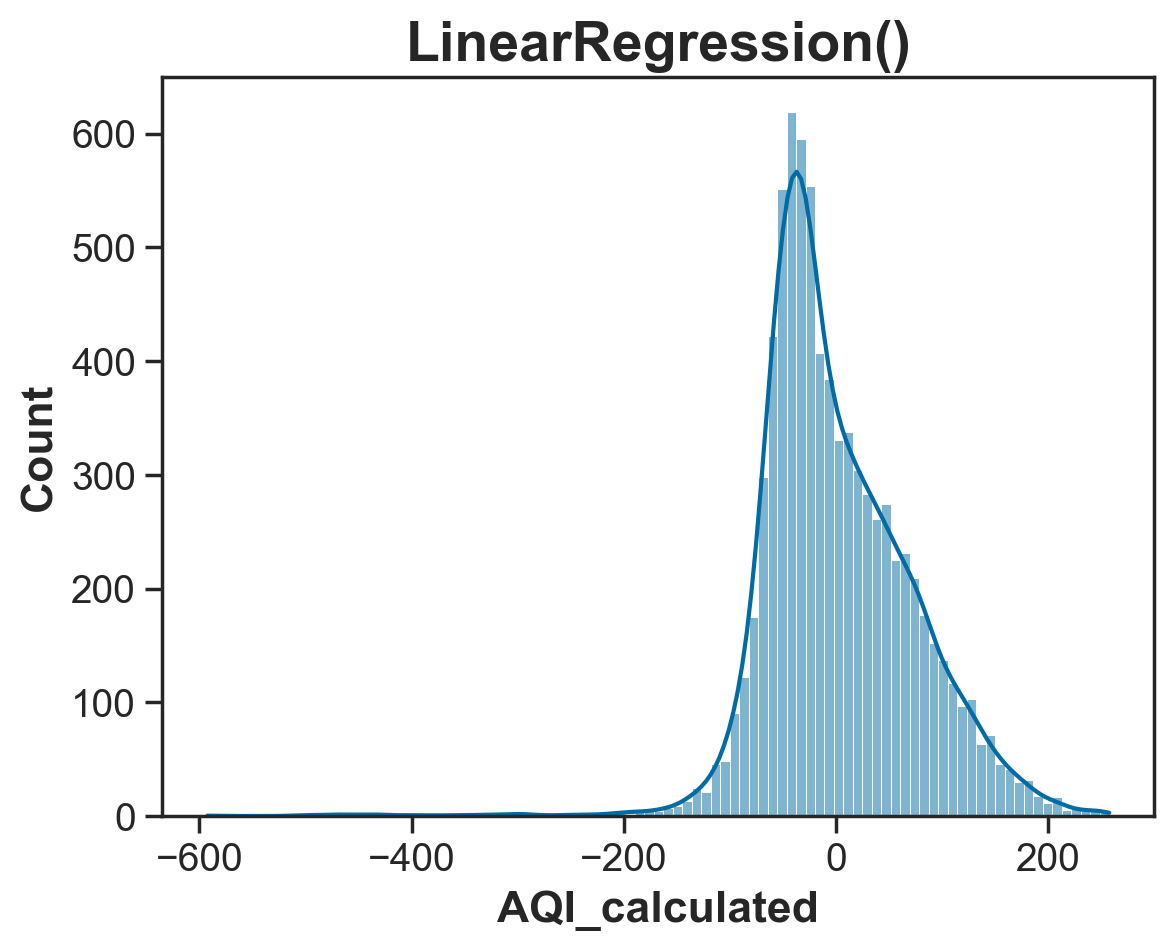

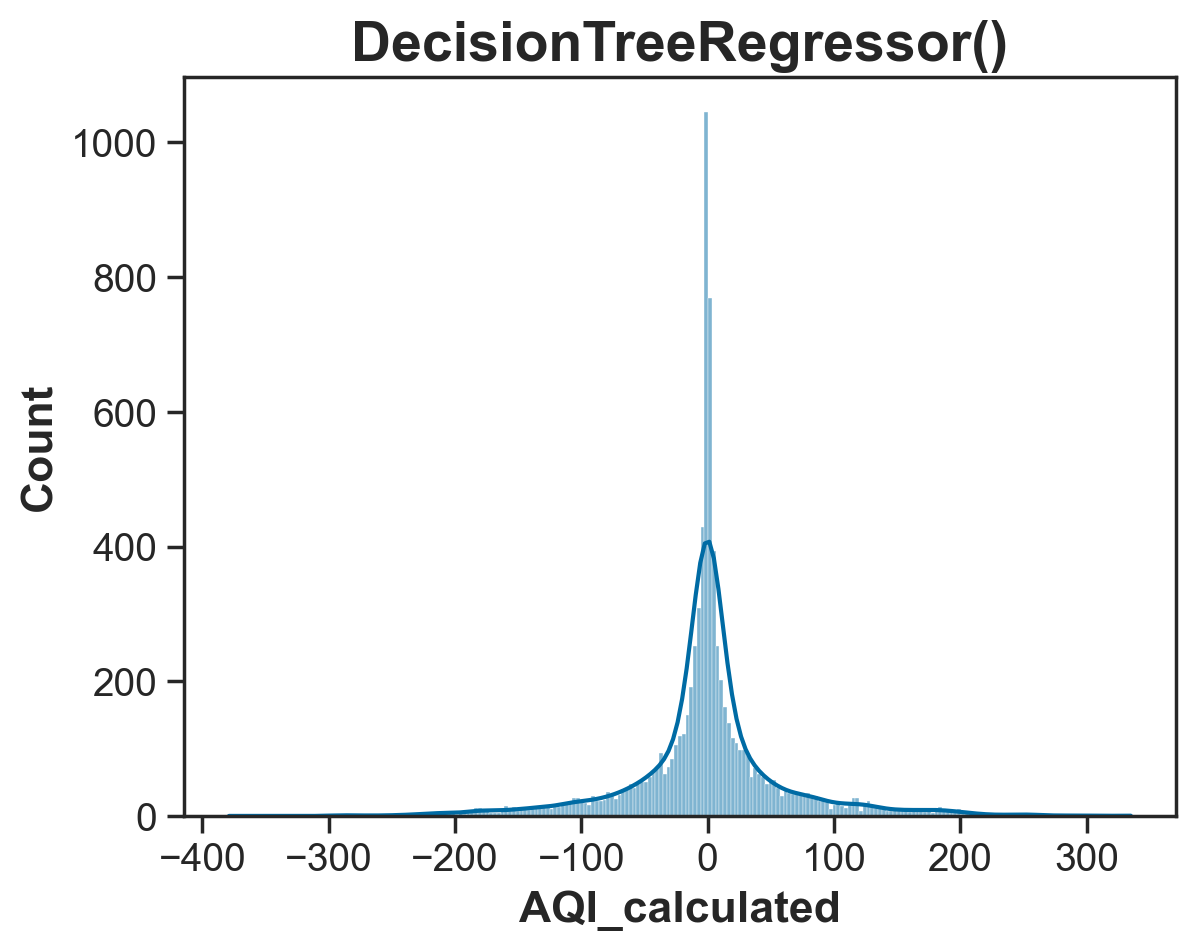

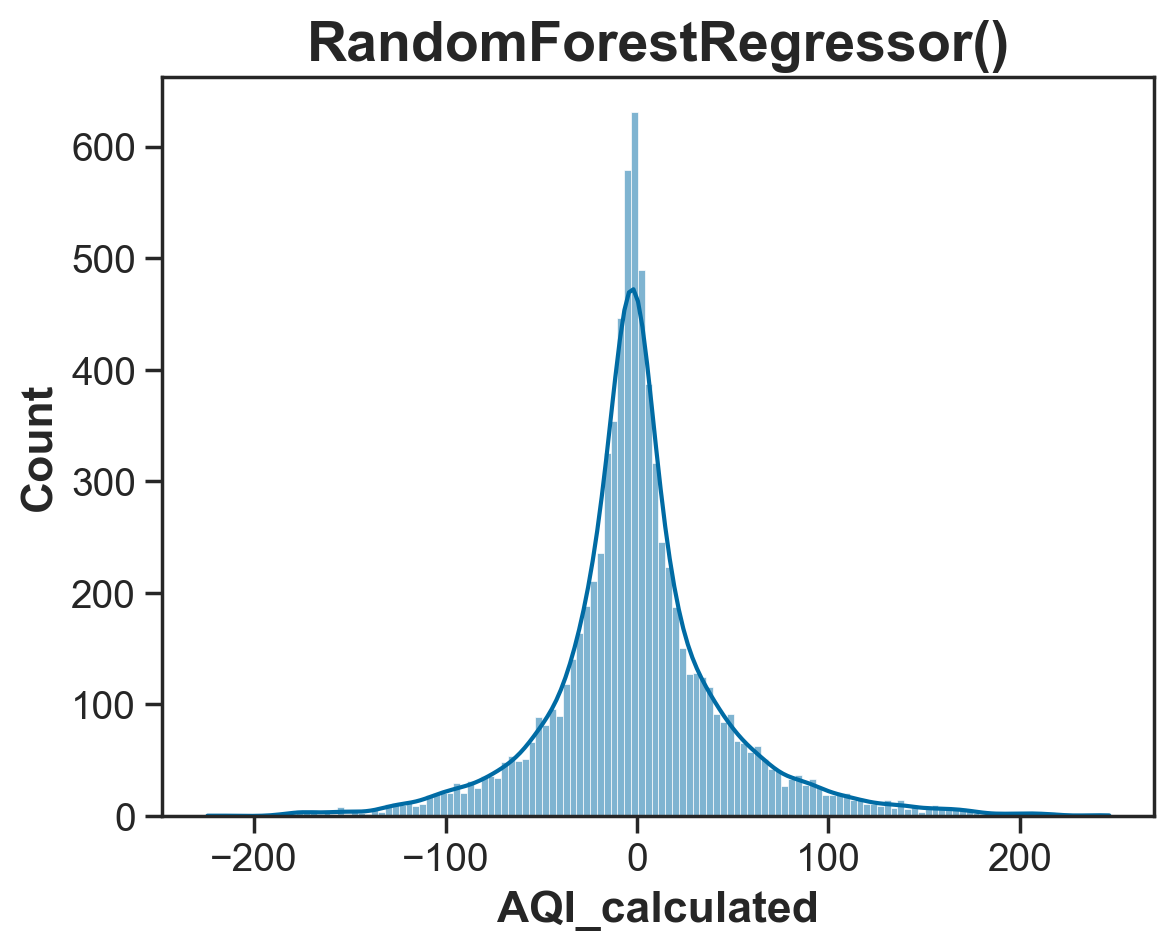

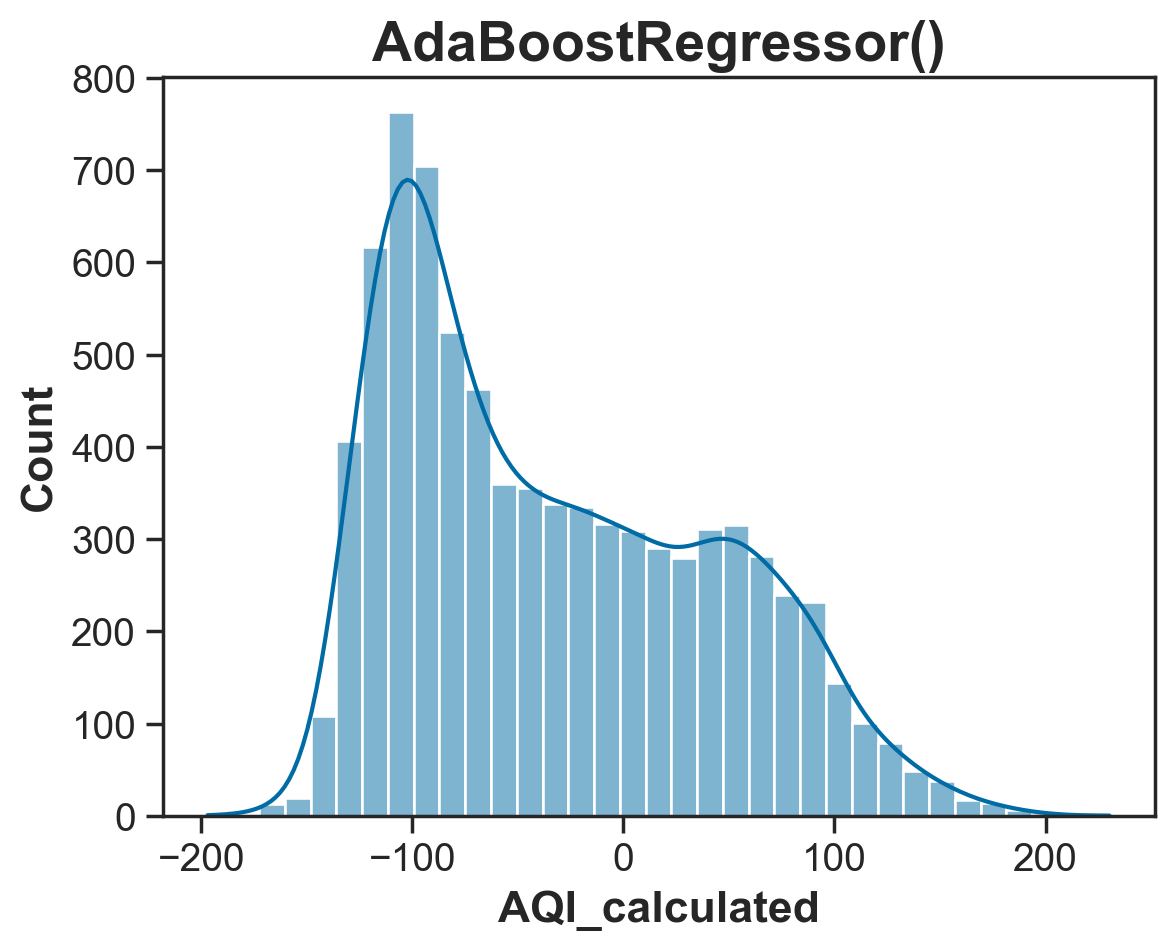

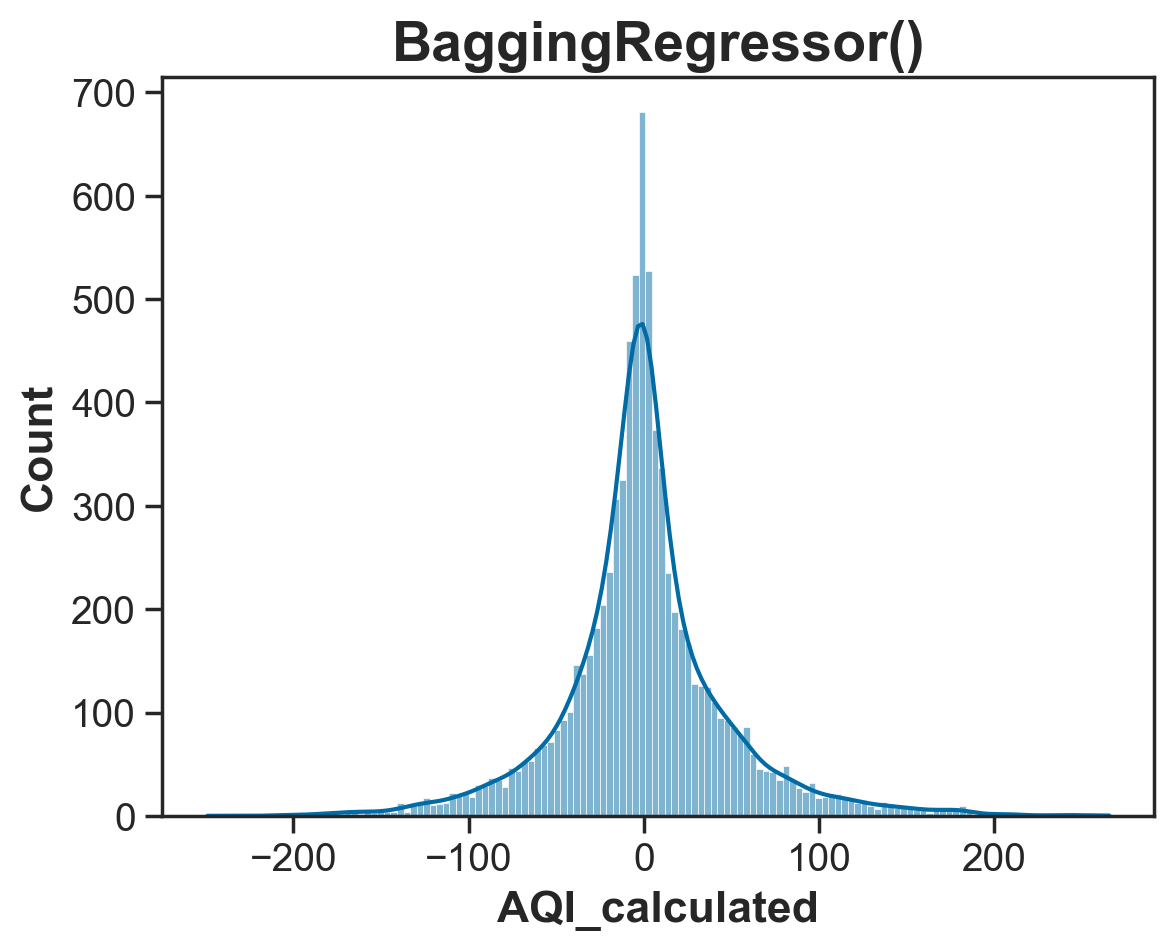

In [151]:
lr = LinearRegression()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()

for i in [lr, d_tree, rf, ab, br]:
    model = i
    print(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_actual = pd.DataFrame({'y_pred': y_pred, "y_test": y_test})
    predicted_actual
    print("Correlation b/w actual and predicted",
          predicted_actual['y_pred'].corr(predicted_actual['y_test']))
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))

#     s = cross_val_score(estimator=model,
#                         X=df[['PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO']],
#                         y=df['AQI_calculated'],
#                         scoring='r2',
#                         cv=5)
#     print("\nCV scores", s)
#     print("\nAverage cv score ", np.mean(s))

    print(f"MAPE is {round(mean_absolute_percentage_error(y_test , y_pred) * 100, 2)}")
    print(f"MAE is {round(mean_absolute_error(y_test , y_pred), 2)}")
    print(f"MSE is {round(mean_squared_error(y_test , y_pred), 2)}")
    print(f"r2_score {r2_score(y_test, y_pred)}")
    print("\n\n")

### Splitting into 80% train in sequence

In [99]:
train_end_index = round(len(df[['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]])*0.8)
train_end_index

117926

In [104]:
df.loc[:train_end_index,'AQI_calculated']

0         145.0
1         135.0
2         127.0
3         119.0
4         108.0
          ...  
117922    326.0
117923    326.0
117924    326.0
117925    326.0
117926    325.0
Name: AQI_calculated, Length: 117919, dtype: float64

In [107]:
X_train = df.loc[:train_end_index,['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]]
y_train = df.loc[:train_end_index,'AQI_calculated']
X_test = df.loc[train_end_index:,['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]]
y_test = df.loc[train_end_index:,'AQI_calculated']

In [108]:
X_train
y_train

X_test
y_test

PM2.5     NO    NO2    NOx        SO2    CO
0        28.89   7.25  21.37  28.63   7.690000  1.76
1        21.17   7.41  20.99  28.41   7.440000  1.71
2        21.47   7.48  20.49  27.97   6.823333  1.74
3        31.70   7.28  14.93  22.22   6.633333  1.60
4        25.81   7.85  17.92  25.77   6.583333  1.56
...        ...    ...    ...    ...        ...   ...
117922  123.83   9.77  21.68  19.16  11.630000  0.84
117923  132.22  10.91  21.43  19.94   4.100000  0.86
117924  139.25  17.30  19.63  24.14  15.600000  0.95
117925  140.78  28.77  17.13  32.03  15.600000  1.05
117926  145.33  29.84  15.48  32.02  15.600000  1.09

[117919 rows x 6 columns]

0         145.0
1         135.0
2         127.0
3         119.0
4         108.0
          ...  
117922    326.0
117923    326.0
117924    326.0
117925    326.0
117926    325.0
Name: AQI_calculated, Length: 117919, dtype: float64

PM2.5     NO    NO2    NOx    SO2    CO
117926  145.33  29.84  15.48  32.02  15.60  1.09
117927  150.95  27.92  14.02  29.71  15.60  1.01
117928  148.07  29.34  13.49  30.58  17.41  0.97
117929  142.60  43.11  12.82  41.27  17.52  0.97
117930  140.90  59.52  13.11  54.58  17.37  0.97
...        ...    ...    ...    ...    ...   ...
147411   83.22  23.90  49.59  70.03  41.30  0.87
147412   71.96  24.25  53.15  71.91  40.56  0.66
147413   75.47  24.55  54.38  64.34  40.82  0.28
147414   69.07  23.09  54.48  72.73  39.29  0.43
147415   66.35  23.02  56.28  66.13  39.29  0.50

[29489 rows x 6 columns]

117926    325.0
117927    324.0
117928    323.0
117929    322.0
117930    320.0
          ...  
147411     88.0
147412     90.0
147413     86.0
147414     91.0
147415     90.0
Name: AQI_calculated, Length: 29489, dtype: float64

#### Other regressors

LinearRegression()


LinearRegression()

y_pred  y_test
117926  226.884635   325.0
117927  230.124265   324.0
117928  226.508235   323.0
117929  222.982180   322.0
117930  224.095722   320.0
...            ...     ...
147411  191.289192    88.0
147412  183.601733    90.0
147413  185.286141    86.0
147414  181.610808    91.0
147415  180.099625    90.0

[29489 rows x 2 columns]

Correlation b/w actual and predicted 0.7551870582937363


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'LinearRegression()')

score(X_test, y_test)  0.5597220936545808
Average cv score  0.5916309335708387
MAPE is 0.548231854064739
MAE is 65.6978293751008
MSE is 5966.069054771345
r2_score  0.5597220936545808



DecisionTreeRegressor()


DecisionTreeRegressor()

y_pred  y_test
117926   325.0   325.0
117927   221.0   324.0
117928   221.0   323.0
117929   321.0   322.0
117930   330.0   320.0
...        ...     ...
147411   127.0    88.0
147412   133.0    90.0
147413   452.0    86.0
147414   363.0    91.0
147415    93.0    90.0

[29489 rows x 2 columns]

Correlation b/w actual and predicted 0.5986131906090075


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'DecisionTreeRegressor()')

score(X_test, y_test)  0.21031486609292527
Average cv score  0.5916309335708387
MAPE is 0.5562266805294874
MAE is 73.19723614128648
MSE is 10700.777787199955
r2_score  0.21031486609292527



RandomForestRegressor()


RandomForestRegressor()

y_pred  y_test
117926  307.13   325.0
117927  293.60   324.0
117928  297.37   323.0
117929  279.73   322.0
117930  302.82   320.0
...        ...     ...
147411  204.79    88.0
147412  158.81    90.0
147413  192.06    86.0
147414  156.45    91.0
147415  156.58    90.0

[29489 rows x 2 columns]

Correlation b/w actual and predicted 0.7995124966732593


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'RandomForestRegressor()')

score(X_test, y_test)  0.6356391236028993
Average cv score  0.5916309335708387
MAPE is 0.43727506914572656
MAE is 53.828087792319984
MSE is 4937.340979669001
r2_score  0.6356391236028993



AdaBoostRegressor()


AdaBoostRegressor()

y_pred  y_test
117926  312.457839   325.0
117927  316.000707   324.0
117928  316.000707   323.0
117929  312.457839   322.0
117930  287.404010   320.0
...            ...     ...
147411  227.844799    88.0
147412  225.612104    90.0
147413  225.612104    86.0
147414  225.612104    91.0
147415  227.844799    90.0

[29489 rows x 2 columns]

Correlation b/w actual and predicted 0.6959687191473062


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'AdaBoostRegressor()')

score(X_test, y_test)  0.05824479966344964
Average cv score  0.5916309335708387
MAPE is 1.0643433085971343
MAE is 94.67194141235544
MSE is 12761.431988571867
r2_score  0.05824479966344964



BaggingRegressor()


BaggingRegressor()

y_pred  y_test
117926   312.2   325.0
117927   285.7   324.0
117928   276.2   323.0
117929   289.0   322.0
117930   294.9   320.0
...        ...     ...
147411   205.9    88.0
147412   131.6    90.0
147413   169.7    86.0
147414   149.2    91.0
147415   155.4    90.0

[29489 rows x 2 columns]

Correlation b/w actual and predicted 0.7752976100020131


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'BaggingRegressor()')

score(X_test, y_test)  0.5984267957044872
Average cv score  0.5916309335708387
MAPE is 0.4498869574900286
MAE is 56.08170301878647
MSE is 5441.593668098347
r2_score  0.5984267957044872





<Figure size 640x480 with 0 Axes>

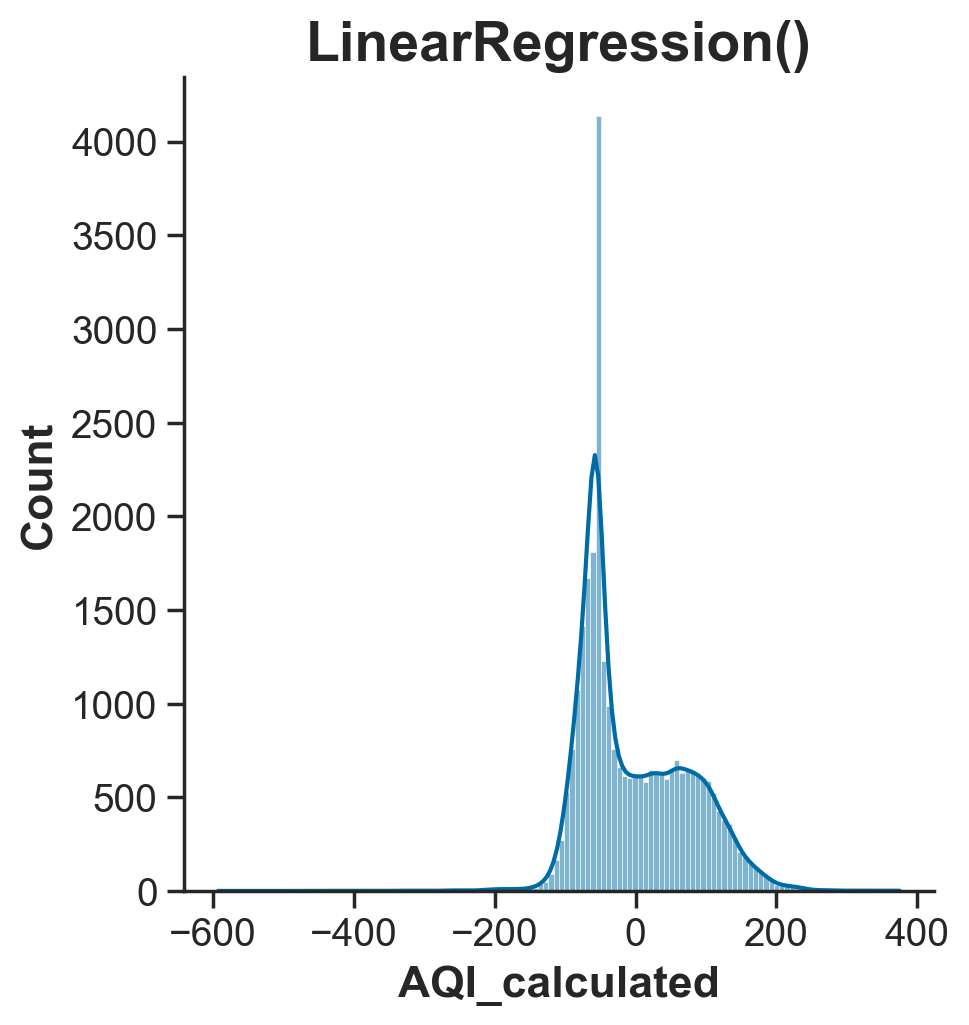

<Figure size 640x480 with 0 Axes>

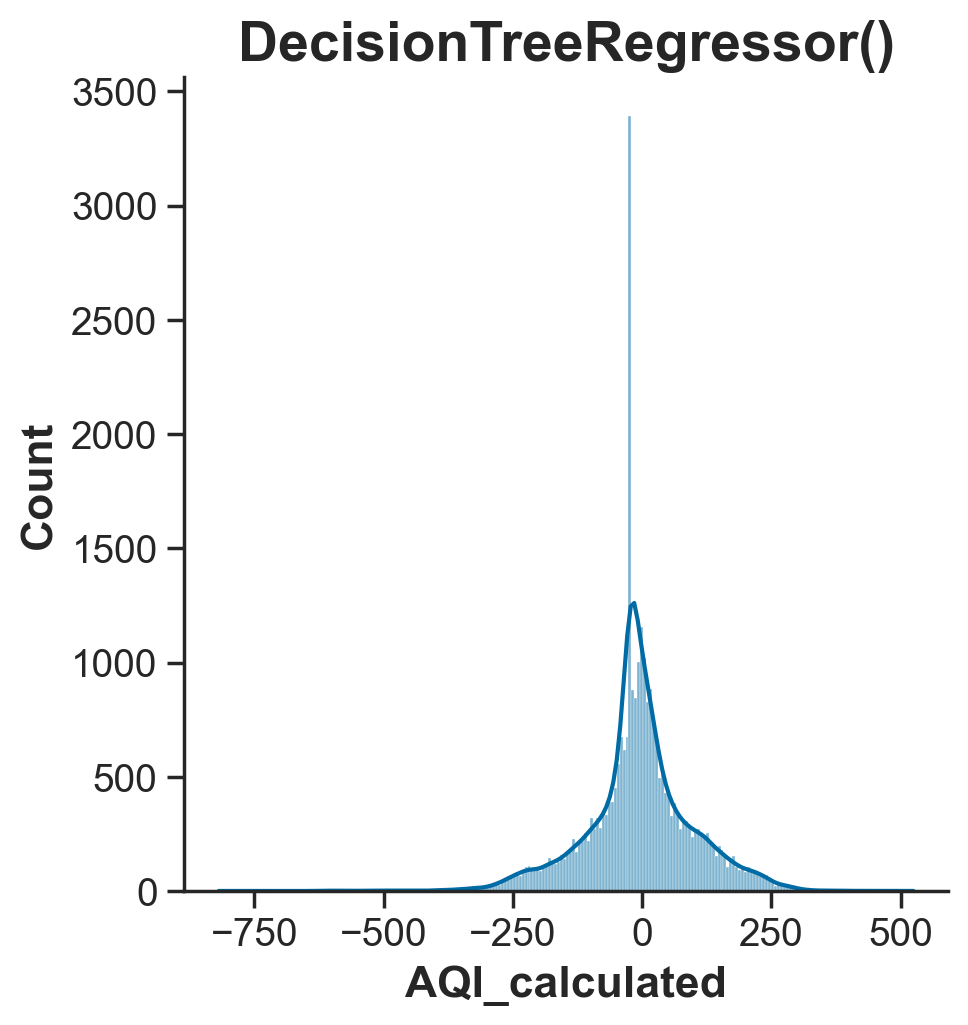

<Figure size 640x480 with 0 Axes>

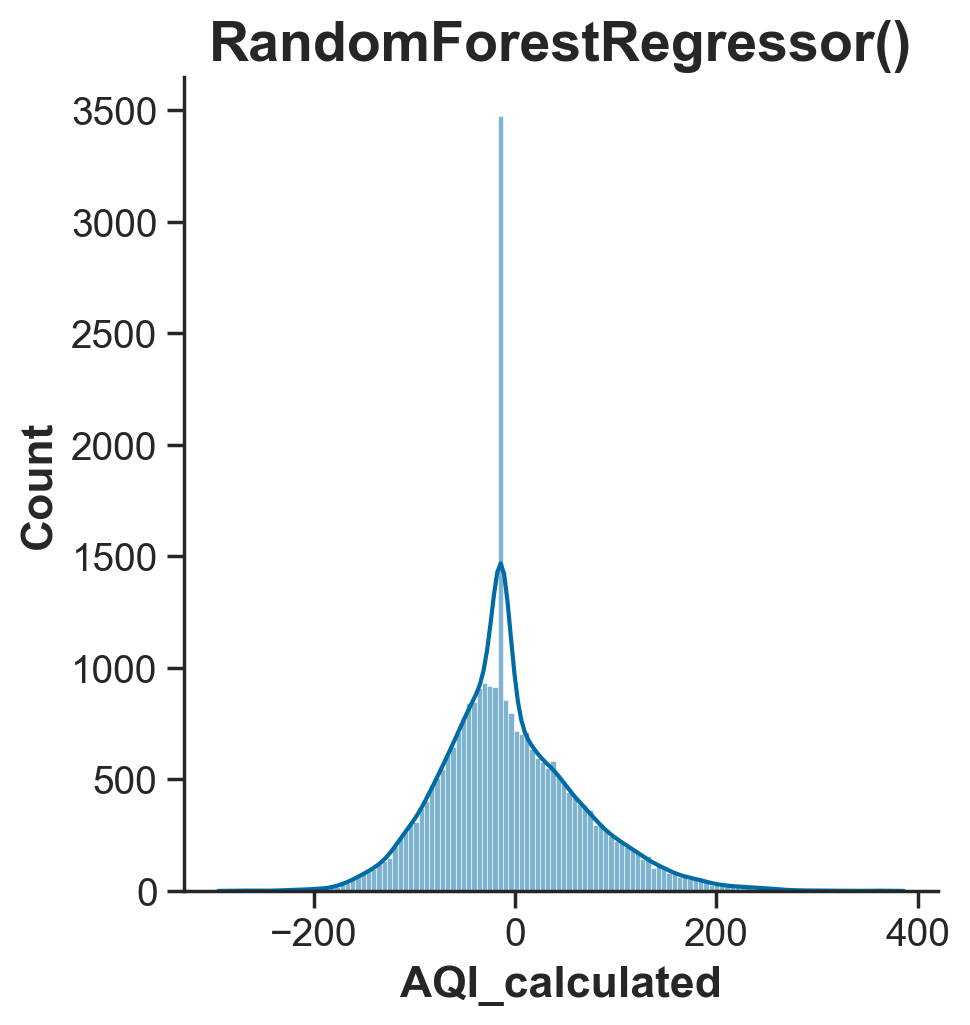

<Figure size 640x480 with 0 Axes>

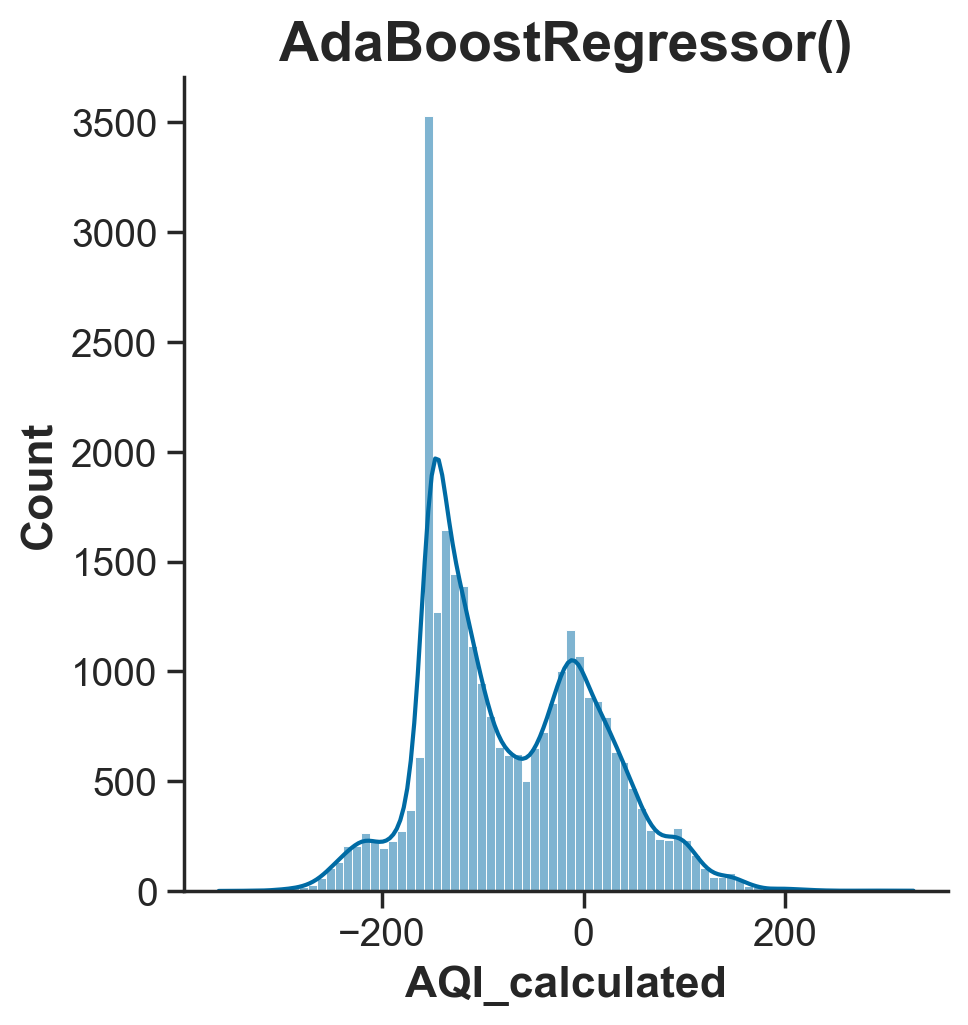

<Figure size 640x480 with 0 Axes>

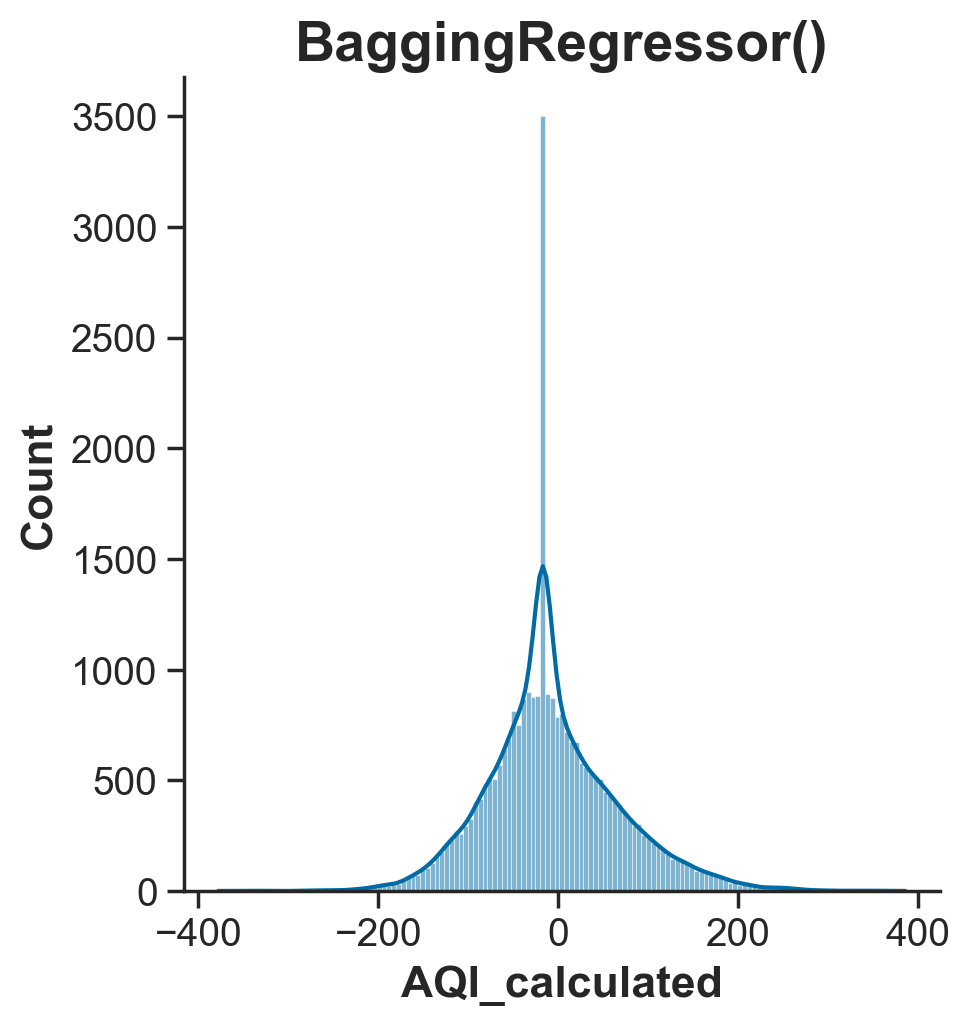

In [109]:
lr = LinearRegression()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()

for i in [lr, d_tree, rf, ab, br]:
    model = i
    print(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_actual = pd.DataFrame({'y_pred': y_pred, "y_test": y_test})
    predicted_actual
    print("Correlation b/w actual and predicted",
          predicted_actual['y_pred'].corr(predicted_actual['y_test']))

    plt.figure()
    sns.displot(y_test - y_pred, kde=True)
    plt.title(model)
    
    print("score(X_test, y_test) ", model.score(X_test, y_test))
    print("Average cv score ", np.mean(s))
    print(f"MAPE is {mean_absolute_percentage_error(y_test , y_pred)}")
    print(f"MAE is {mean_absolute_error(y_test , y_pred)}")
    print(f"MSE is {mean_squared_error(y_test , y_pred)}")
    print("r2_score ", r2_score(y_test, y_pred))
    print("\n\n")

#### kNN

In [110]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

KNeighborsRegressor()

0.6054653440350175

array([349.2, 331. , 341. , ..., 203. , 169.8, 170.8])

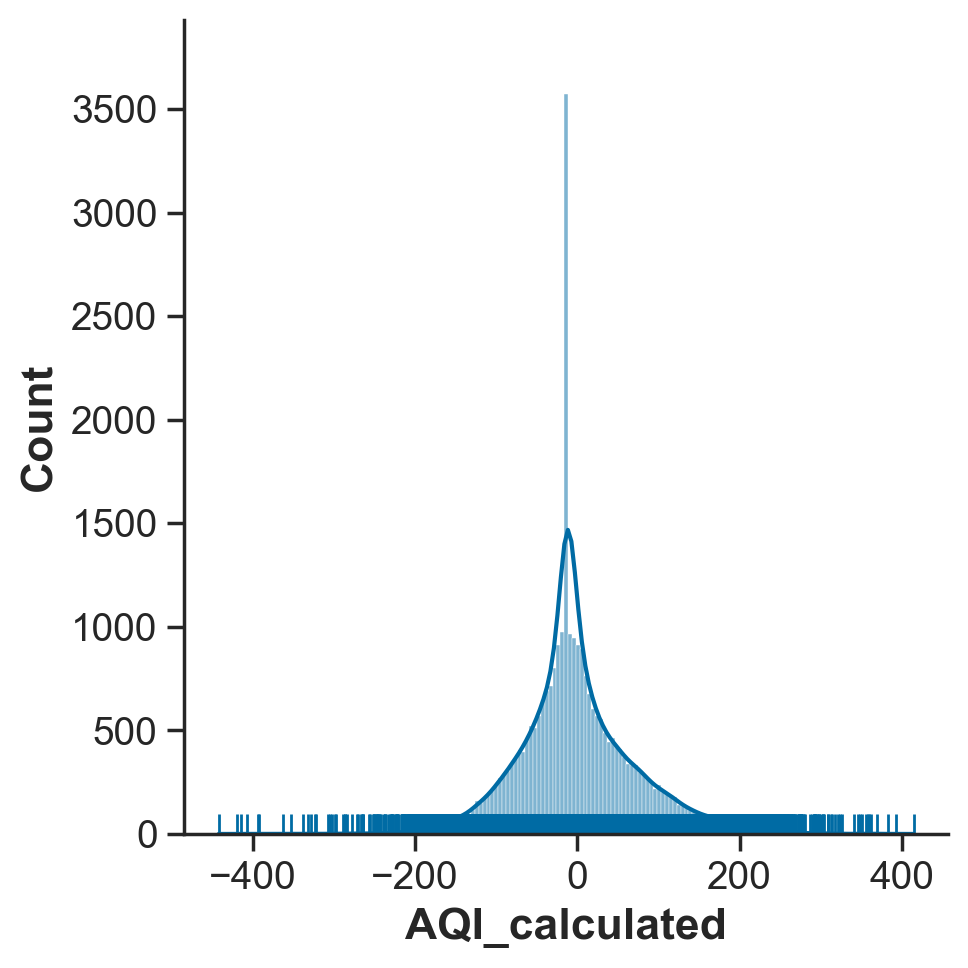

In [111]:
pred_knn = knn.predict(X_test)
pred_knn
sns.displot(y_test - pred_knn, kde=True, rug=True)

In [112]:
print(f"MAPE is {mean_absolute_percentage_error(y_test , pred_knn)}")
print(f"MAE is {mean_absolute_error(y_test , pred_knn)}")
print(f"MSE is {mean_squared_error(y_test , pred_knn)}")

MAPE is 0.3879706905991892
MAE is 53.081433754959484
MSE is 5346.216487503815


### With DateTime index

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df_time_index[['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]] ,
                                                    df_time_index['AQI_calculated'],
                                                    train_size=0.8)

In [153]:
X_train
y_train
X_test
y_test

PM2.5     NO    NO2    NOx        SO2    CO
Datetime                                                         
2021-08-25 22:00:00   44.95   2.97  39.29  20.55   3.130000  0.66
2022-06-01 13:00:00   48.46   7.30  29.14  36.44   8.533333  0.28
2020-02-07 16:00:00   97.90   5.91  17.10  14.66  10.380000  0.70
2023-01-07 13:00:00  101.92  14.87  24.61  31.20   6.850000  0.91
2018-08-10 09:00:00   66.06   8.61  24.87  22.21   5.700000  0.20
...                     ...    ...    ...    ...        ...   ...
2020-07-26 03:00:00   42.02   0.20  15.42   7.25   5.140000  0.22
2021-02-15 05:00:00  107.06  39.97  12.02  51.99   1.030000  1.80
2021-02-17 04:00:00  147.85   8.68  14.12  22.80   4.880000  1.15
2020-11-28 04:00:00  175.73  64.91  20.87  85.78   5.490000  1.64
2020-10-21 14:00:00  165.51   0.71   5.52   9.48   1.640000  0.35

[103252 rows x 6 columns]

Datetime
2021-08-25 22:00:00     78.0
2022-06-01 13:00:00    188.0
2020-02-07 16:00:00    295.0
2023-01-07 13:00:00    326.0
2018-08-10 09:00:00     83.0
                       ...  
2020-07-26 03:00:00     59.0
2021-02-15 05:00:00    202.0
2021-02-17 04:00:00    303.0
2020-11-28 04:00:00    253.0
2020-10-21 14:00:00    358.0
Name: AQI_calculated, Length: 103252, dtype: float64

PM2.5     NO    NO2    NOx        SO2    CO
Datetime                                                         
2021-09-16 21:00:00   16.88   5.40  34.41  22.17   9.150000  0.27
2021-05-31 02:00:00   29.90  11.99  13.94   7.10   2.990000  0.33
2020-12-11 20:00:00   88.43  14.10  29.88  26.92   1.560000  1.64
2022-06-23 07:00:00  159.89   6.44  16.33   9.84   1.130000  0.45
2019-10-18 21:00:00   67.24   4.34  29.56  22.49   4.310000  1.58
...                     ...    ...    ...    ...        ...   ...
2018-05-13 19:00:00  331.34   9.18  24.22  17.90   3.600000  0.00
2021-04-04 17:00:00   13.05   4.77   7.74  12.52   4.006667  0.07
2021-04-20 23:00:00   47.23   2.51  17.27  11.05  12.110000  0.25
2022-01-13 08:00:00  255.42  12.59  23.48   3.08   1.990000  2.28
2021-04-15 14:00:00   77.75   3.04   8.99   6.07  10.370000  0.30

[25814 rows x 6 columns]

Datetime
2021-09-16 21:00:00     45.0
2021-05-31 02:00:00     42.0
2020-12-11 20:00:00    187.0
2022-06-23 07:00:00    149.0
2019-10-18 21:00:00    280.0
                       ...  
2018-05-13 19:00:00    327.0
2021-04-04 17:00:00     85.0
2021-04-20 23:00:00    149.0
2022-01-13 08:00:00    364.0
2021-04-15 14:00:00    137.0
Name: AQI_calculated, Length: 25814, dtype: float64

In [154]:
knn = KNeighborsRegressor()
lr = LinearRegression()
d_tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()
svr = SVR()

KNeighborsRegressor()


KNeighborsRegressor()

y_pred  y_test
Datetime                           
2021-09-16 21:00:00    58.4    45.0
2021-05-31 02:00:00    51.6    42.0
2020-12-11 20:00:00   227.0   187.0
2022-06-23 07:00:00   228.6   149.0
2019-10-18 21:00:00   174.8   280.0
...                     ...     ...
2018-05-13 19:00:00   399.0   327.0
2021-04-04 17:00:00    41.2    85.0
2021-04-20 23:00:00    63.4   149.0
2022-01-13 08:00:00   389.4   364.0
2021-04-15 14:00:00   169.4   137.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.859451113677579
MAPE is 0.30188495411419636
MAE is 41.251452700085224
MSE is 3696.831987293717
r2_score 0.7366051363029449


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'KNeighborsRegressor()')




LinearRegression()


LinearRegression()

y_pred  y_test
Datetime                               
2021-09-16 21:00:00  106.282818    45.0
2021-05-31 02:00:00  108.770443    42.0
2020-12-11 20:00:00  190.283759   187.0
2022-06-23 07:00:00  244.125537   149.0
2019-10-18 21:00:00  165.836128   280.0
...                         ...     ...
2018-05-13 19:00:00  420.694947   327.0
2021-04-04 17:00:00   84.330475    85.0
2021-04-20 23:00:00  123.809569   149.0
2022-01-13 08:00:00  360.418651   364.0
2021-04-15 14:00:00  150.296811   137.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.7686483194232058
MAPE is 0.517462478055571
MAE is 60.505754374491524
MSE is 5749.064864774128
r2_score 0.5903859949147319


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'LinearRegression()')




DecisionTreeRegressor()


DecisionTreeRegressor()

y_pred  y_test
Datetime                           
2021-09-16 21:00:00    44.0    45.0
2021-05-31 02:00:00    47.0    42.0
2020-12-11 20:00:00   232.0   187.0
2022-06-23 07:00:00   316.0   149.0
2019-10-18 21:00:00    72.0   280.0
...                     ...     ...
2018-05-13 19:00:00   364.0   327.0
2021-04-04 17:00:00    46.0    85.0
2021-04-20 23:00:00   152.0   149.0
2022-01-13 08:00:00   355.0   364.0
2021-04-15 14:00:00   236.0   137.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.7781918460969475
MAPE is 0.3618900565623003
MAE is 49.708230206442224
MSE is 6221.802958806742
r2_score 0.5567039703406913


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'DecisionTreeRegressor()')




RandomForestRegressor()


RandomForestRegressor()

y_pred  y_test
Datetime                            
2021-09-16 21:00:00   74.750    45.0
2021-05-31 02:00:00   59.820    42.0
2020-12-11 20:00:00  254.720   187.0
2022-06-23 07:00:00  221.190   149.0
2019-10-18 21:00:00  146.710   280.0
...                      ...     ...
2018-05-13 19:00:00  406.820   327.0
2021-04-04 17:00:00   79.640    85.0
2021-04-20 23:00:00  113.105   149.0
2022-01-13 08:00:00  370.450   364.0
2021-04-15 14:00:00  197.300   137.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.8848693594404484
MAPE is 0.2850973418154283
MAE is 37.738236815086594
MSE is 3049.6537382453125
r2_score 0.7827158135751873


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'RandomForestRegressor()')




AdaBoostRegressor()


AdaBoostRegressor()

y_pred  y_test
Datetime                               
2021-09-16 21:00:00  160.311899    45.0
2021-05-31 02:00:00  123.581159    42.0
2020-12-11 20:00:00  276.160265   187.0
2022-06-23 07:00:00  297.481337   149.0
2019-10-18 21:00:00  276.160265   280.0
...                         ...     ...
2018-05-13 19:00:00  384.813751   327.0
2021-04-04 17:00:00  123.581159    85.0
2021-04-20 23:00:00  160.311899   149.0
2022-01-13 08:00:00  367.932607   364.0
2021-04-15 14:00:00  188.717060   137.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.810522729801058
MAPE is 0.7581435448090468
MAE is 68.22839949624883
MSE is 6517.065456817281
r2_score 0.5356668700111007


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'AdaBoostRegressor()')




BaggingRegressor()


BaggingRegressor()

y_pred  y_test
Datetime                           
2021-09-16 21:00:00    68.4    45.0
2021-05-31 02:00:00    54.1    42.0
2020-12-11 20:00:00   247.7   187.0
2022-06-23 07:00:00   224.5   149.0
2019-10-18 21:00:00   142.4   280.0
...                     ...     ...
2018-05-13 19:00:00   382.7   327.0
2021-04-04 17:00:00    83.9    85.0
2021-04-20 23:00:00   114.0   149.0
2022-01-13 08:00:00   375.4   364.0
2021-04-15 14:00:00   212.9   137.0

[25814 rows x 2 columns]

Correlation b/w actual and predicted 0.871274563828501
MAPE is 0.2971058007055561
MAE is 39.68906451791916
MSE is 3383.0295464146852
r2_score 0.7589631854183019


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'BaggingRegressor()')

<Figure size 640x480 with 0 Axes>

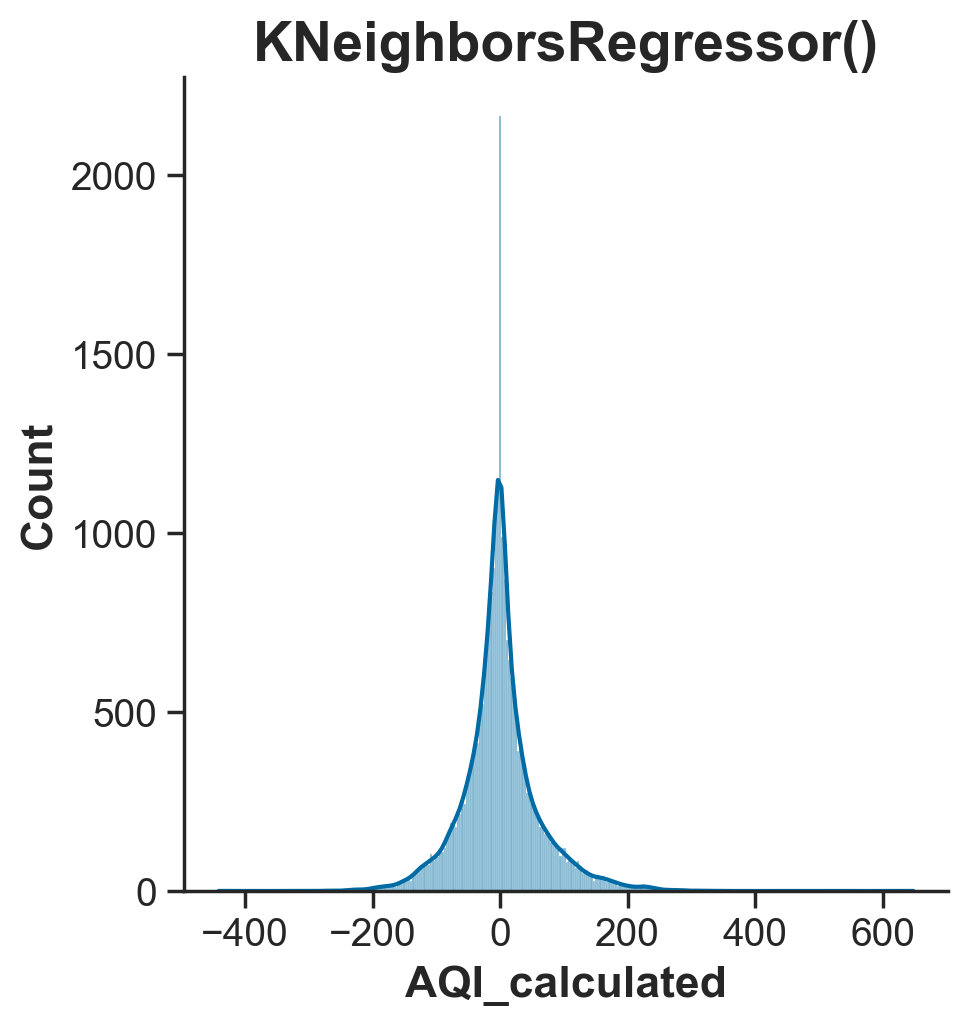

<Figure size 640x480 with 0 Axes>

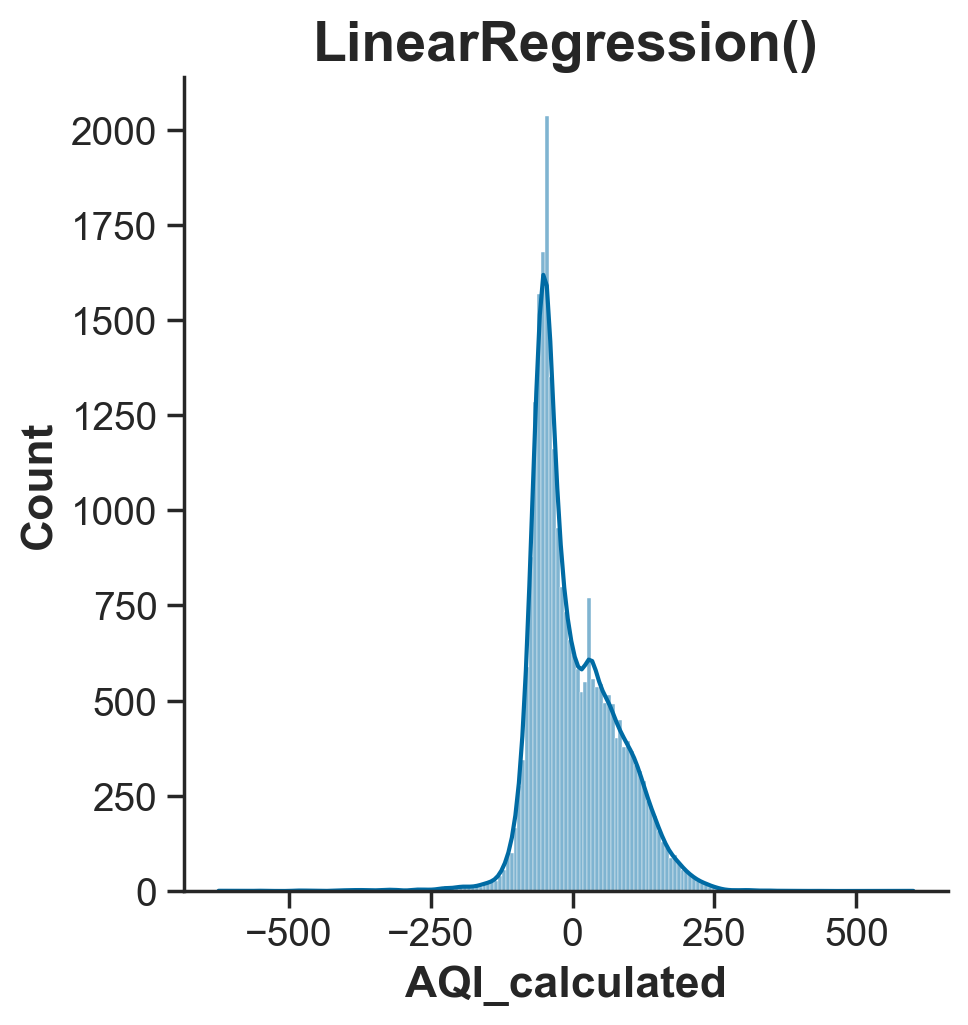

<Figure size 640x480 with 0 Axes>

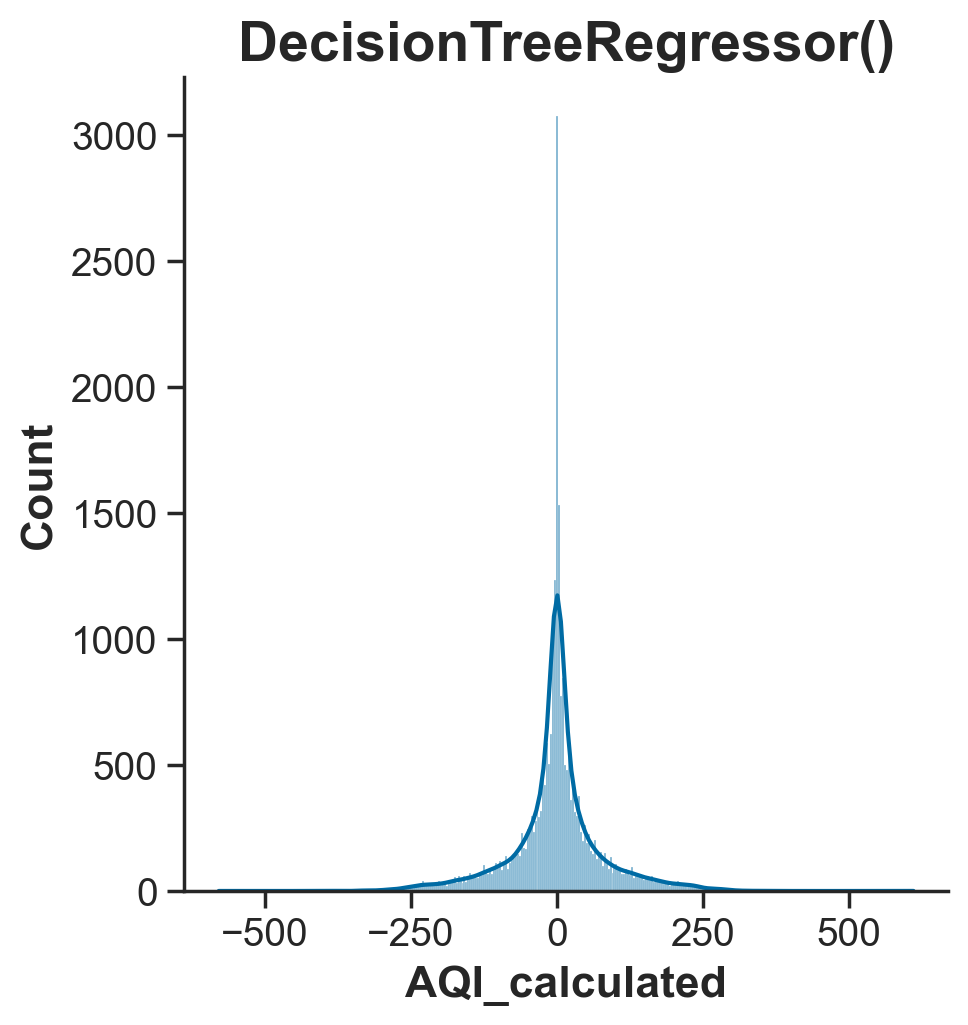

<Figure size 640x480 with 0 Axes>

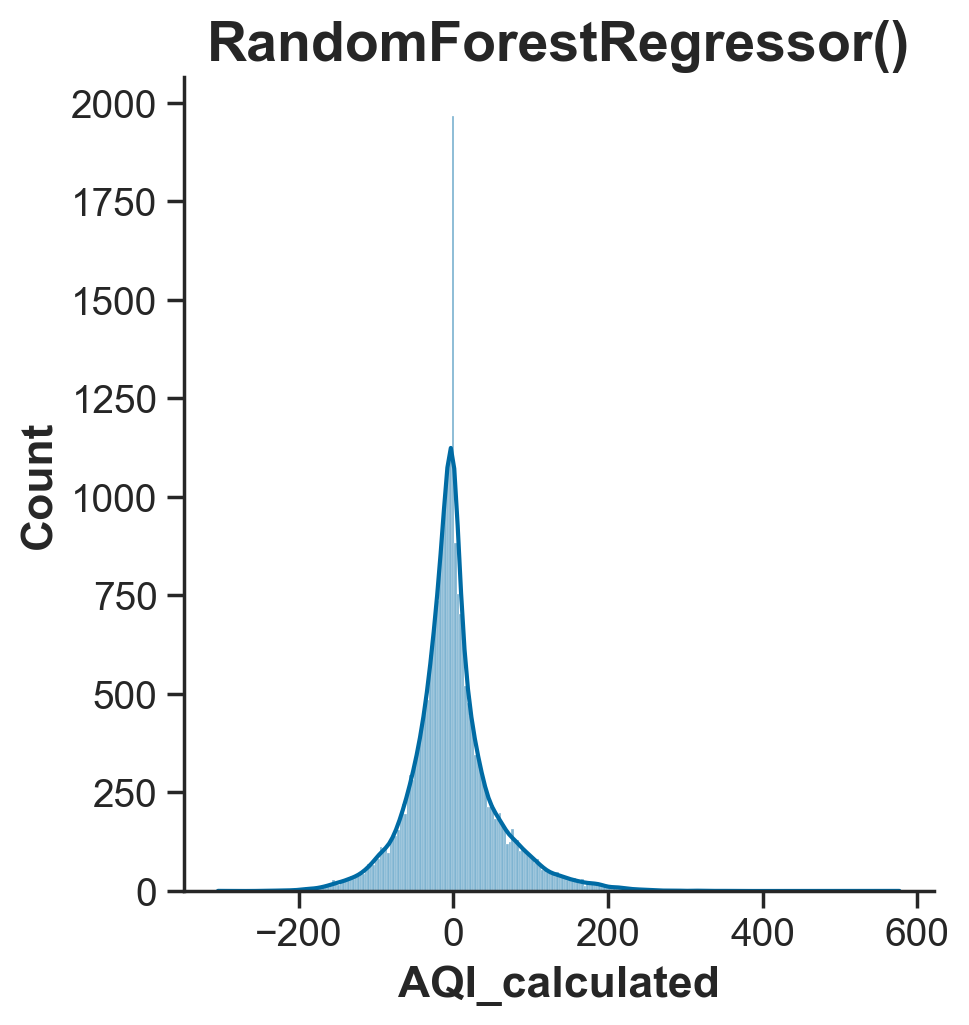

<Figure size 640x480 with 0 Axes>

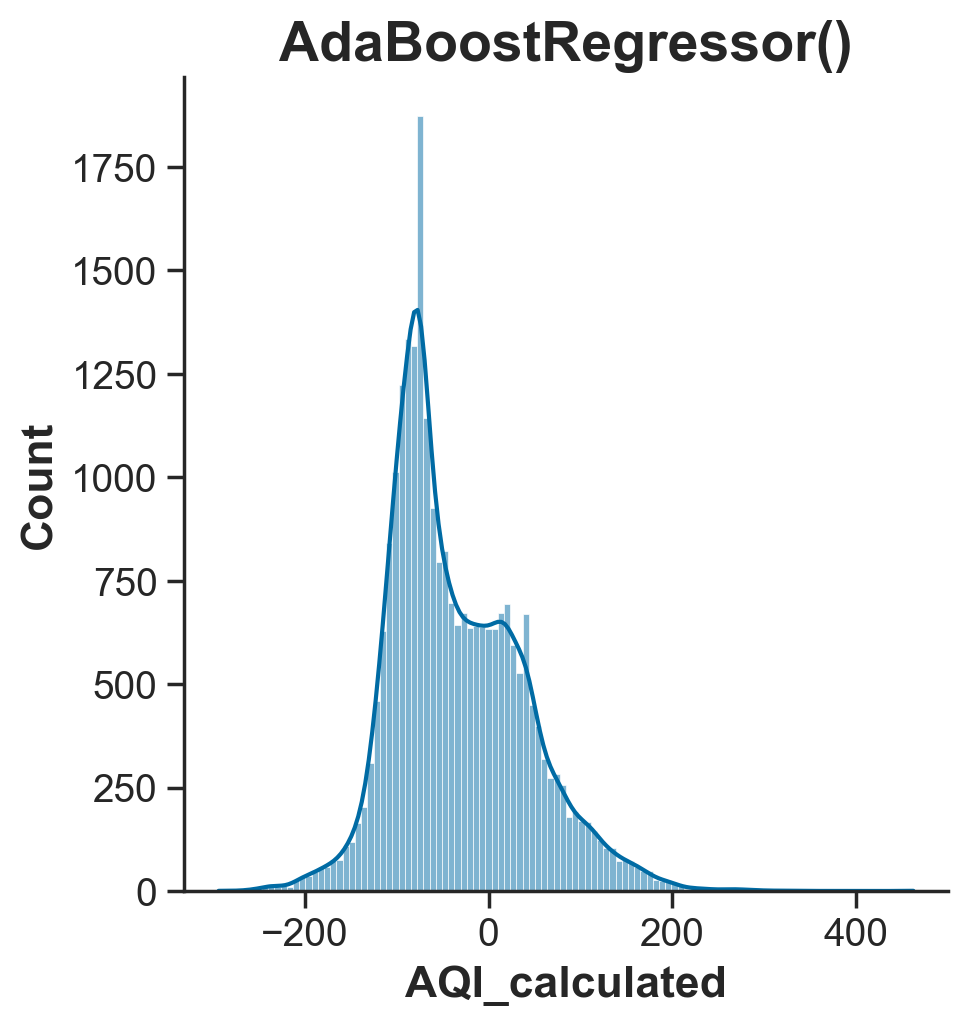

<Figure size 640x480 with 0 Axes>

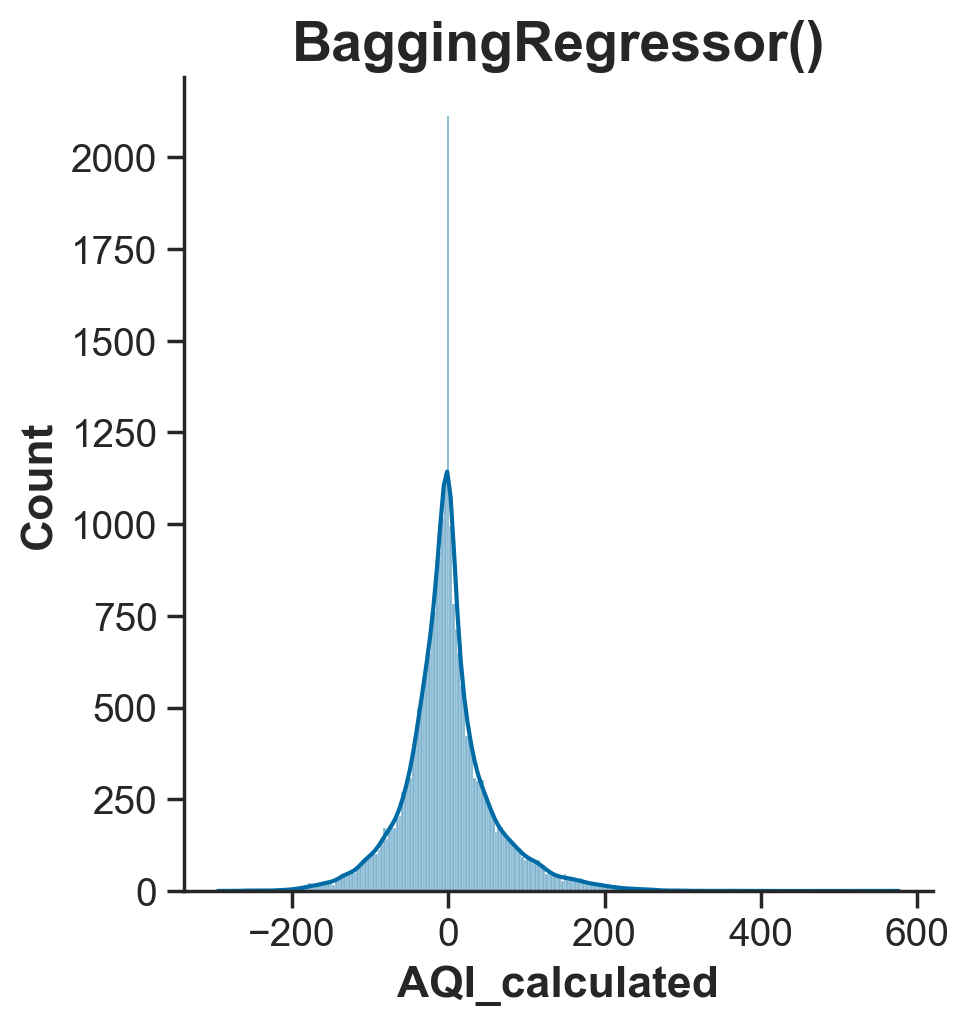

In [155]:
for i in [knn, lr, d_tree, rf, ab, br]:
    model = i
    print(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_actual = pd.DataFrame({'y_pred': y_pred, "y_test": y_test})
    predicted_actual
    print("Correlation b/w actual and predicted", predicted_actual['y_pred'].corr(predicted_actual['y_test']))
    print(f"MAPE is {mean_absolute_percentage_error(y_test , y_pred)}")
    print(f"MAE is {mean_absolute_error(y_test , y_pred)}")
    print(f"MSE is {mean_squared_error(y_test , y_pred)}")
    print(f"r2_score {r2_score(y_test, y_pred)}")
    
    plt.figure()
    sns.displot(y_test - y_pred, kde=True)
    plt.title(model)

    print("\n\n")
    
    result = {
        "MAPE": [round(mean_absolute_percentage_error(y_test , y_pred))],
        "MAE": [round(mean_absolute_error(y_test , y_pred))],
        "MSE": [round(mean_squared_error(y_test , y_pred))],
        "r2_score": [r2_score(y_test, y_pred)]
    }
#     results = pd.concat([results, pd.DataFrame.from_dict(result)])


#### Neural Networks

In [121]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(
    Dense(units=X_train.shape[1],
          kernel_initializer='he_uniform',
          activation='relu',
          input_dim=X_train.shape[1]))

# ReLU works best for he_uniform weight initialization

# Adding the second hidden layer
classifier.add(
    Dense(units=10, kernel_initializer='he_uniform', activation='relu'))


# Adding the third hidden layer
classifier.add(
    Dense(units=10, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(
    Dense(units=1, kernel_initializer='glorot_uniform'))

# sigmoid works best for glorot_uniform
# But at output layer we should add sigmoid because it converts o/p b/w [0,1]

# Compiling the ANN
classifier.compile(optimizer='adam', loss='mape')
# binary_crossentropy because we are dealing with binary classification

# Fitting the ANN to the Training set
# Taking val split as well
model_history = classifier.fit(X_train,
                               y_train,
                               validation_split=0.10,
                               epochs=100)

Epoch 1/100
3317/3317 [==============================] - 2s 539us/step - loss: 31.7911 - val_loss: 30.2640
Epoch 2/100
3317/3317 [==============================] - 2s 502us/step - loss: 30.0220 - val_loss: 29.8582
Epoch 3/100
3317/3317 [==============================] - 2s 501us/step - loss: 29.7336 - val_loss: 29.7695
Epoch 4/100
3317/3317 [==============================] - 2s 503us/step - loss: 29.4098 - val_loss: 29.4602
Epoch 5/100
3317/3317 [==============================] - 2s 499us/step - loss: 29.1622 - val_loss: 29.0432
Epoch 6/100
3317/3317 [==============================] - 2s 503us/step - loss: 28.9853 - val_loss: 28.9646
Epoch 7/100
3317/3317 [==============================] - 2s 501us/step - loss: 28.8287 - val_loss: 28.7410
Epoch 8/100
3317/3317 [==============================] - 2s 498us/step - loss: 28.6619 - val_loss: 28.7249
Epoch 9/100
3317/3317 [==============================] - 2s 500us/step - loss: 28.4932 - val_loss: 28.4072
Epoch 10/100
3317/3317 [=============

Epoch 77/100
3317/3317 [==============================] - 2s 535us/step - loss: 26.9560 - val_loss: 26.9336
Epoch 78/100
3317/3317 [==============================] - 2s 532us/step - loss: 26.9605 - val_loss: 26.9282
Epoch 79/100
3317/3317 [==============================] - 2s 535us/step - loss: 26.9566 - val_loss: 26.9501
Epoch 80/100
3317/3317 [==============================] - 2s 513us/step - loss: 26.9484 - val_loss: 26.8095
Epoch 81/100
3317/3317 [==============================] - 2s 514us/step - loss: 26.9433 - val_loss: 26.8533
Epoch 82/100
3317/3317 [==============================] - 2s 519us/step - loss: 26.9512 - val_loss: 26.9762
Epoch 83/100
3317/3317 [==============================] - 2s 515us/step - loss: 26.9532 - val_loss: 26.8370
Epoch 84/100
3317/3317 [==============================] - 2s 517us/step - loss: 26.9582 - val_loss: 26.9942
Epoch 85/100
3317/3317 [==============================] - 2s 519us/step - loss: 26.9536 - val_loss: 26.8379
Epoch 86/100
3317/3317 [====

922/922 [==============================] - 0s 388us/step


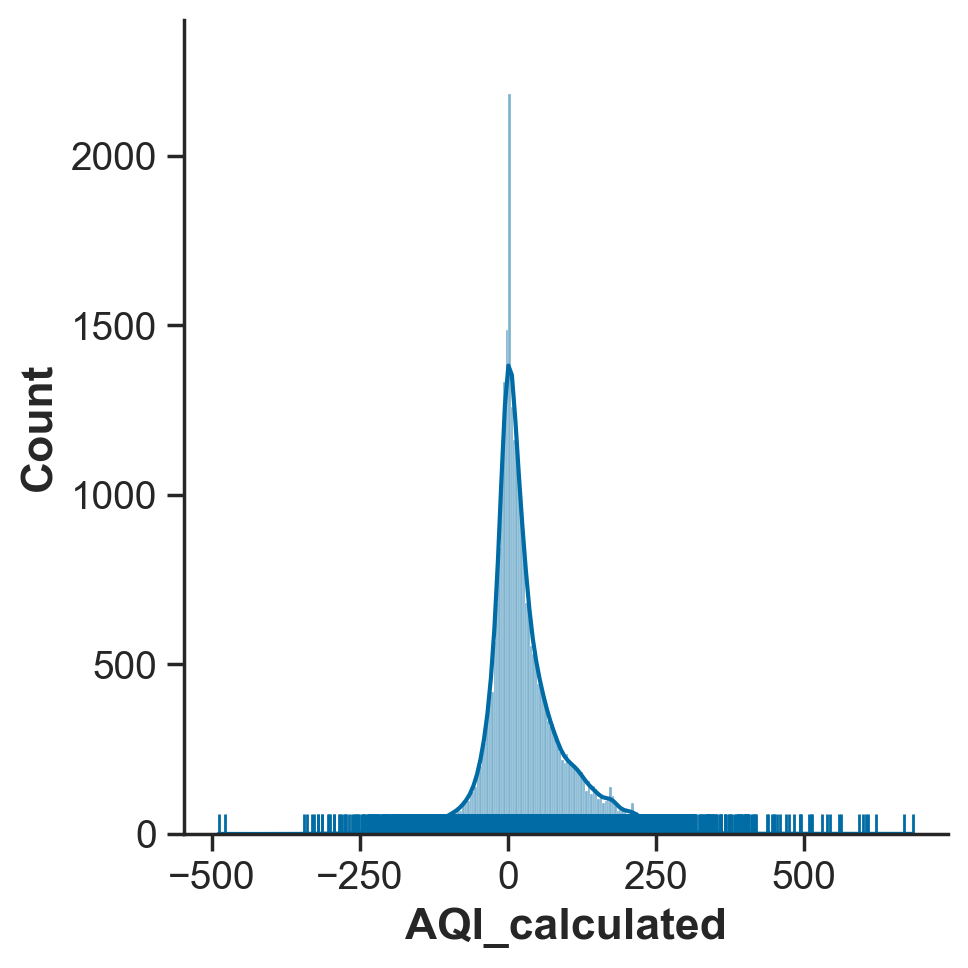

In [128]:
y_pred = classifier.predict(X_test)
sns.displot(y_test - y_pred.reshape(-1), kde=True, rug=True)

In [130]:
r2_score(y_test, y_pred.reshape(-1) )

0.6208203370342374

In [131]:
mean_absolute_percentage_error(y_test, y_pred.reshape(-1) )

0.2737872739816769

### Random forests again

In [132]:
df_time_index.index

DatetimeIndex(['2020-03-04 23:00:00', '2020-03-05 00:00:00',
               '2020-03-05 01:00:00', '2020-03-05 02:00:00',
               '2020-03-05 03:00:00', '2020-03-05 04:00:00',
               '2020-03-05 05:00:00', '2020-03-05 06:00:00',
               '2020-03-05 07:00:00', '2020-03-05 08:00:00',
               ...
               '2023-03-25 22:00:00', '2023-03-25 23:00:00',
               '2023-03-26 00:00:00', '2023-03-26 01:00:00',
               '2023-03-26 02:00:00', '2023-03-26 03:00:00',
               '2023-03-26 04:00:00', '2023-03-26 05:00:00',
               '2023-03-26 06:00:00', '2023-03-26 07:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=147407, freq=None)

In [28]:
from datetime import datetime, timedelta

In [29]:
train_end = datetime(2023, 3, 22, 1,0,0 )
test_end = datetime(2023, 3, 25, 1)

In [156]:
df_sector_51_time_index  = df_time_index[df_time_index['Station_Sector 51'] == 1]

In [157]:
df_sector_51_time_index.columns 

Index(['PM2.5', 'PM2.5_24_avg', 'NO', 'NO2', 'NOx', 'NOx_SubIndex', 'SO2',
       'SO2_SubIndex', 'CO', 'CO_8_avg', 'Day', 'Month', 'Year', 'Week',
       'Hour', 'AQI_calculated', 'PM2.5_24_avg_Sub_Index',
       'CO_8_avg_Sub_Index', 'NO2_Sub_Index', 'Station_NISE',
       'Station_No Station', 'Station_Sector 51', 'Station_Teri Gram',
       'Station_Vikas Sadan', 'AQI_Bucket_Good', 'AQI_Bucket_Moderate',
       'AQI_Bucket_Poor', 'AQI_Bucket_Satisfactory', 'AQI_Bucket_Severe',
       'AQI_Bucket_Very Poor'],
      dtype='object')

In [158]:
X_train_data = df_sector_51_time_index.loc[:train_end, ['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]]
y_train_data = df_sector_51_time_index.loc[:train_end, 'AQI_calculated']

X_test_data = df_sector_51_time_index.loc[train_end + timedelta(hours=1):test_end, ['PM2.5', 'NO', 'NO2', 'NOx', "SO2", "CO"]]
y_test_data = df_sector_51_time_index.loc[train_end + timedelta(hours=1):test_end, 'AQI_calculated']

In [159]:
X_train_data
y_train_data

PM2.5     NO    NO2    NOx    SO2    CO
Datetime                                                     
2020-03-04 23:00:00   61.64   5.99  10.58  12.37  15.71  1.11
2020-03-05 00:00:00   61.64   5.99  10.58  12.37  15.71  1.11
2020-03-05 01:00:00   61.64   5.99  10.58  12.37  15.71  1.11
2020-03-05 02:00:00   61.64   5.99  10.58  12.37  15.71  1.11
2020-03-05 03:00:00   61.64   5.99  10.58  12.37  15.71  1.11
...                     ...    ...    ...    ...    ...   ...
2023-03-21 21:00:00   79.25   8.14  30.24  22.17   1.22  0.55
2023-03-21 22:00:00   85.97  11.20  31.39  25.38   1.34  0.67
2023-03-21 23:00:00   91.37  14.24  31.60  27.93   1.38  0.77
2023-03-22 00:00:00  106.12  21.34  29.19  32.13   1.72  0.87
2023-03-22 01:00:00  105.42  22.33  27.85  32.46   2.21  0.88

[26691 rows x 6 columns]

Datetime
2020-03-04 23:00:00    103.0
2020-03-05 00:00:00    103.0
2020-03-05 01:00:00    103.0
2020-03-05 02:00:00    103.0
2020-03-05 03:00:00    103.0
                       ...  
2023-03-21 21:00:00     53.0
2023-03-21 22:00:00     58.0
2023-03-21 23:00:00     63.0
2023-03-22 00:00:00     70.0
2023-03-22 01:00:00     76.0
Name: AQI_calculated, Length: 26691, dtype: float64

In [160]:
y_test_data.values

array([ 82.,  87.,  93.,  98., 104., 114., 124., 136., 149., 161., 172.,
       178., 182., 186., 189., 193., 198., 201., 203., 202., 200., 198.,
       196., 193., 190., 188., 184., 178., 170., 163., 156., 149., 138.,
       131., 124., 120., 117., 114., 111., 108., 104., 100., 104., 126.,
       152., 171., 181., 190., 198., 204., 213., 223., 235., 249., 266.,
       279., 286., 284., 282., 282., 283., 281., 281., 282., 284., 287.,
       276., 250., 219., 197., 180., 163.])

In [161]:
clf_rf_time_index = RandomForestRegressor()
clf_rf_time_index

RandomForestRegressor()

In [162]:
clf_rf_time_index.fit(X_train_data, y_train_data)

RandomForestRegressor()

In [163]:
clf_rf_time_index_pred = clf_rf_time_index.predict(X_test_data)

In [164]:
clf_rf_time_index_pred

array([175.96      , 207.75      , 208.96      , 232.19      ,
       247.08      , 229.79      , 243.66      , 247.35      ,
       247.36      , 246.07      , 179.17      , 163.79      ,
       294.94      , 252.63      , 221.9       , 266.15      ,
       256.18      , 188.85      , 237.18      , 153.56      ,
       145.41      , 162.64      , 175.86      , 161.96      ,
       175.84      , 161.87      , 115.04      , 155.74      ,
       138.47      , 137.4       , 217.65      , 238.45      ,
       189.84      , 203.28      , 193.64      , 231.77      ,
       181.06      , 213.49      , 108.95      , 110.15666667,
       110.15666667, 110.15666667, 278.800625  , 279.28      ,
       293.34      , 303.39      , 302.44      , 290.19      ,
       298.85      , 278.95      , 262.46      , 260.81      ,
       296.21      , 298.02      , 306.455     , 249.86      ,
       247.79      , 263.83542424, 218.05      , 206.2       ,
       206.2       , 114.51      , 153.6       , 244.67

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Random forest model')

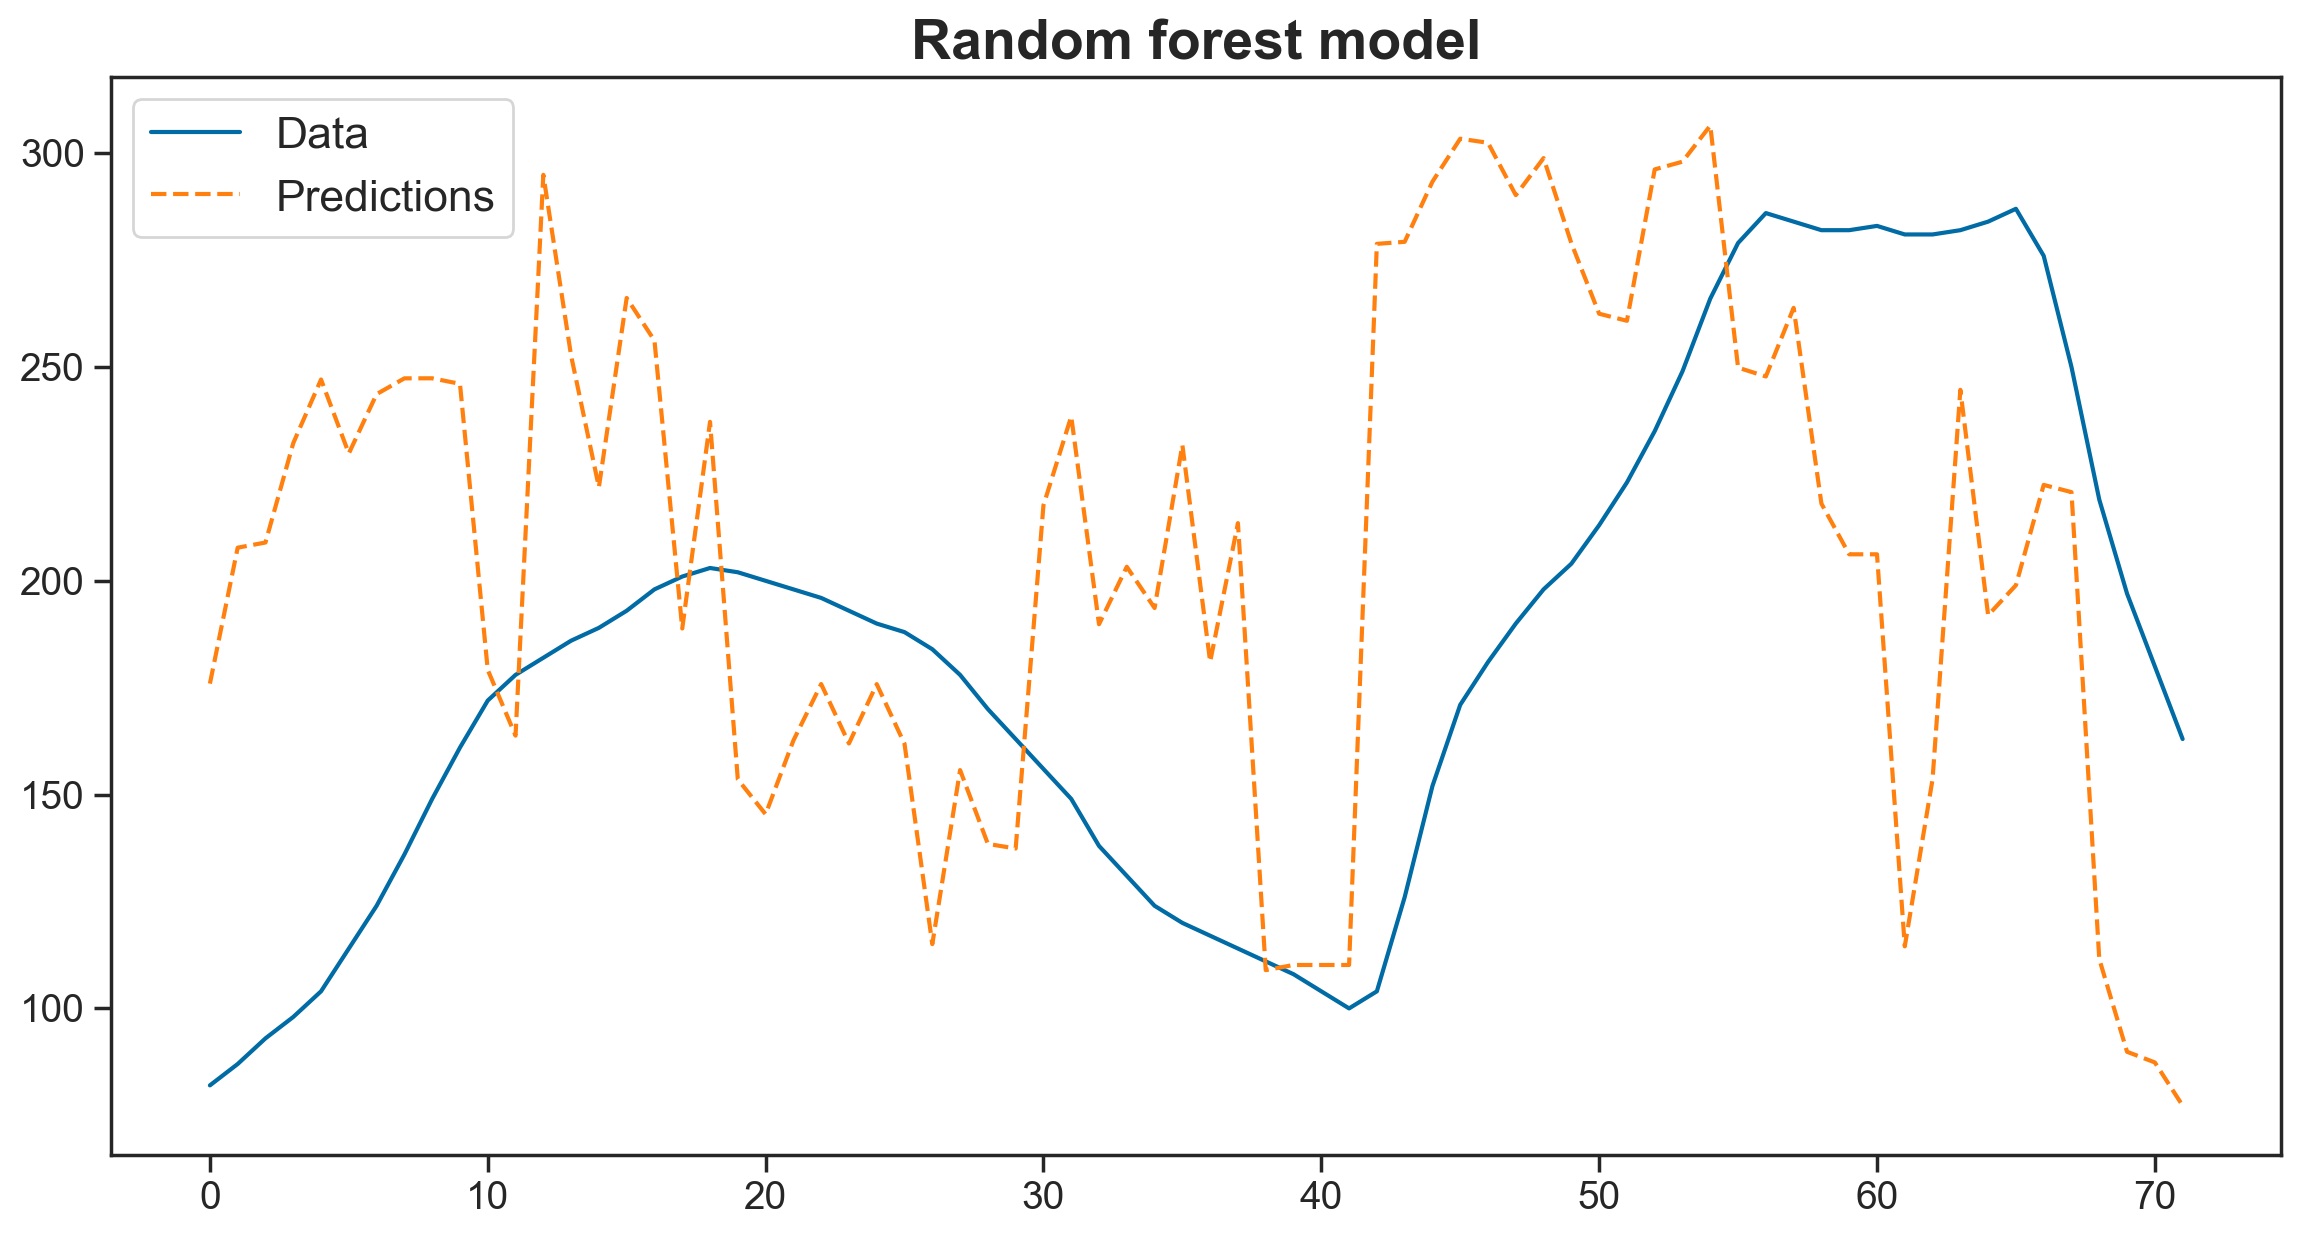

In [165]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_data.values) 
plt.plot(clf_rf_time_index_pred, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("Random forest model")

In [166]:
print(f"MAPE is {round(mean_absolute_percentage_error(y_test_data.values, clf_rf_time_index_pred) * 100, 2)}")
print(f"MAE is {round(mean_absolute_error(y_test_data.values , clf_rf_time_index_pred), 2)}")
print(f"MSE is {round(mean_squared_error(y_test_data.values, clf_rf_time_index_pred), 2)}")

MAPE is 45.41
MAE is 70.79
MSE is 6866.37


# End of part 1, to be continued...